# Importing packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file using pandas
df = pd.read_csv('pml-training.csv')

# Analyzing the data

In [3]:
df.head(40)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
5,6,carlitos,1323084232,304277,05/12/2011 11:23,no,12,1.45,8.06,-94.4,...,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0,A
6,7,carlitos,1323084232,368296,05/12/2011 11:23,no,12,1.42,8.09,-94.4,...,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0,A
7,8,carlitos,1323084232,440390,05/12/2011 11:23,no,12,1.42,8.13,-94.4,...,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0,A
8,9,carlitos,1323084232,484323,05/12/2011 11:23,no,12,1.43,8.16,-94.4,...,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0,A
9,10,carlitos,1323084232,484434,05/12/2011 11:23,no,12,1.45,8.17,-94.4,...,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0,A


In [4]:
#shape of the data
df.shape

(19622, 160)

In [5]:
#for viewing the maximum columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#Checking the columns
df.columns.tolist()

['Unnamed: 0',
 'user_name',
 'raw_timestamp_part_1',
 'raw_timestamp_part_2',
 'cvtd_timestamp',
 'new_window',
 'num_window',
 'roll_belt',
 'pitch_belt',
 'yaw_belt',
 'total_accel_belt',
 'kurtosis_roll_belt',
 'kurtosis_picth_belt',
 'kurtosis_yaw_belt',
 'skewness_roll_belt',
 'skewness_roll_belt.1',
 'skewness_yaw_belt',
 'max_roll_belt',
 'max_picth_belt',
 'max_yaw_belt',
 'min_roll_belt',
 'min_pitch_belt',
 'min_yaw_belt',
 'amplitude_roll_belt',
 'amplitude_pitch_belt',
 'amplitude_yaw_belt',
 'var_total_accel_belt',
 'avg_roll_belt',
 'stddev_roll_belt',
 'var_roll_belt',
 'avg_pitch_belt',
 'stddev_pitch_belt',
 'var_pitch_belt',
 'avg_yaw_belt',
 'stddev_yaw_belt',
 'var_yaw_belt',
 'gyros_belt_x',
 'gyros_belt_y',
 'gyros_belt_z',
 'accel_belt_x',
 'accel_belt_y',
 'accel_belt_z',
 'magnet_belt_x',
 'magnet_belt_y',
 'magnet_belt_z',
 'roll_arm',
 'pitch_arm',
 'yaw_arm',
 'total_accel_arm',
 'var_accel_arm',
 'avg_roll_arm',
 'stddev_roll_arm',
 'var_roll_arm',
 'avg_p

In [7]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 160 entries, Unnamed: 0 to classe
dtypes: float64(94), int64(29), object(37)
memory usage: 24.0+ MB


In [8]:
#generating the first five rows of the data
df.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,var_accel_arm,avg_roll_arm,stddev_roll_arm,var_roll_arm,avg_pitch_arm,stddev_pitch_arm,var_pitch_arm,avg_yaw_arm,stddev_yaw_arm,var_yaw_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,kurtosis_roll_arm,kurtosis_picth_arm,kurtosis_yaw_arm,skewness_roll_arm,skewness_pitch_arm,skewness_yaw_arm,max_roll_arm,max_picth_arm,max_yaw_arm,min_roll_arm,min_pitch_arm,min_yaw_arm,amplitude_roll_arm,amplitude_pitch_arm,amplitude_yaw_arm,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,kurtosis_roll_dumbbell,kurtosis_picth_dumbbell,kurtosis_yaw_dumbbell,skewness_roll_dumbbell,skewness_pitch_dumbbell,skewness_yaw_dumbbell,max_roll_dumbbell,max_picth_dumbbell,max_yaw_dumbbell,min_roll_dumbbell,min_pitch_dumbbell,min_yaw_dumbbell,amplitude_roll_dumbbell,amplitude_pitch_dumbbell,amplitude_yaw_dumbbell,total_accel_dumbbell,var_accel_dumbbell,avg_roll_dumbbell,stddev_roll_dumbbell,var_roll_dumbbell,avg_pitch_dumbbell,stddev_pitch_dumbbell,var_pitch_dumbbell,avg_yaw_dumbbell,stddev_yaw_dumbbell,var_yaw_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,-0.02,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,-0.02,-288,109,-123,-368,337,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.052175,-70.494004,-84.873939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.02,0.00,-234,47,-271,-559,293,-65.0,28.4,-63.9,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.02,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,-0.02,-0.02,-290,110,-125,-369,337,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.130740,-70.637505,-84.710647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.02,0.00,-233,47,-269,-555,296,-64.0,28.3,-63.9,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN

In [9]:
# to display no. of samples on each class
#sitting down(A), standing-up(B), standing(C), walking(D), and sitting(E).
df['classe'].value_counts()

A    5580
B    3797
E    3607
C    3422
D    3216
Name: classe, dtype: int64

In [10]:
#Finding missing value if any
df.isna().sum()

Unnamed: 0                      0
user_name                       0
raw_timestamp_part_1            0
raw_timestamp_part_2            0
cvtd_timestamp                  0
new_window                      0
num_window                      0
roll_belt                       0
pitch_belt                      0
yaw_belt                        0
total_accel_belt                0
kurtosis_roll_belt          19216
kurtosis_picth_belt         19216
kurtosis_yaw_belt           19216
skewness_roll_belt          19216
skewness_roll_belt.1        19216
skewness_yaw_belt           19216
max_roll_belt               19216
max_picth_belt              19216
max_yaw_belt                19216
min_roll_belt               19216
min_pitch_belt              19216
min_yaw_belt                19216
amplitude_roll_belt         19216
amplitude_pitch_belt        19216
amplitude_yaw_belt          19216
var_total_accel_belt        19216
avg_roll_belt               19216
stddev_roll_belt            19216
var_roll_belt 

In [11]:
#Total missing value
df.isna().sum().sum()

1921600

In [12]:
df.user_name.value_counts()

adelmo      3892
charles     3536
jeremy      3402
carlitos    3112
eurico      3070
pedro       2610
Name: user_name, dtype: int64

In [13]:
#Statistical summary of data
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,min_roll_belt,min_pitch_belt,amplitude_roll_belt,amplitude_pitch_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,var_accel_arm,avg_roll_arm,stddev_roll_arm,var_roll_arm,avg_pitch_arm,stddev_pitch_arm,var_pitch_arm,avg_yaw_arm,stddev_yaw_arm,var_yaw_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,max_roll_arm,max_picth_arm,max_yaw_arm,min_roll_arm,min_pitch_arm,min_yaw_arm,amplitude_roll_arm,amplitude_pitch_arm,amplitude_yaw_arm,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,max_roll_dumbbell,max_picth_dumbbell,min_roll_dumbbell,min_pitch_dumbbell,amplitude_roll_dumbbell,amplitude_pitch_dumbbell,total_accel_dumbbell,var_accel_dumbbell,avg_roll_dumbbell,stddev_roll_dumbbell,var_roll_dumbbell,avg_pitch_dumbbell,stddev_pitch_dumbbell,var_pitch_dumbbell,avg_yaw_dumbbell,stddev_yaw_dumbbell,var_yaw_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,max_roll_forearm,max_picth_forearm,min_roll_forearm,min_pitch_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,1.962200e+04,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.00000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.00000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,19622.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,19622.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,1.322827e+09,500656.144277,430.640047,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,-10.436453,10.756158,3.768941,2.167488,0.926191,68.055576,1.337113,7.699186,0.519510,0.602692,0.765692,-8.830781,1.341249,107.486512,-0.005592,0.039588,-0.130538,-5.594690,30.154877,-72.593619,55.600856,593.676995,-345.480838,17.830183,-4.611925,-0.618751,25.508562,53.235180,12.677667,11.200904,417.263863,-4.901034,10.383383,195.864420,2.358615,22.270207,1055.933304,0.042772,-0.257081,0.269480,-60.240190,32.597085,-71.245082,191.722964,156.611304,306.49098,11.2

# Exploratory Data Analysis

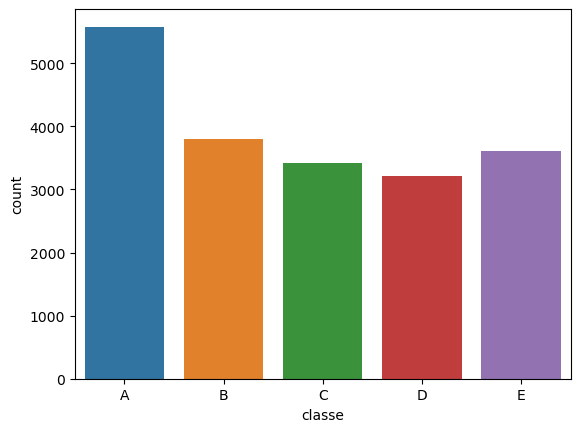

In [14]:
#countplot of target column
sns.countplot(x='classe', data=df)
plt.show()

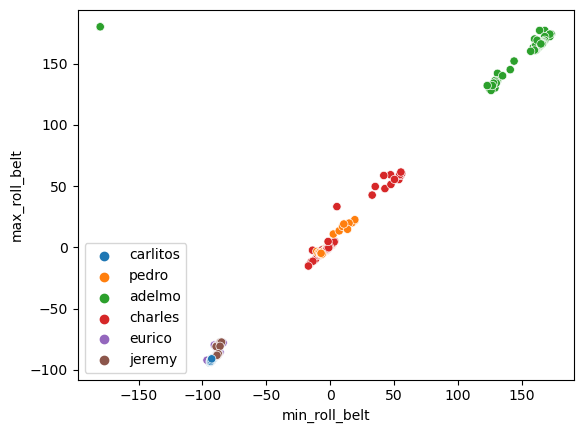

In [15]:
#Comparing max and min of roll_belt between all the users
sns.scatterplot(x='min_roll_belt', y='max_roll_belt',hue='user_name', data=df, )
plt.legend()
plt.show()

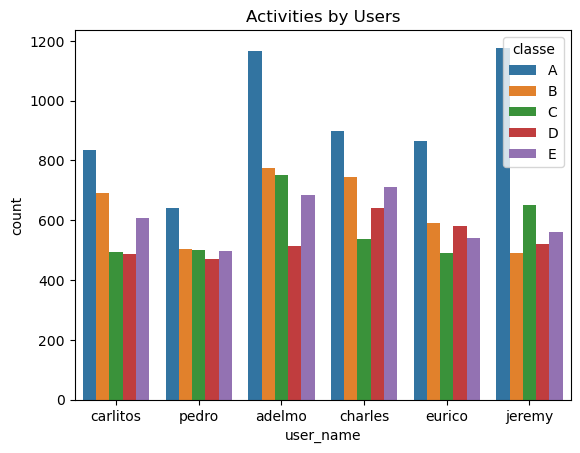

In [16]:
#individual users are contributing to each activity.
sns.countplot(x = 'user_name',  hue = 'classe', data = df)
plt.title('Activities by Users')
plt.show()

In [17]:
#160 features are expensive for model training hence we will be trying to 
#reduce them my removing some of the columns with None, NaN, or NaT values:

df.isna().values.any()

True

In [18]:
#Using dropna() we are removing the null values:
df.dropna(axis=1,inplace=True)

In [19]:
df.shape

(19622, 60)

In [20]:
#dropping the columns that are time dependent 
df.drop(['Unnamed: 0','raw_timestamp_part_1', 'raw_timestamp_part_2','cvtd_timestamp', 'new_window','num_window'],axis=1,inplace=True)

In [21]:
df.shape

(19622, 54)

In [22]:
#After dropping columns with NA or null values and columns that are time dependent we have 54 columns 
#i.e, 106 columns are removed from 160 columns.

In [23]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_name             19622 non-null  object 
 1   roll_belt             19622 non-null  float64
 2   pitch_belt            19622 non-null  float64
 3   yaw_belt              19622 non-null  float64
 4   total_accel_belt      19622 non-null  int64  
 5   gyros_belt_x          19622 non-null  float64
 6   gyros_belt_y          19622 non-null  float64
 7   gyros_belt_z          19622 non-null  float64
 8   accel_belt_x          19622 non-null  int64  
 9   accel_belt_y          19622 non-null  int64  
 10  accel_belt_z          19622 non-null  int64  
 11  magnet_belt_x         19622 non-null  int64  
 12  magnet_belt_y         19622 non-null  int64  
 13  magnet_belt_z         19622 non-null  int64  
 14  roll_arm              19622 non-null  float64
 15  pitch_arm          

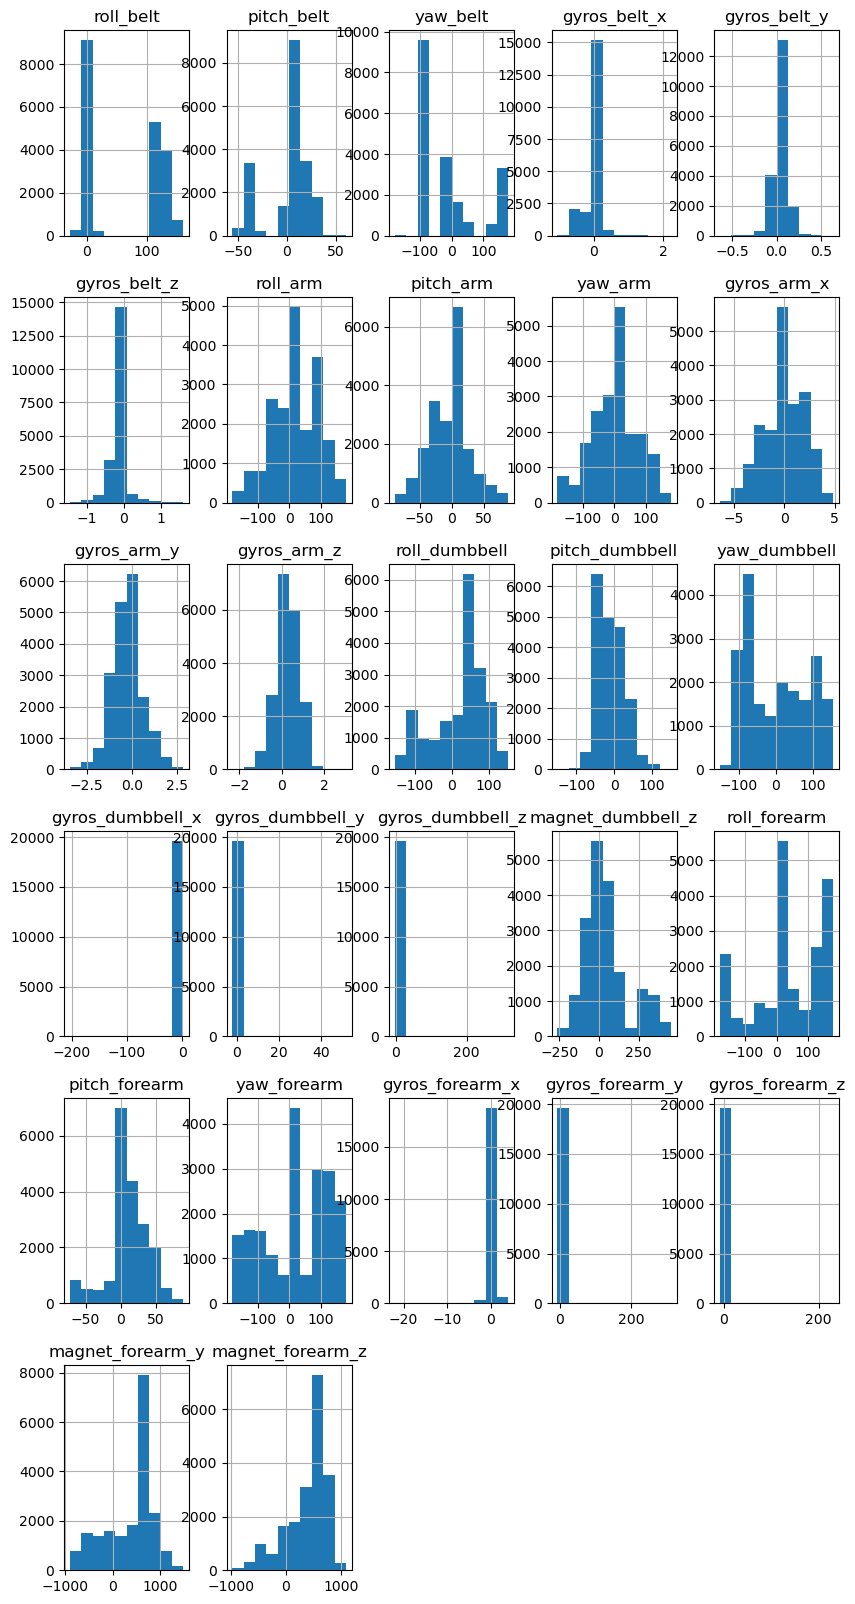

In [24]:
freqgraph = df.select_dtypes(include = ['float'])
freqgraph.hist(figsize = (10,20))
plt.show()

In [25]:
#It shows that the below columns does not have much distribution of values
#gyros_dumbbell_x
#gyros_dumbbell_y
#gyros_dumbbell_z
#gyros_forearm_x
#gyros_forearm_y
#gyros_forearm_z

<AxesSubplot:xlabel='classe', ylabel='total_accel_belt'>

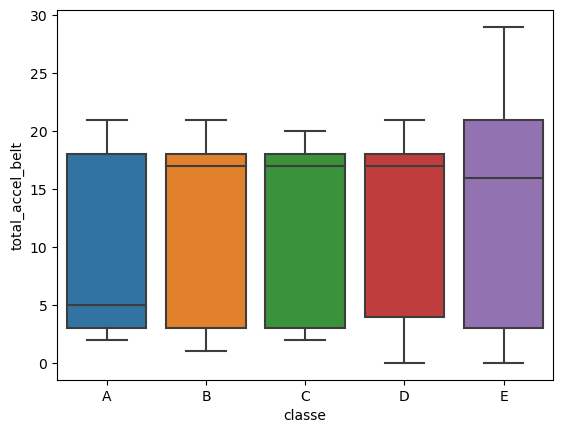

In [26]:
#Plotting to find out in which manner the workouts were mostly done
# A:sitting-down, B:standing-up, C: standing , D:walking, and E:sitting 


sns.boxplot(x='classe', y='total_accel_belt', data=df, showfliers=False)

<AxesSubplot:xlabel='classe', ylabel='total_accel_dumbbell'>

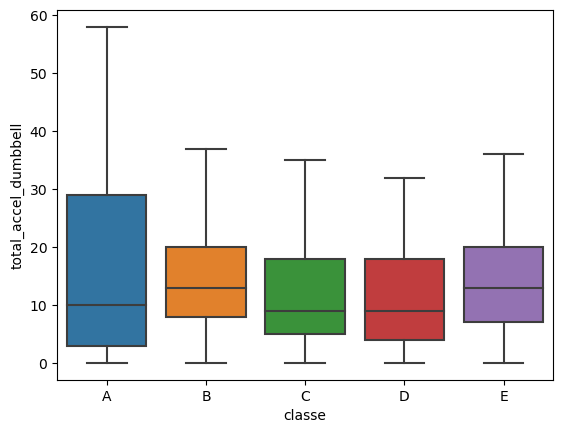

In [27]:
sns.boxplot(x='classe', y='total_accel_dumbbell', data=df, showfliers=False)

<AxesSubplot:xlabel='classe', ylabel='total_accel_forearm'>

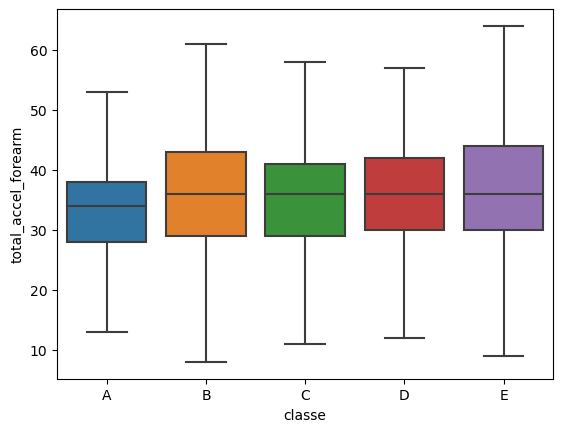

In [28]:
sns.boxplot(x='classe', y='total_accel_forearm', data=df, showfliers=False)

<AxesSubplot:xlabel='classe', ylabel='total_accel_arm'>

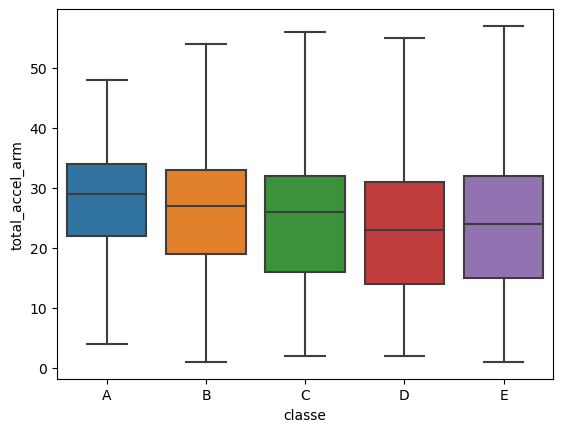

In [29]:
sns.boxplot(x='classe', y='total_accel_arm', data=df, showfliers=False)

In [30]:
#Converting categorical to numerical columns
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()
df['user_name']=le.fit_transform(df['user_name'])
df['classe']=le.fit_transform(df['classe'])

<AxesSubplot:>

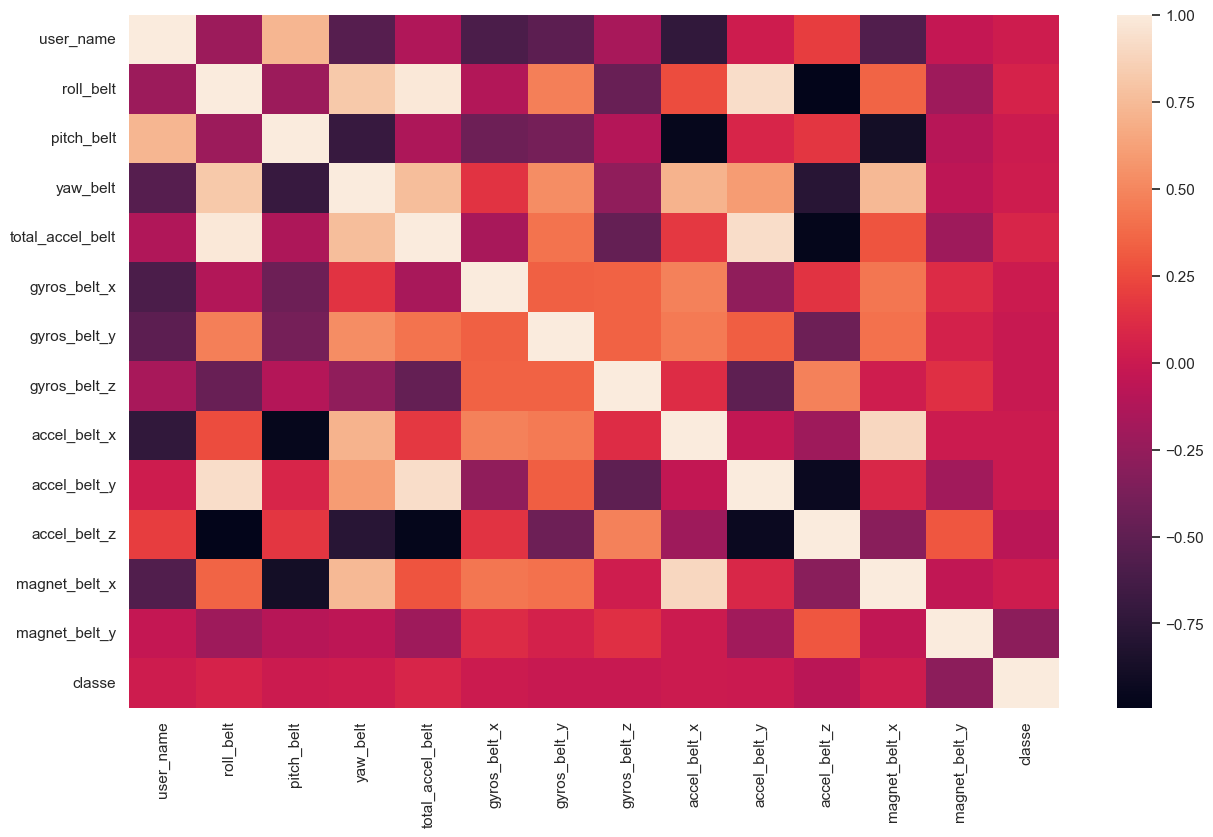

In [32]:
#Correlation with belt,dumbell,arm and forearm

sns.set(rc={'figure.figsize':(15,9)})
lst = list(df.columns[0:13])
lst.append('classe')
belt_corr = df[lst].corr()
sns.heatmap(belt_corr)

<AxesSubplot:>

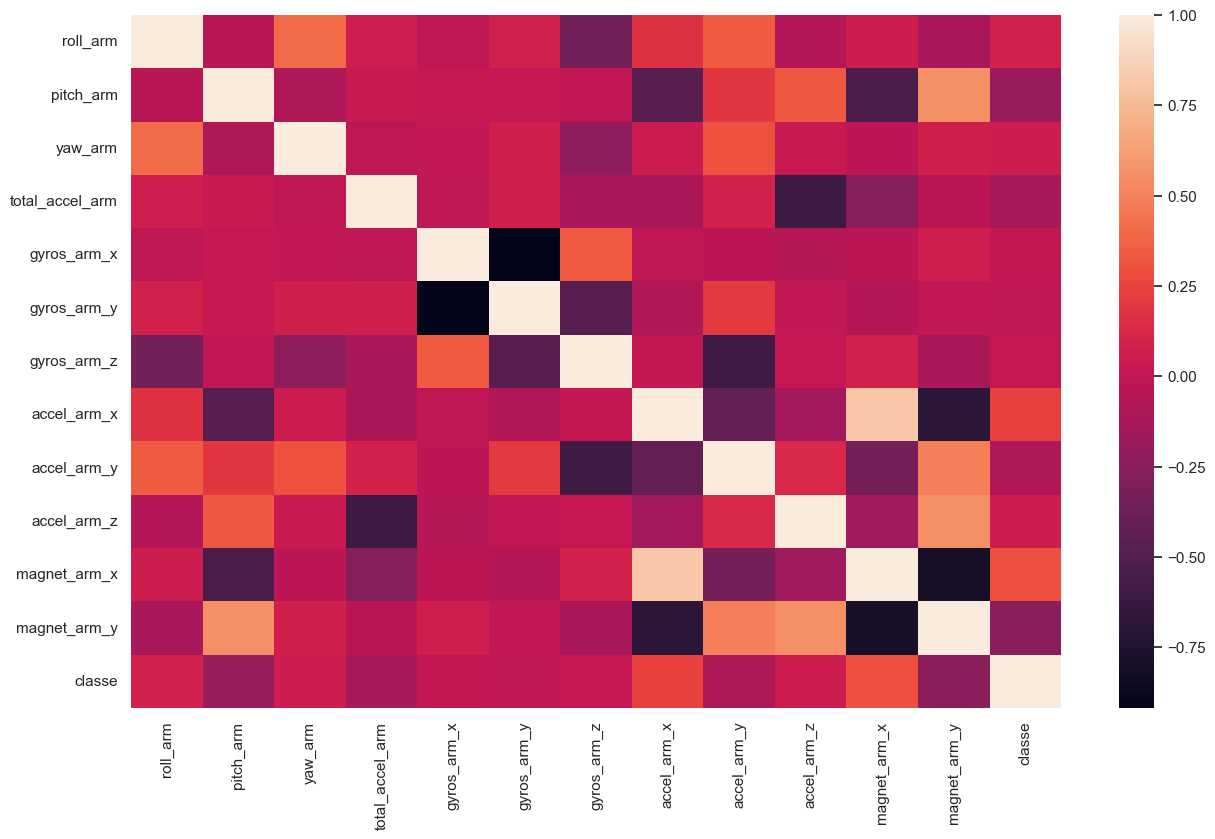

In [33]:
sns.set(rc={'figure.figsize':(15,9)})
lst = list(df.columns[14:26])
lst.append('classe')
arm_corr = df[lst].corr()
sns.heatmap(arm_corr)

<AxesSubplot:>

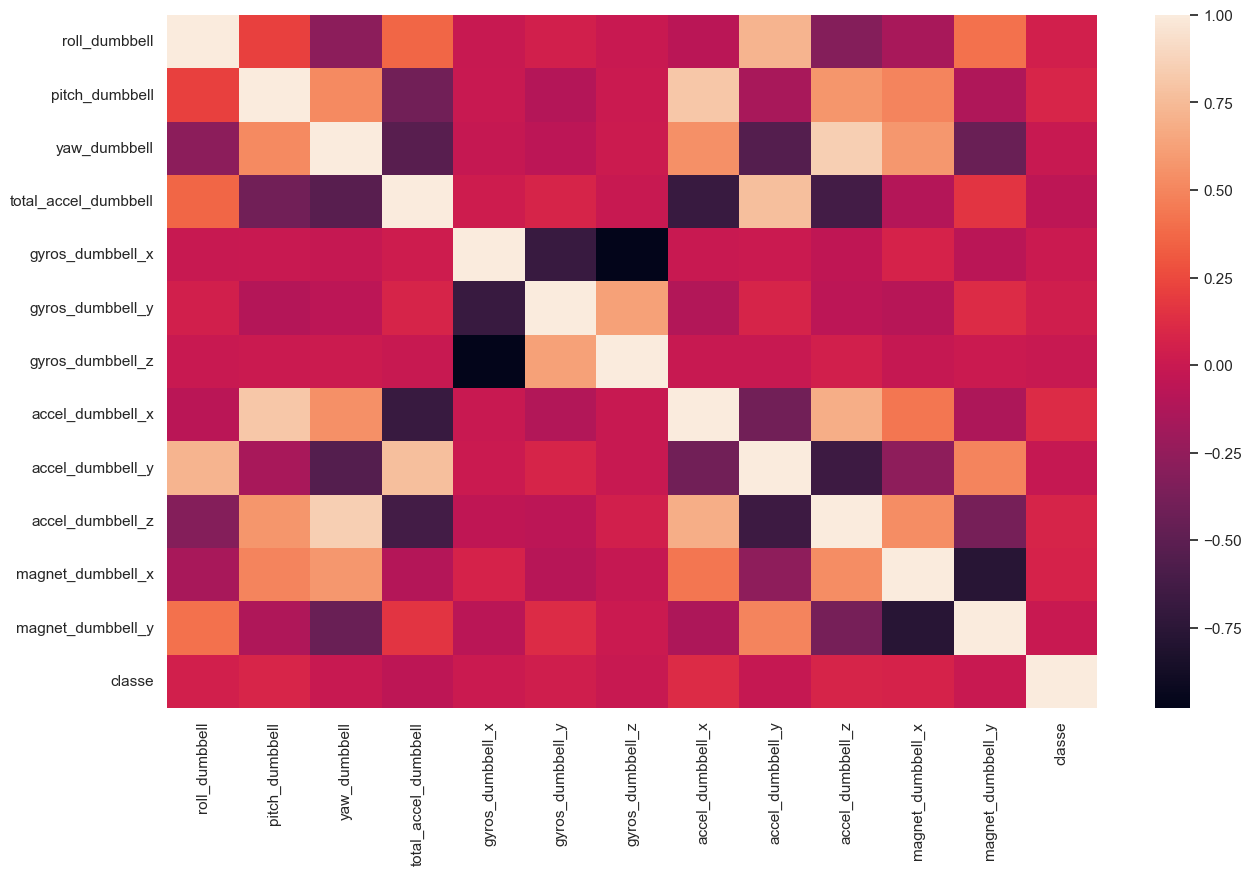

In [34]:
sns.set(rc={'figure.figsize':(15,9)})
lst = list(df.columns[27:39])
lst.append('classe')
dumbell_corr = df[lst].corr()
sns.heatmap(dumbell_corr)

<AxesSubplot:>

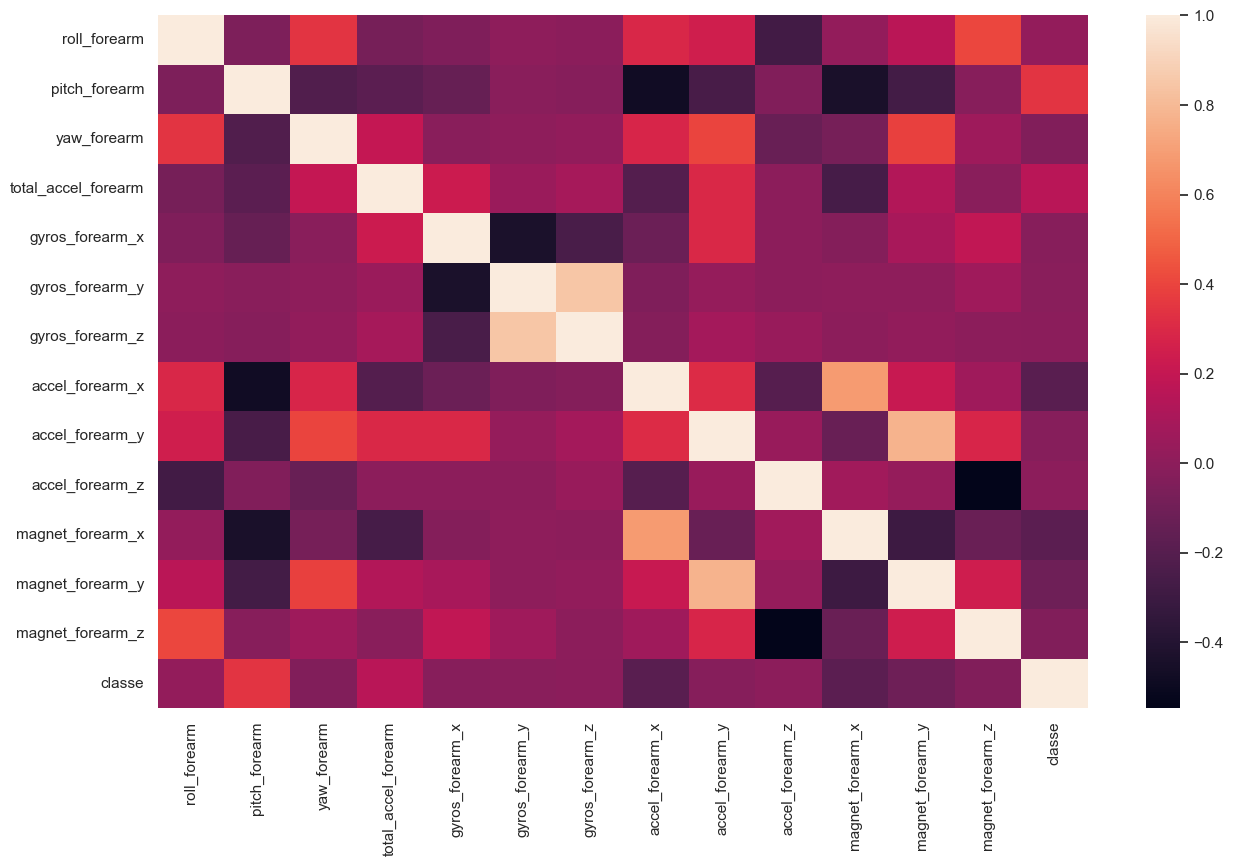

In [35]:
sns.set(rc={'figure.figsize':(15,9)})
lst = list(df.columns[40:53])
lst.append('classe')
forearm_corr = df[lst].corr()
sns.heatmap(forearm_corr)
     

In [36]:
corr = [belt_corr, arm_corr, dumbell_corr, forearm_corr]

In [37]:
for i in corr:
    print(i[(i['classe'] < -0.05) ]['classe'])
    print()
    print(i[(i['classe'] > 0.05) ]['classe'])

accel_belt_z    -0.079387
magnet_belt_y   -0.290349
Name: classe, dtype: float64

roll_belt           0.062151
total_accel_belt    0.077156
classe              1.000000
Name: classe, dtype: float64
pitch_arm         -0.177685
total_accel_arm   -0.125825
accel_arm_y       -0.087054
magnet_arm_y      -0.256670
Name: classe, dtype: float64

roll_arm        0.087696
accel_arm_x     0.242593
magnet_arm_x    0.295964
classe          1.000000
Name: classe, dtype: float64
total_accel_dumbbell   -0.051963
Name: classe, dtype: float64

pitch_dumbbell       0.086235
accel_dumbbell_x     0.118646
accel_dumbbell_z     0.072739
magnet_dumbbell_x    0.066636
classe               1.000000
Name: classe, dtype: float64
accel_forearm_x    -0.188685
magnet_forearm_x   -0.182133
magnet_forearm_y   -0.107838
Name: classe, dtype: float64

pitch_forearm          0.343826
total_accel_forearm    0.154538
classe                 1.000000
Name: classe, dtype: float64


<AxesSubplot:xlabel='total_accel_belt', ylabel='Density'>

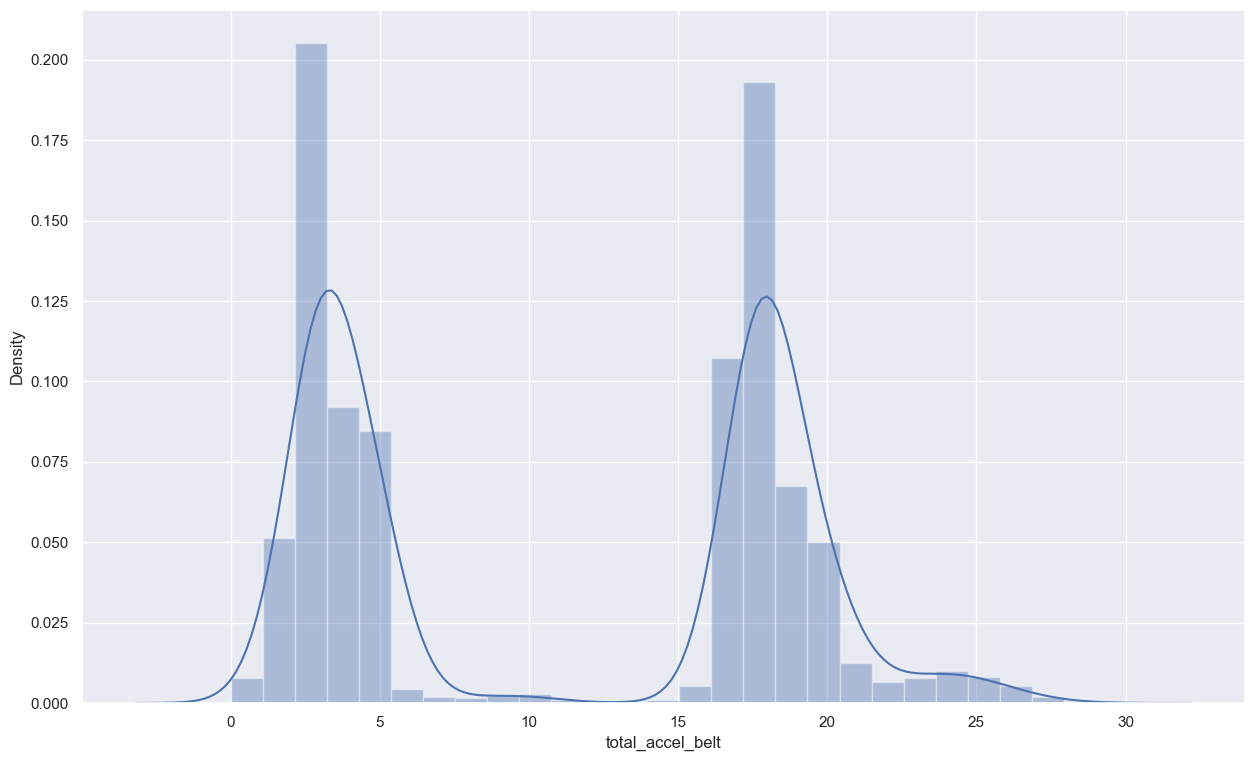

In [38]:
#distribution plot of total accel belt
sns.distplot(df['total_accel_belt'])

<AxesSubplot:xlabel='total_accel_arm', ylabel='Density'>

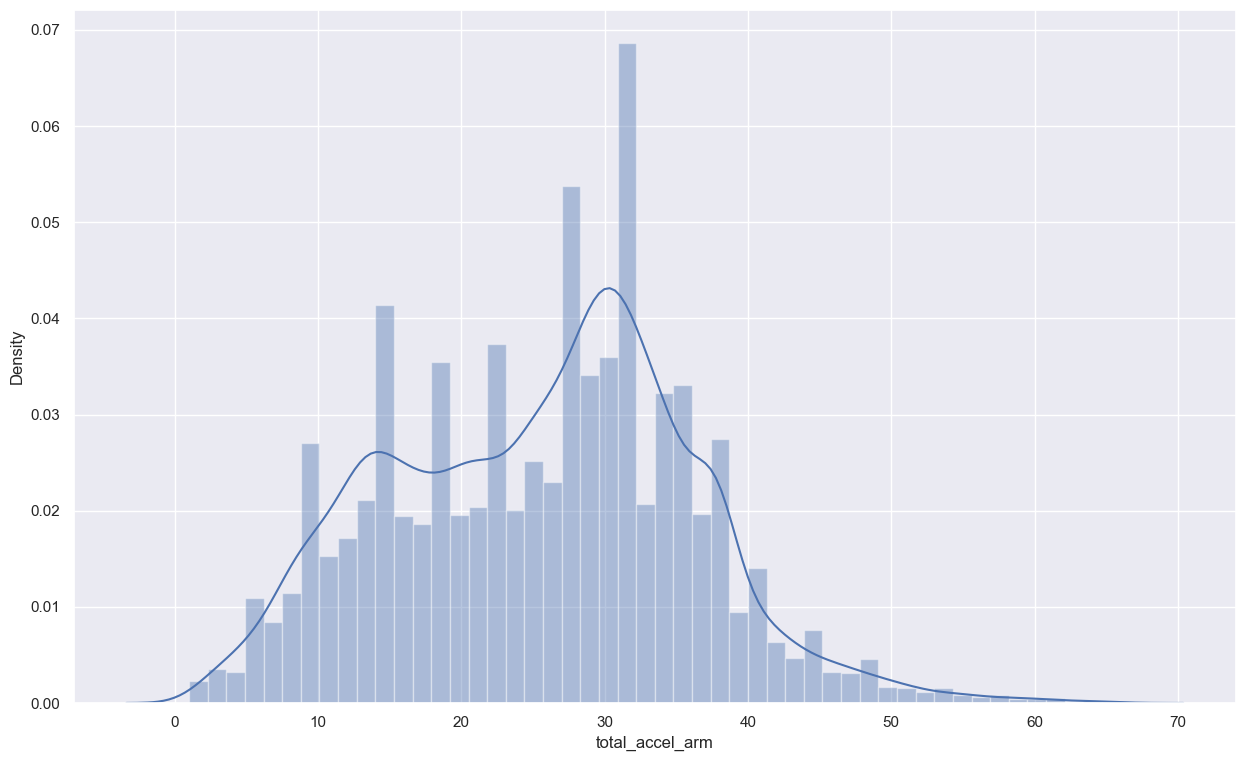

In [39]:
#distribution plot of total_accel_arm

sns.distplot(df['total_accel_arm'])

<AxesSubplot:xlabel='total_accel_dumbbell', ylabel='Density'>

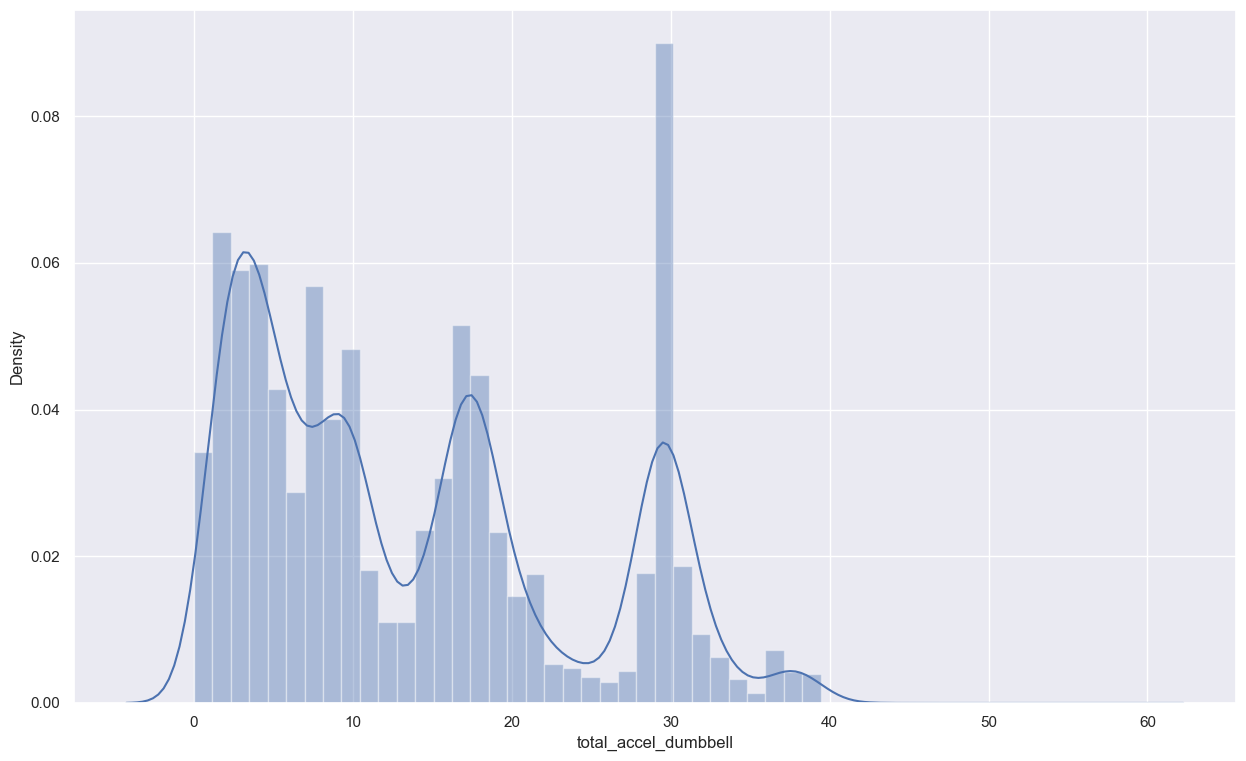

In [40]:
#distribution plot of total_accel_dumbbell
sns.distplot(df['total_accel_dumbbell'])

<AxesSubplot:xlabel='total_accel_forearm', ylabel='Density'>

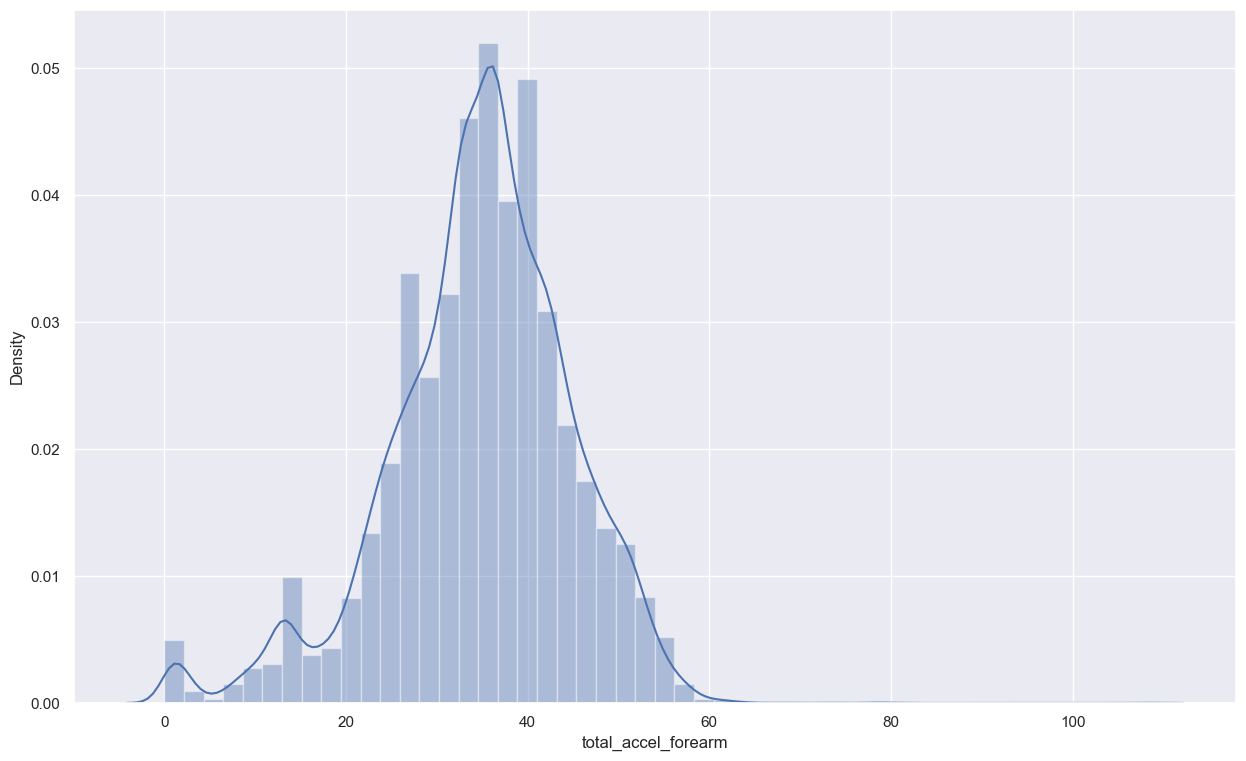

In [41]:
#distribution plot of total_accel_forearm
sns.distplot(df['total_accel_forearm'])

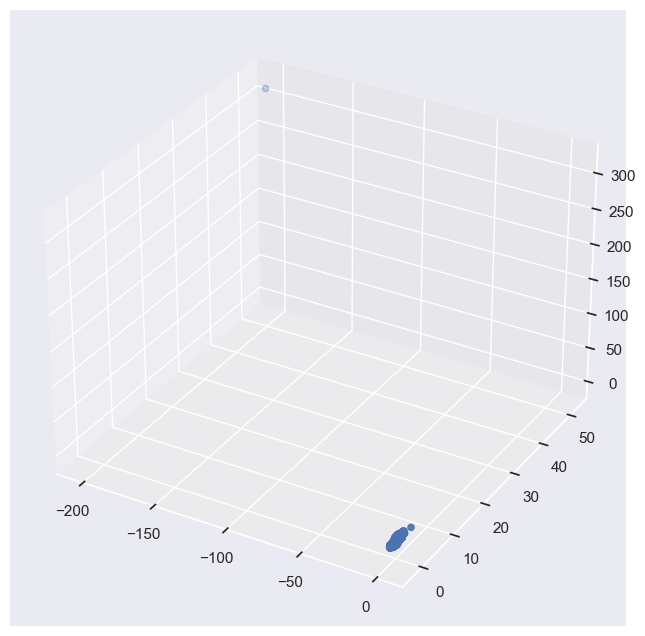

In [42]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#Dumbbell

plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['gyros_dumbbell_x'], df['gyros_dumbbell_y'],df['gyros_dumbbell_z'])

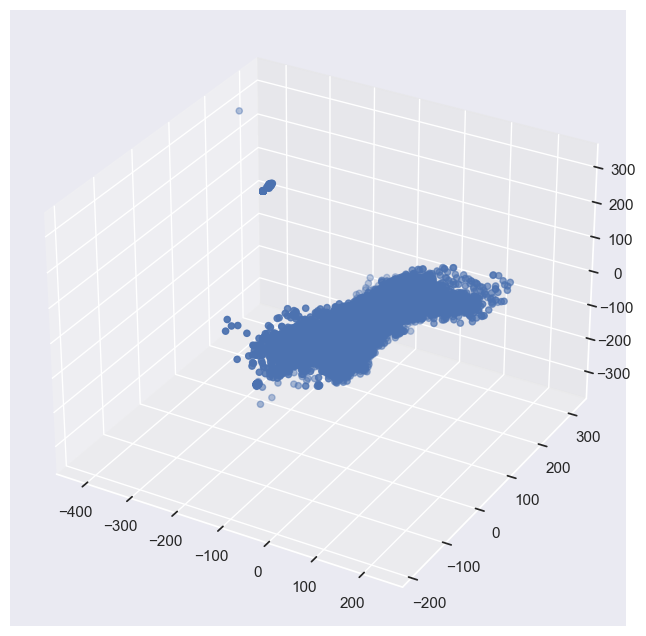

In [43]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['accel_dumbbell_x'], df['accel_dumbbell_y'], df['accel_dumbbell_z'])

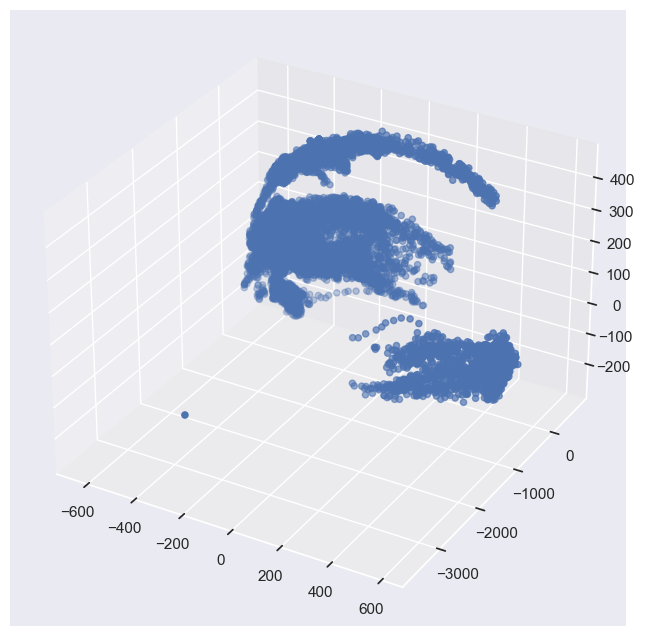

In [44]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['magnet_dumbbell_x'], df['magnet_dumbbell_y'], df['magnet_dumbbell_z'])

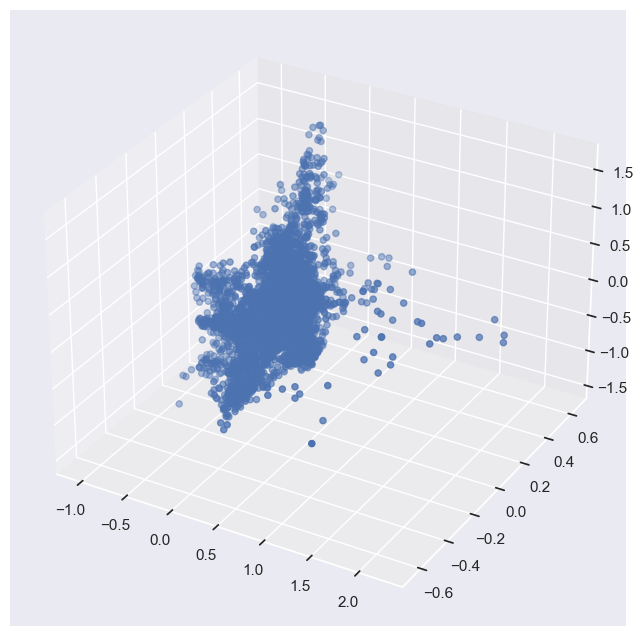

In [45]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['gyros_belt_x'], df['gyros_belt_y'], df['gyros_belt_z'])

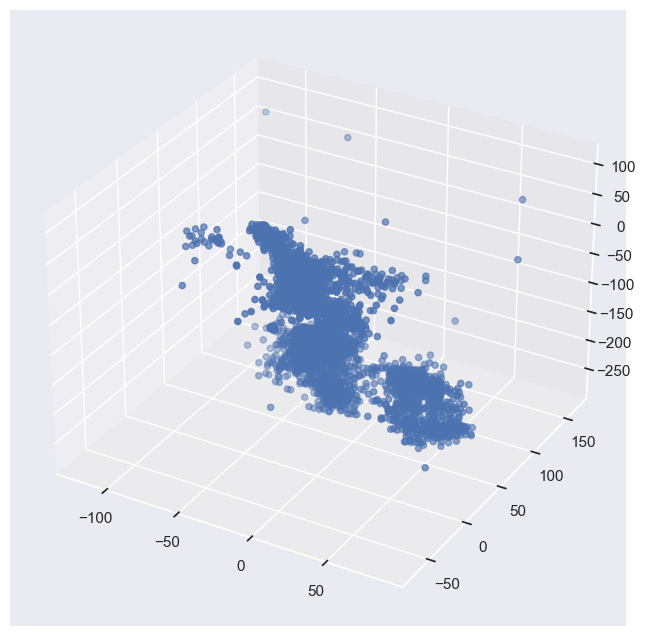

In [46]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['accel_belt_x'], df['accel_belt_y'], df['accel_belt_z'])

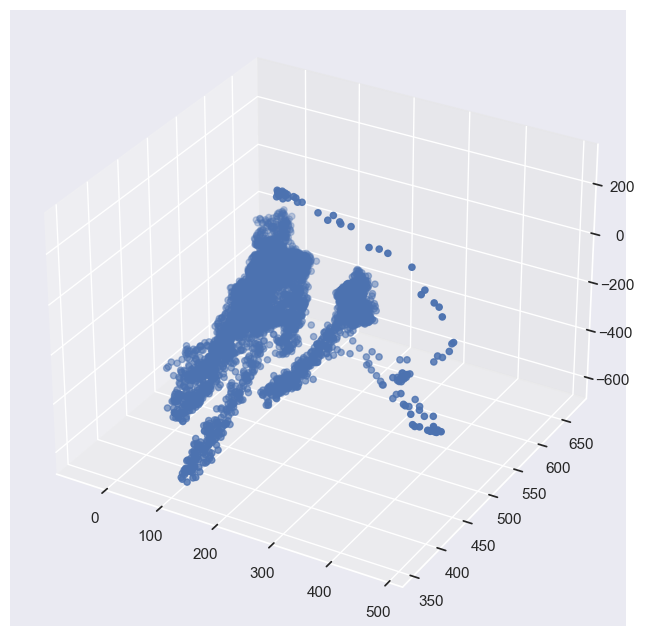

In [47]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['magnet_belt_x'], df['magnet_belt_y'], df['magnet_belt_z'])

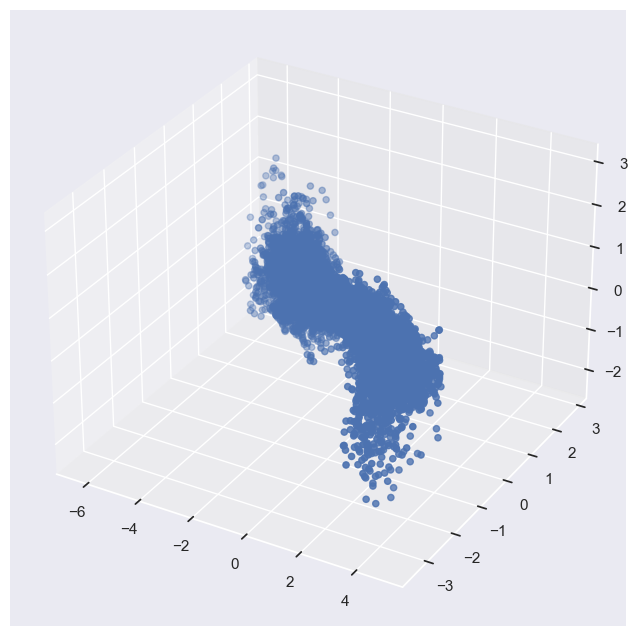

In [48]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['gyros_arm_x'], df['gyros_arm_y'], df['gyros_arm_z'])

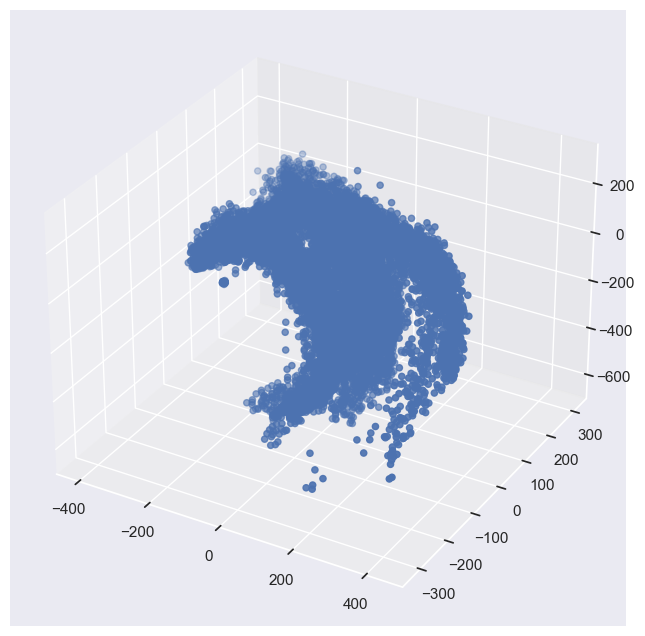

In [49]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['accel_arm_x'], df['accel_arm_y'], df['accel_arm_z'])

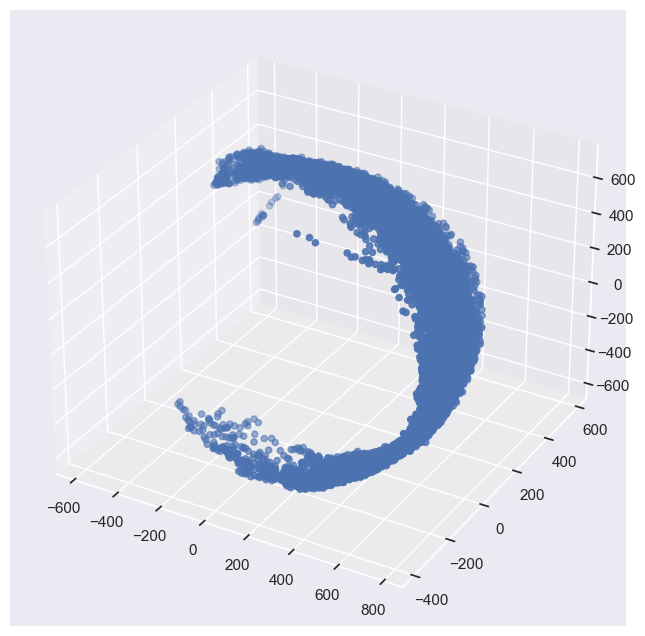

In [50]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['magnet_arm_x'], df['magnet_arm_y'], df['magnet_arm_z'])

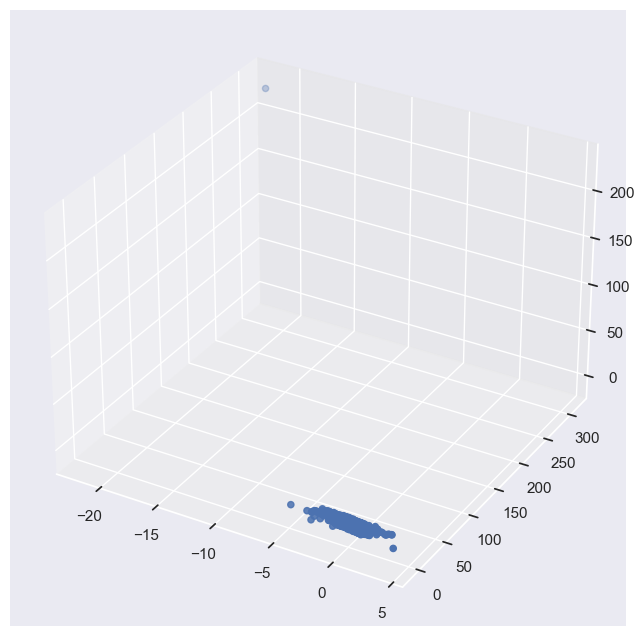

In [51]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['gyros_forearm_x'], df['gyros_forearm_y'], df['gyros_forearm_z'])

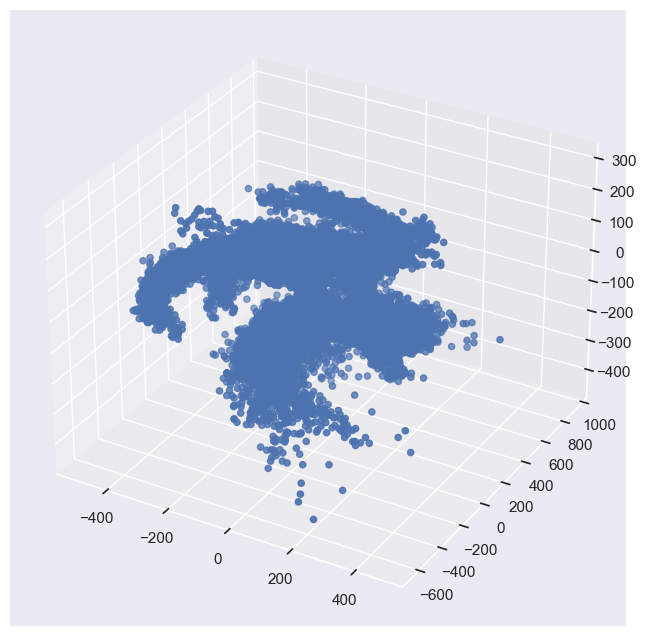

In [52]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['accel_forearm_x'], df['accel_forearm_y'], df['accel_forearm_z'])

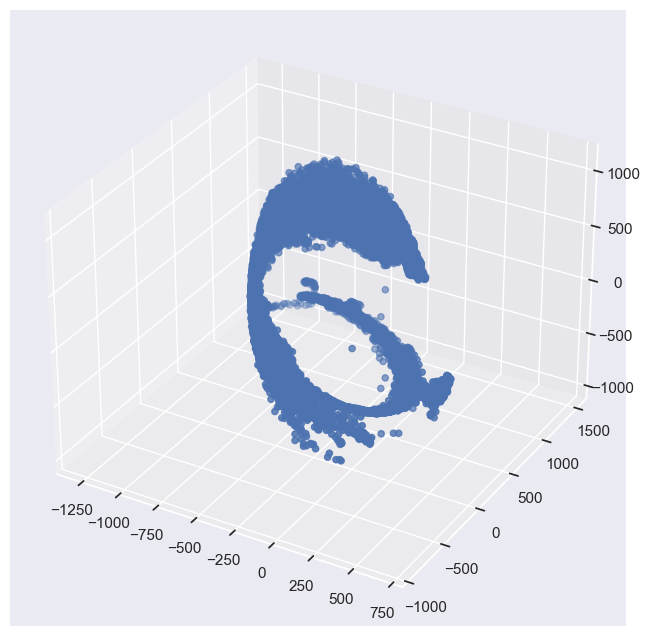

In [53]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['magnet_forearm_x'], df['magnet_forearm_y'], df['magnet_forearm_z'])

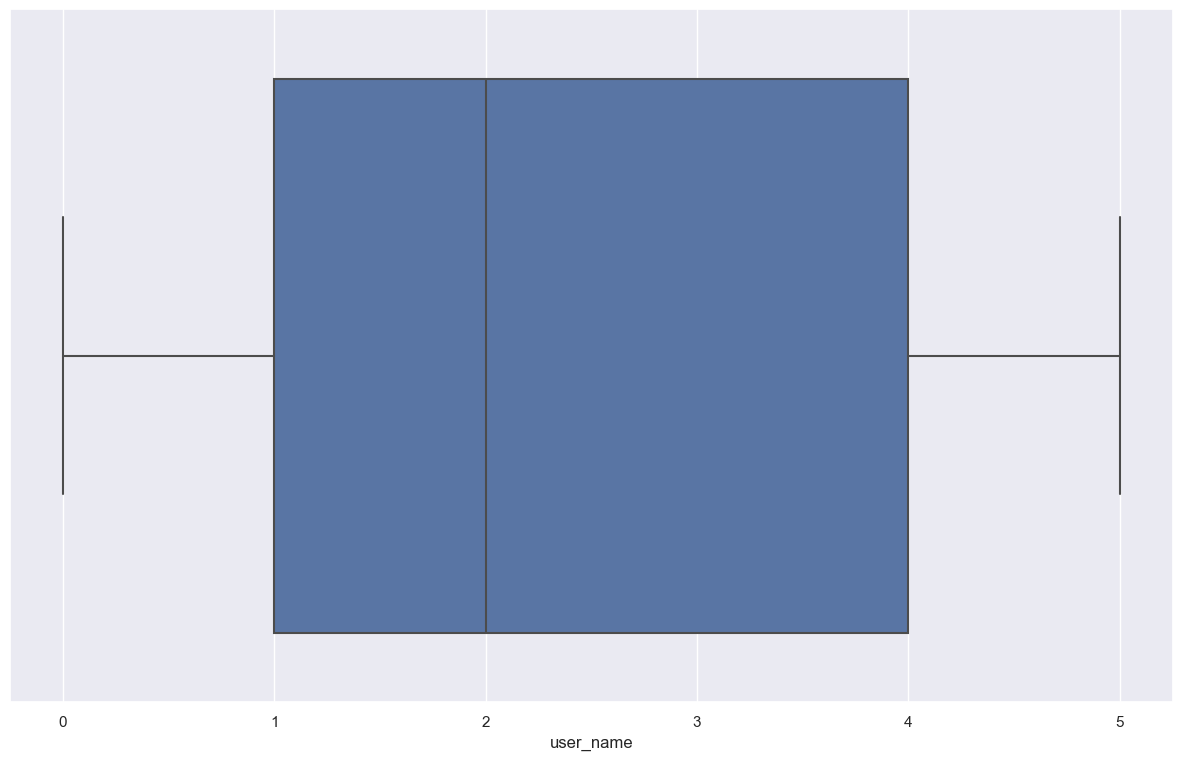

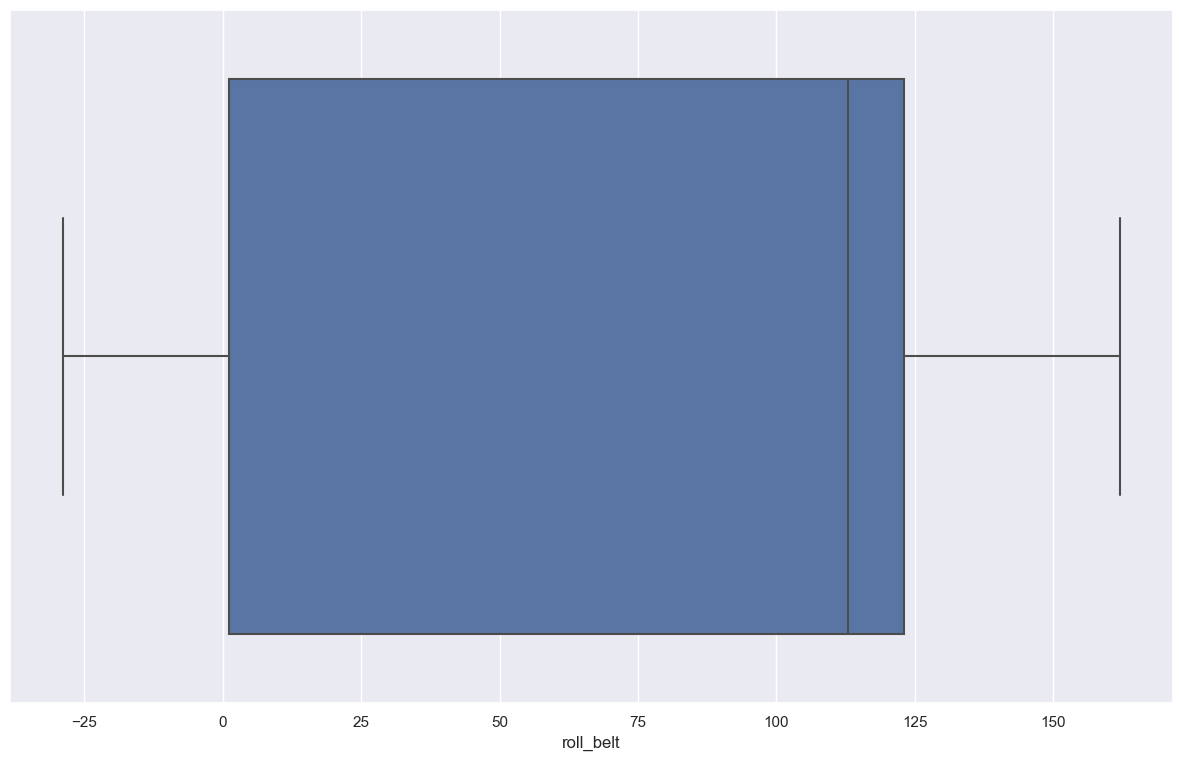

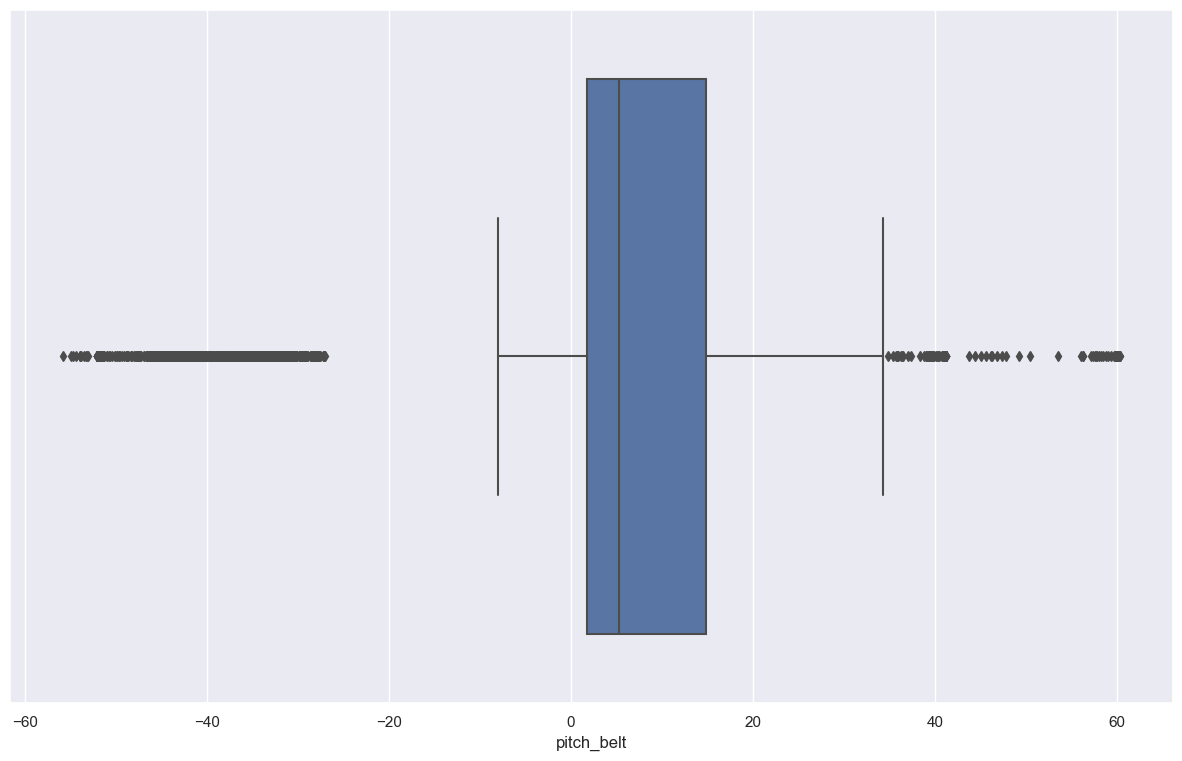

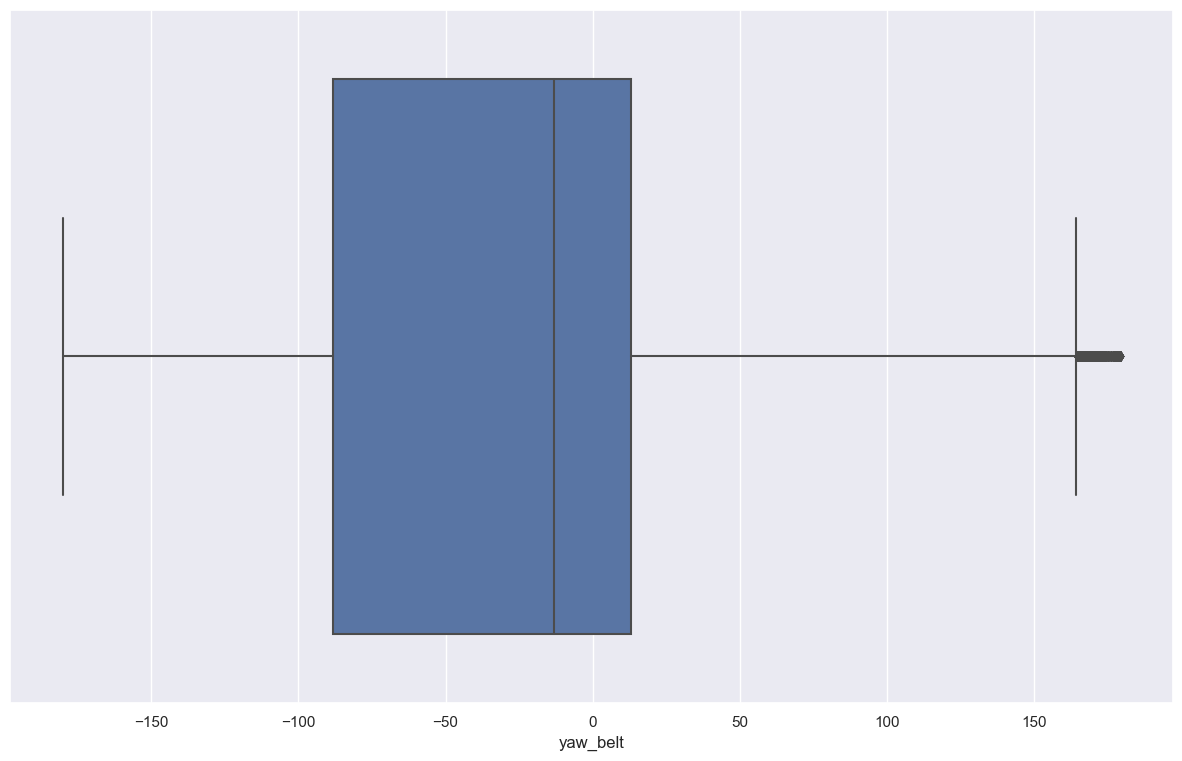

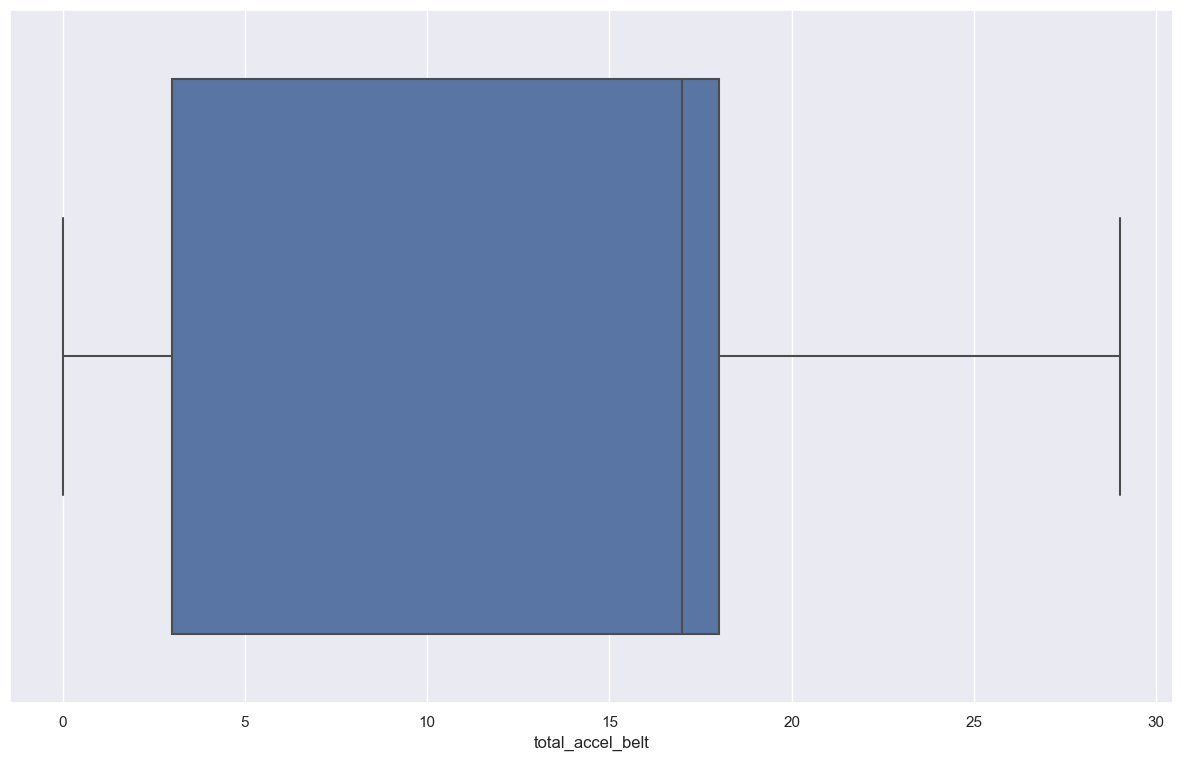

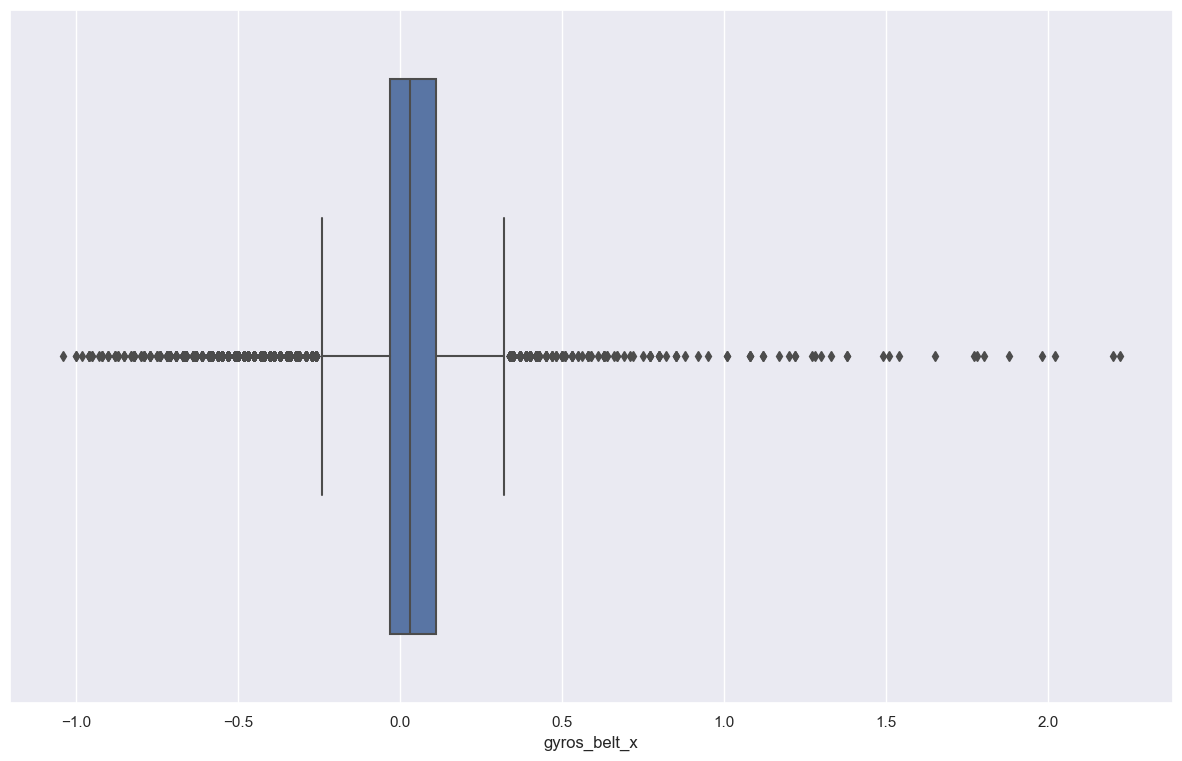

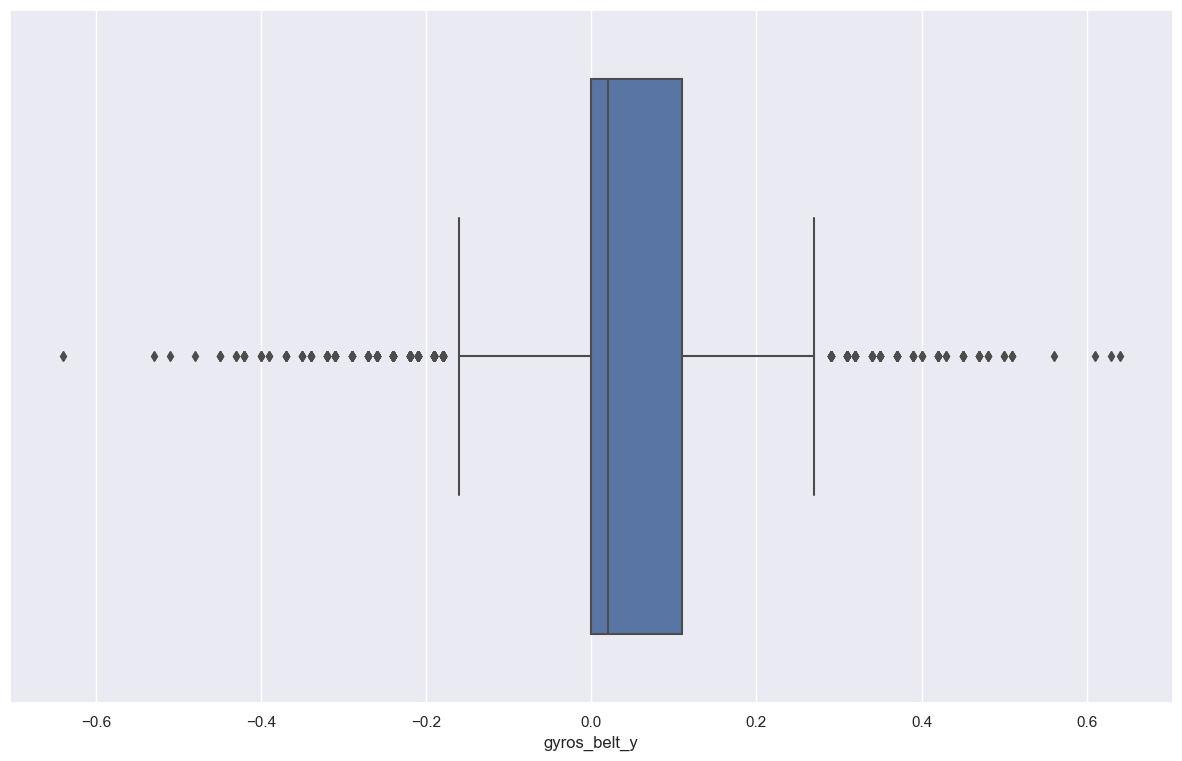

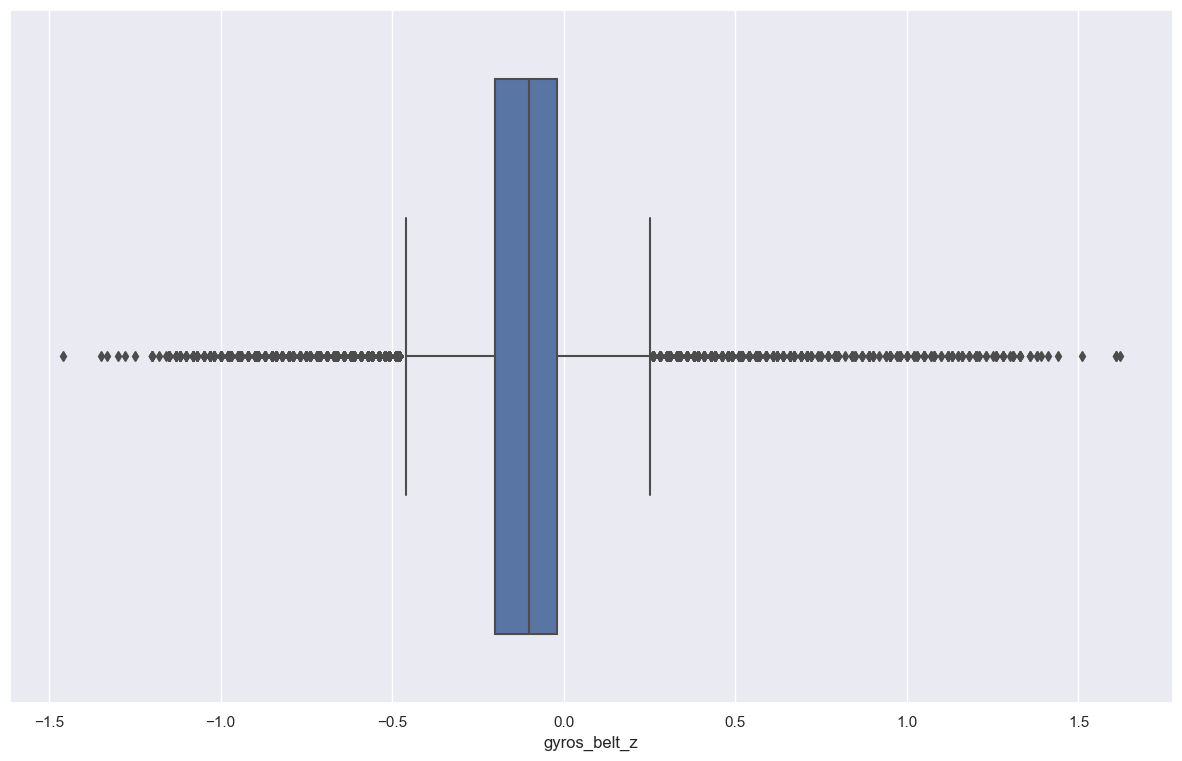

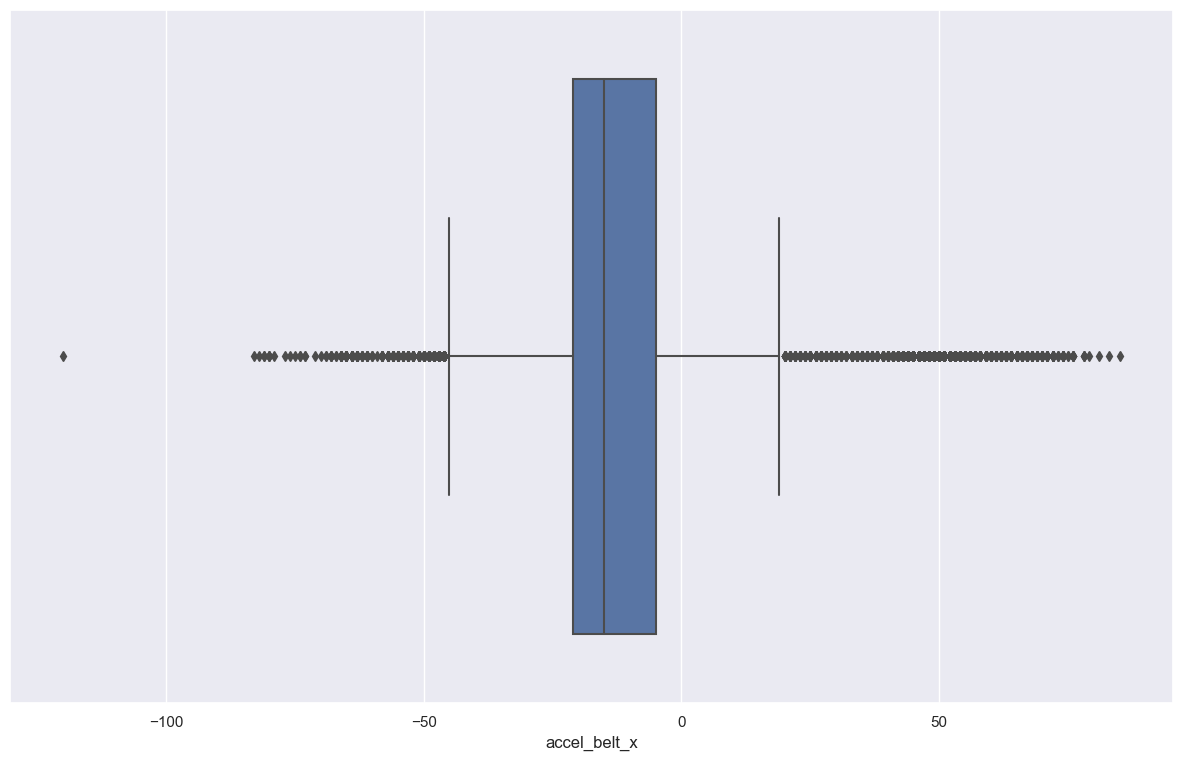

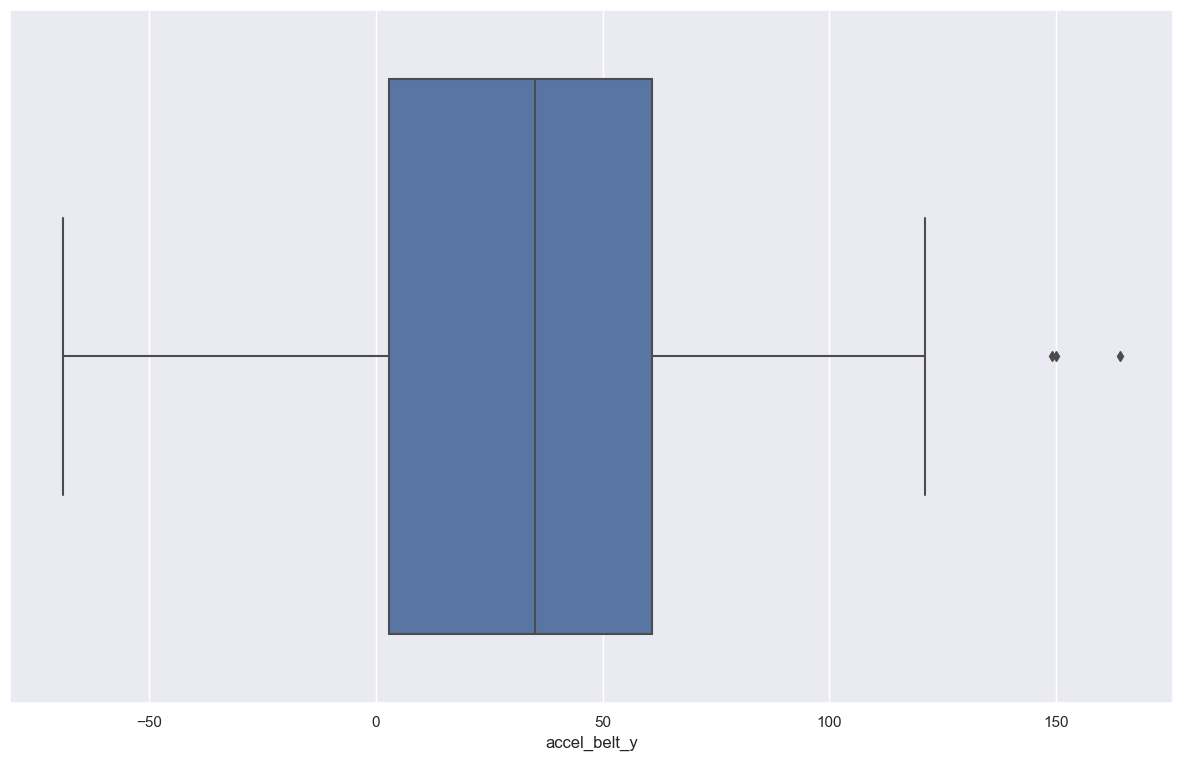

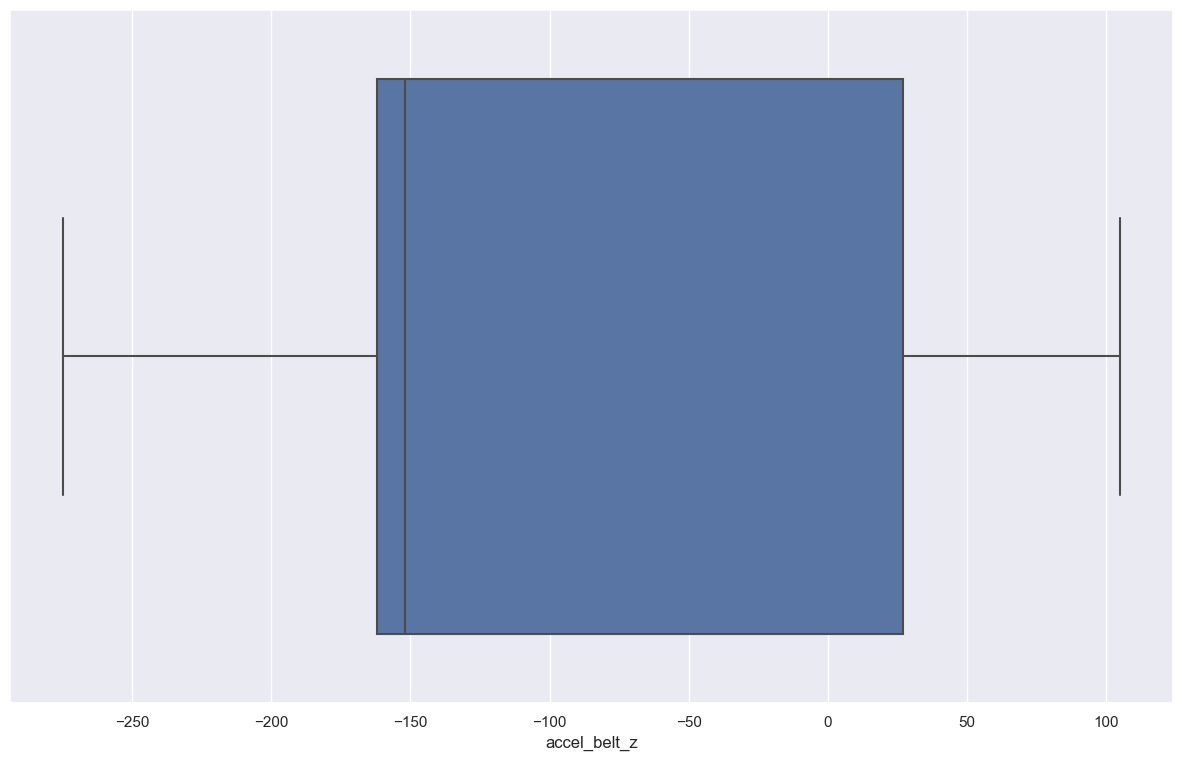

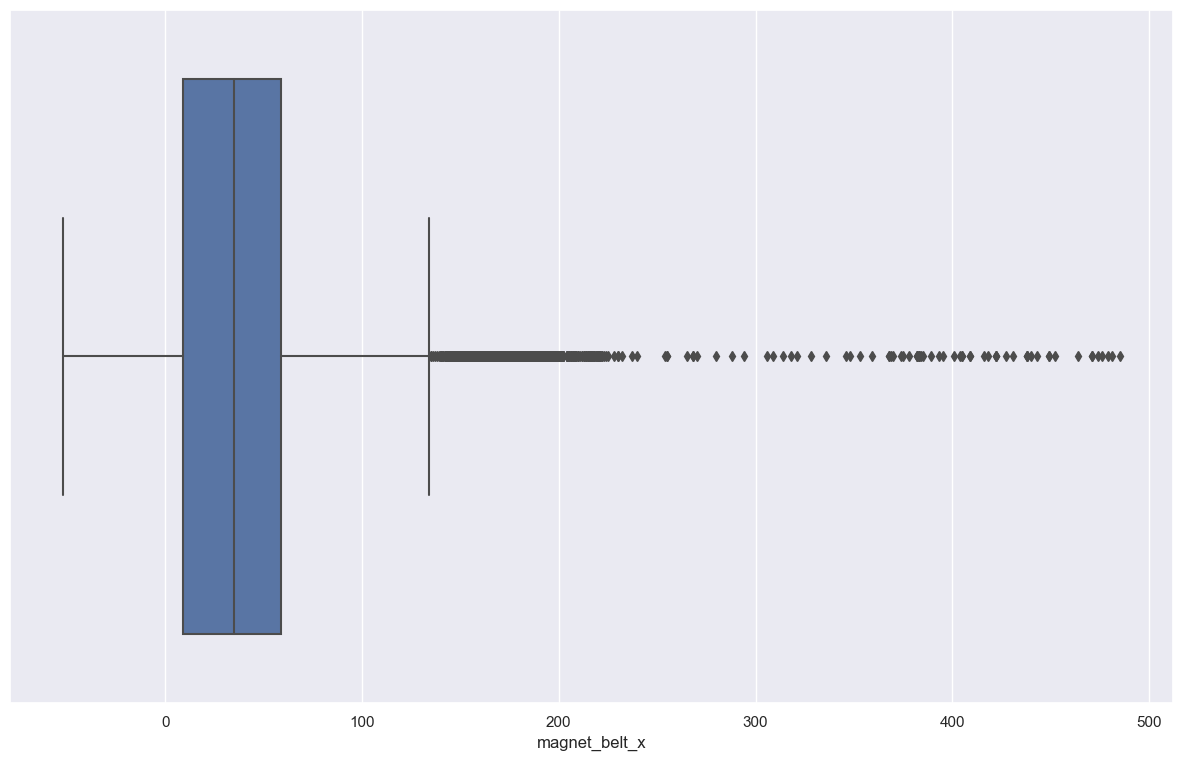

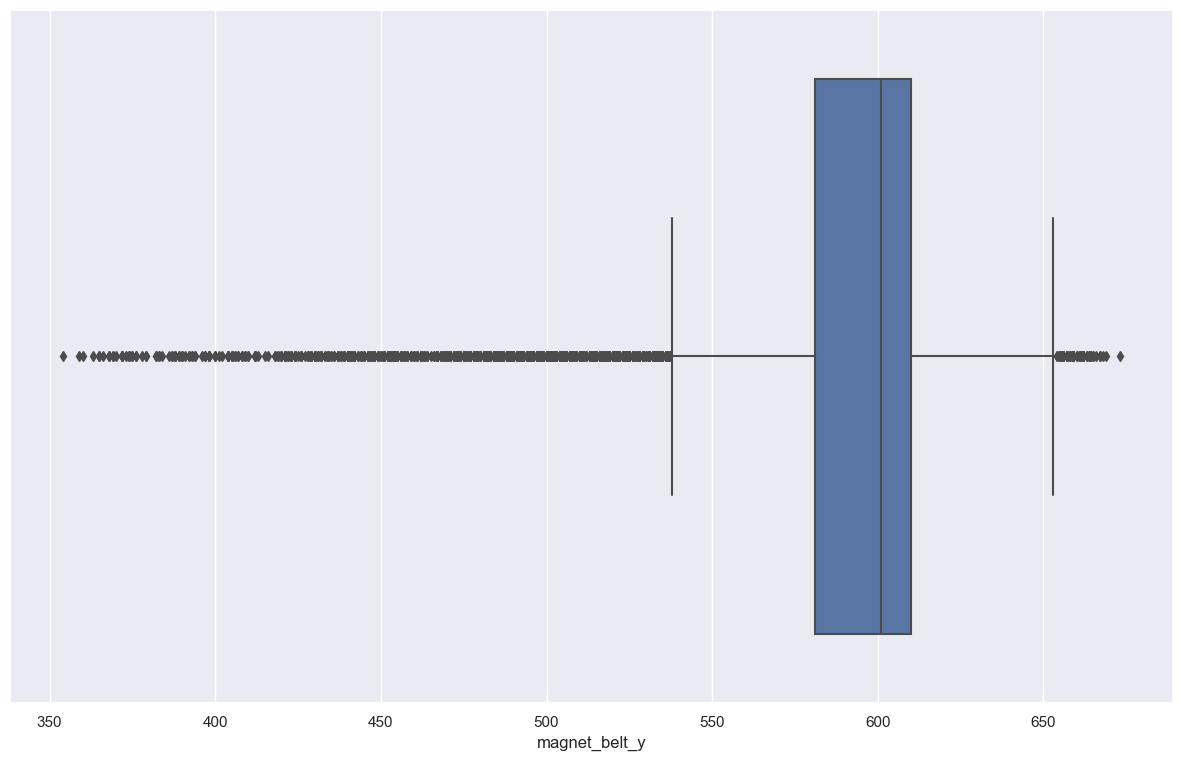

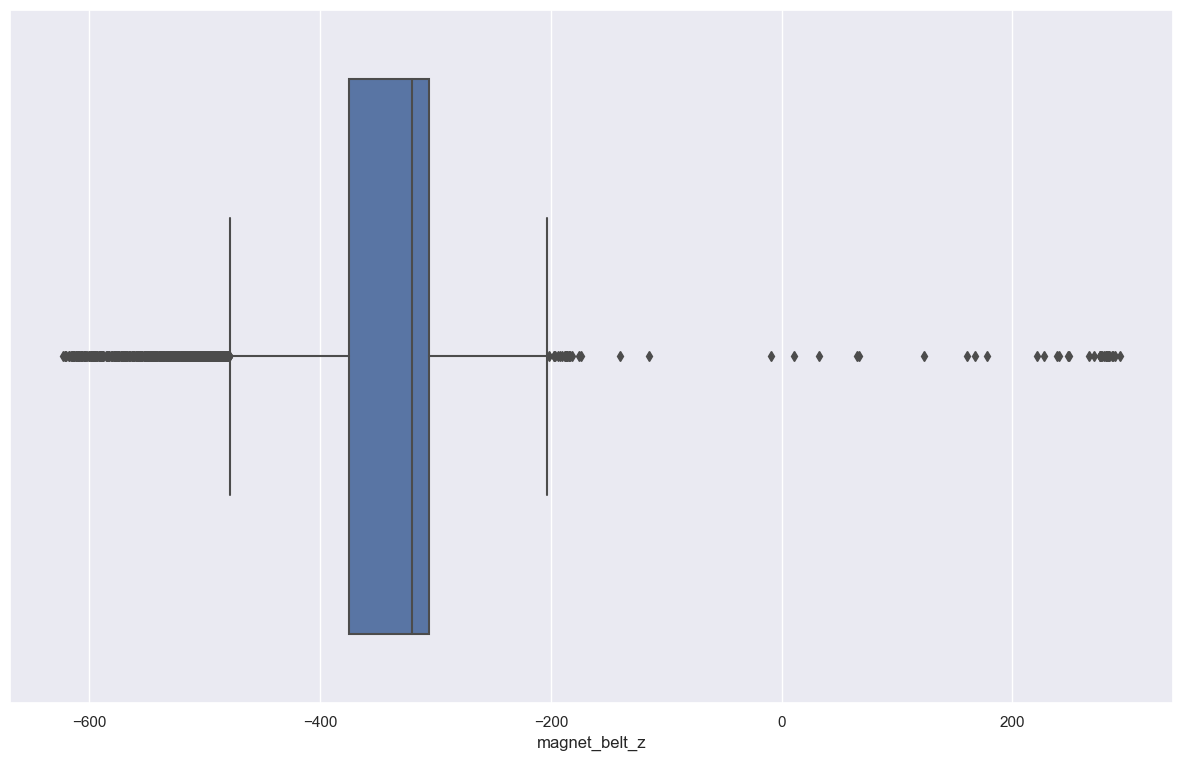

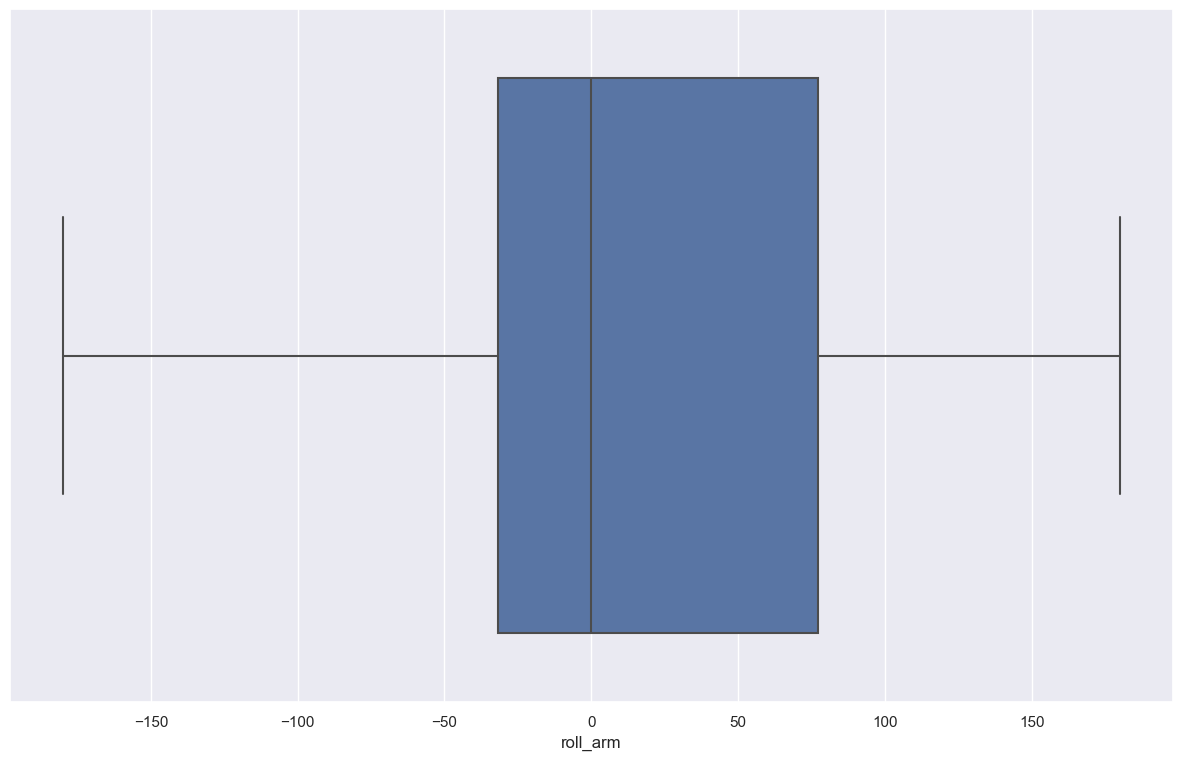

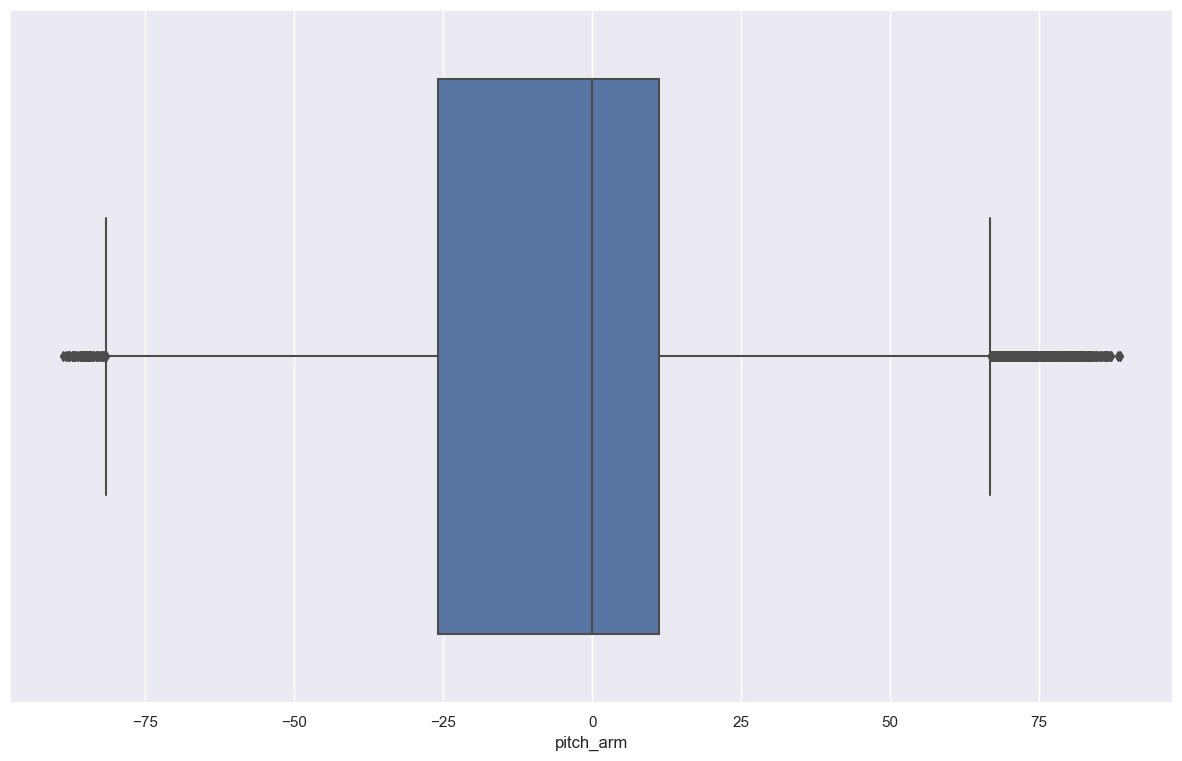

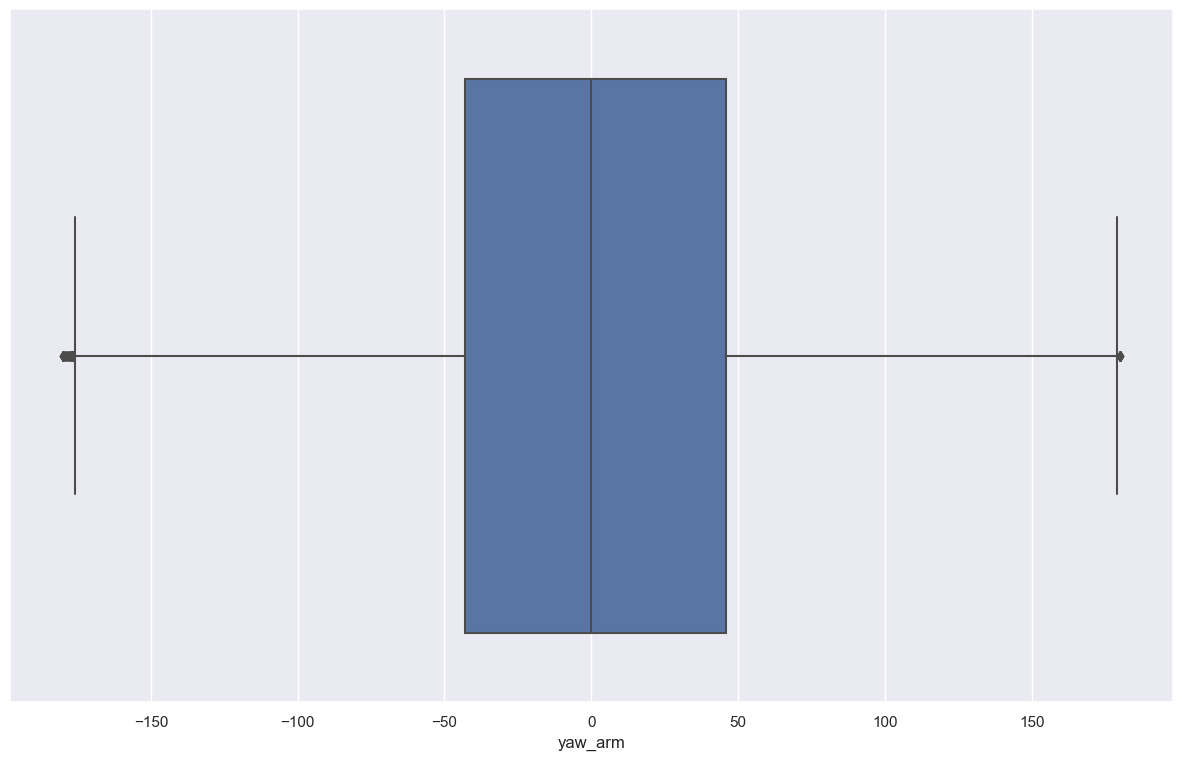

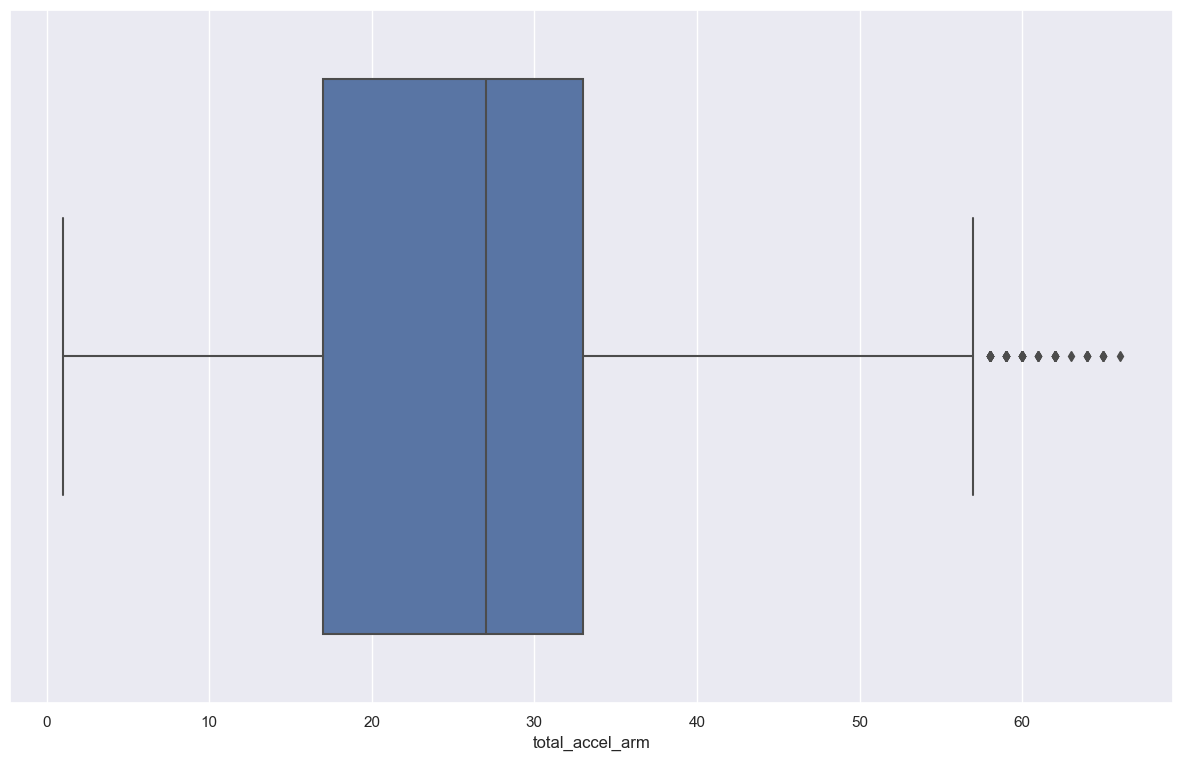

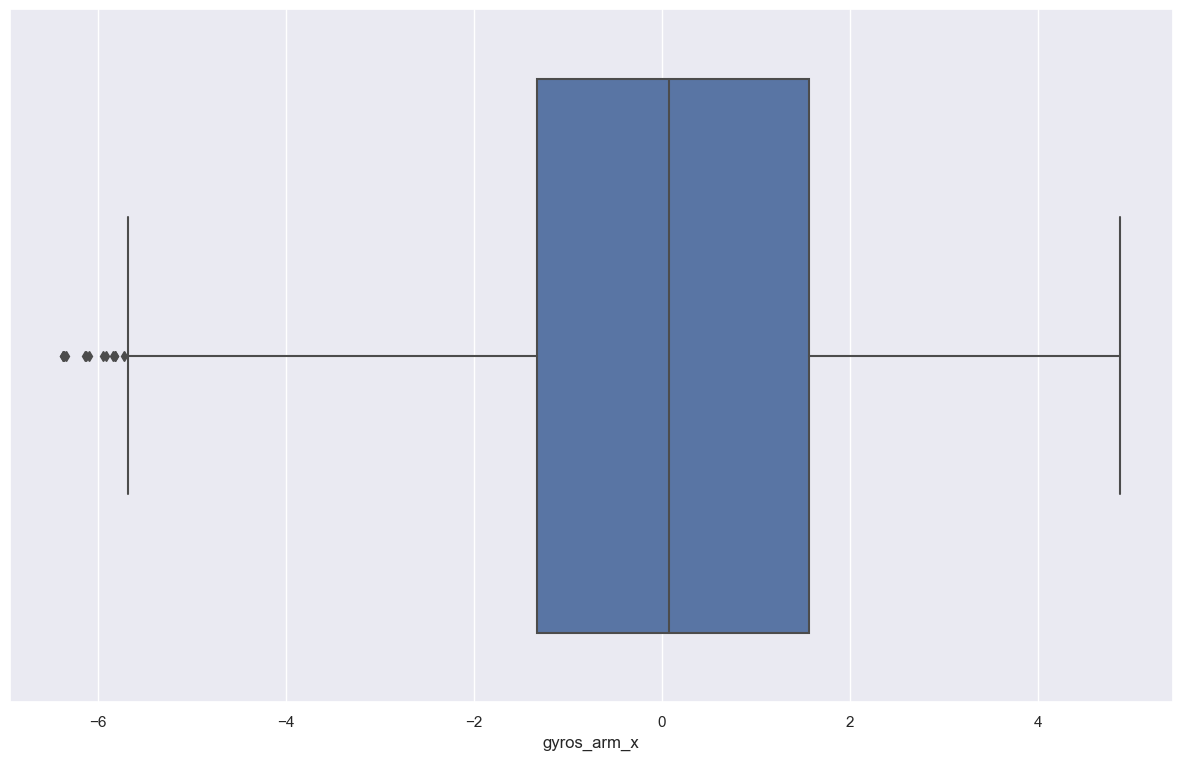

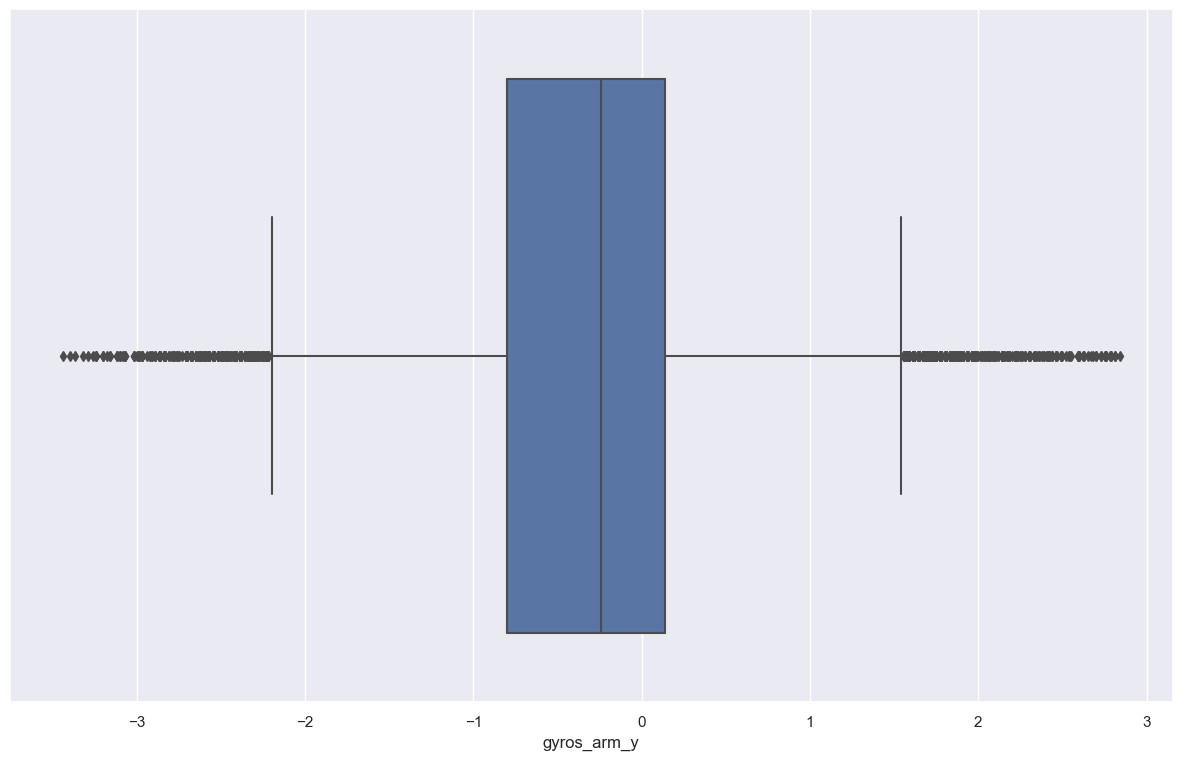

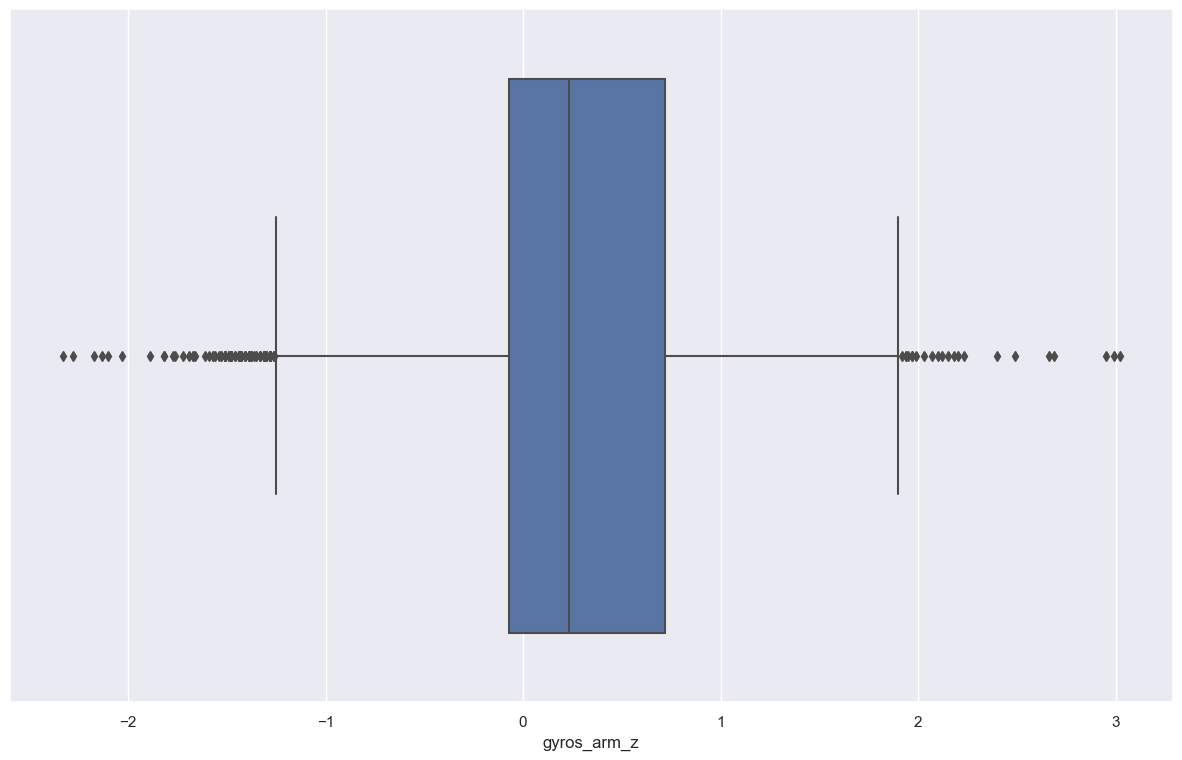

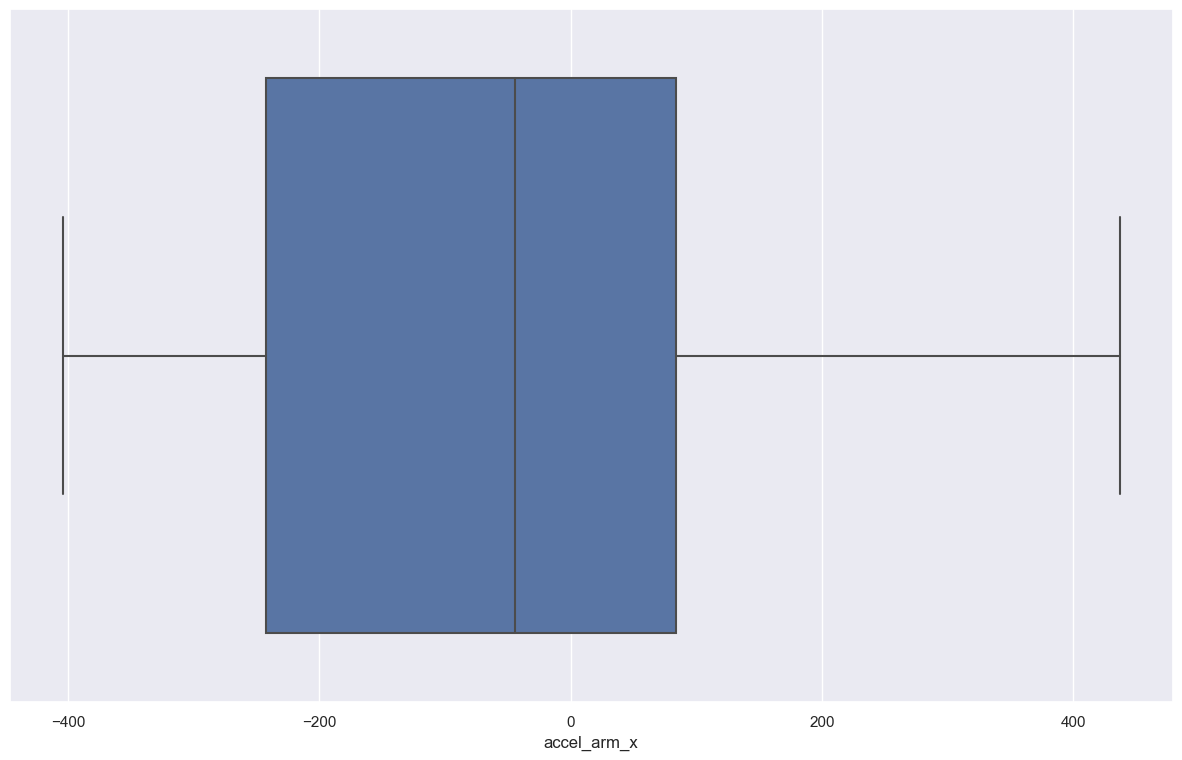

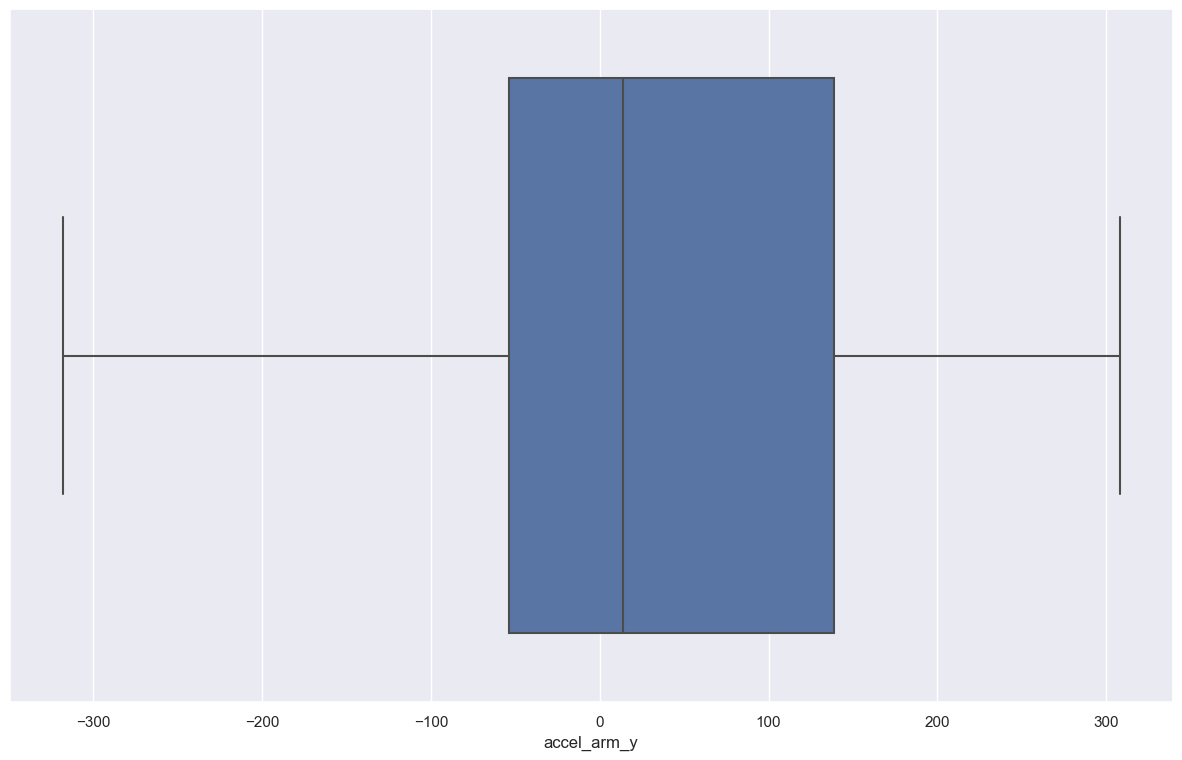

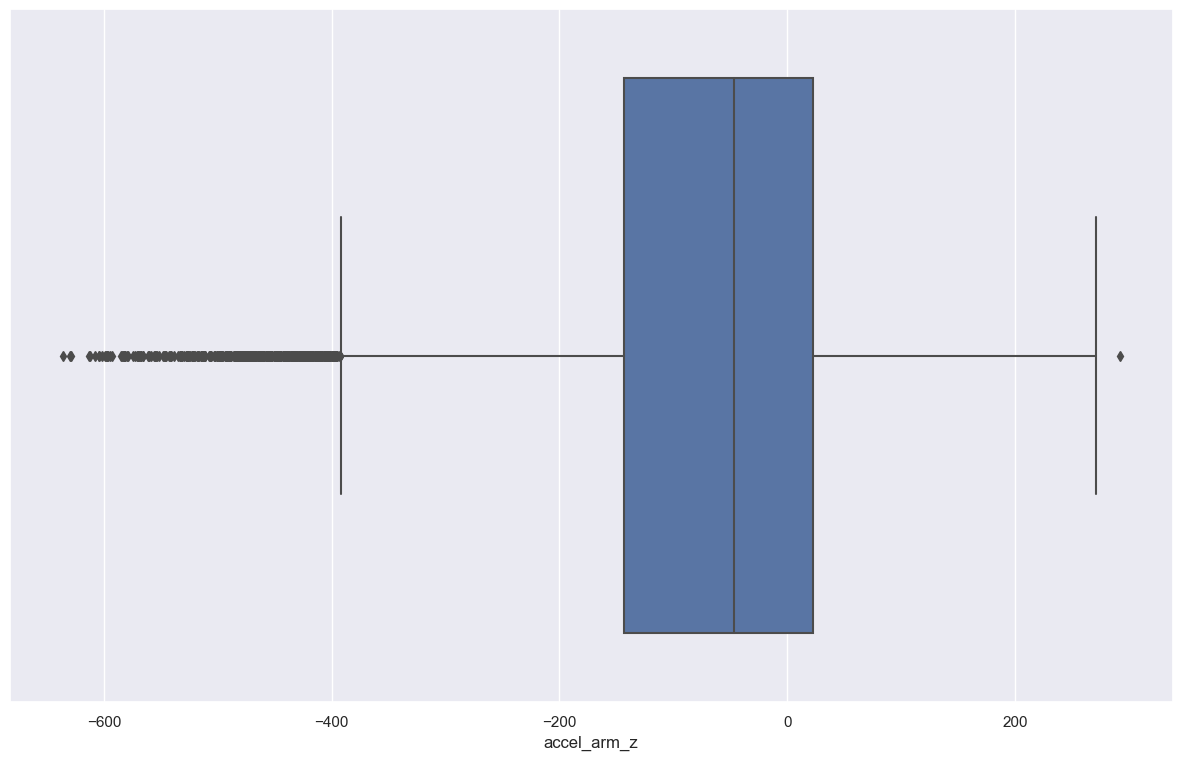

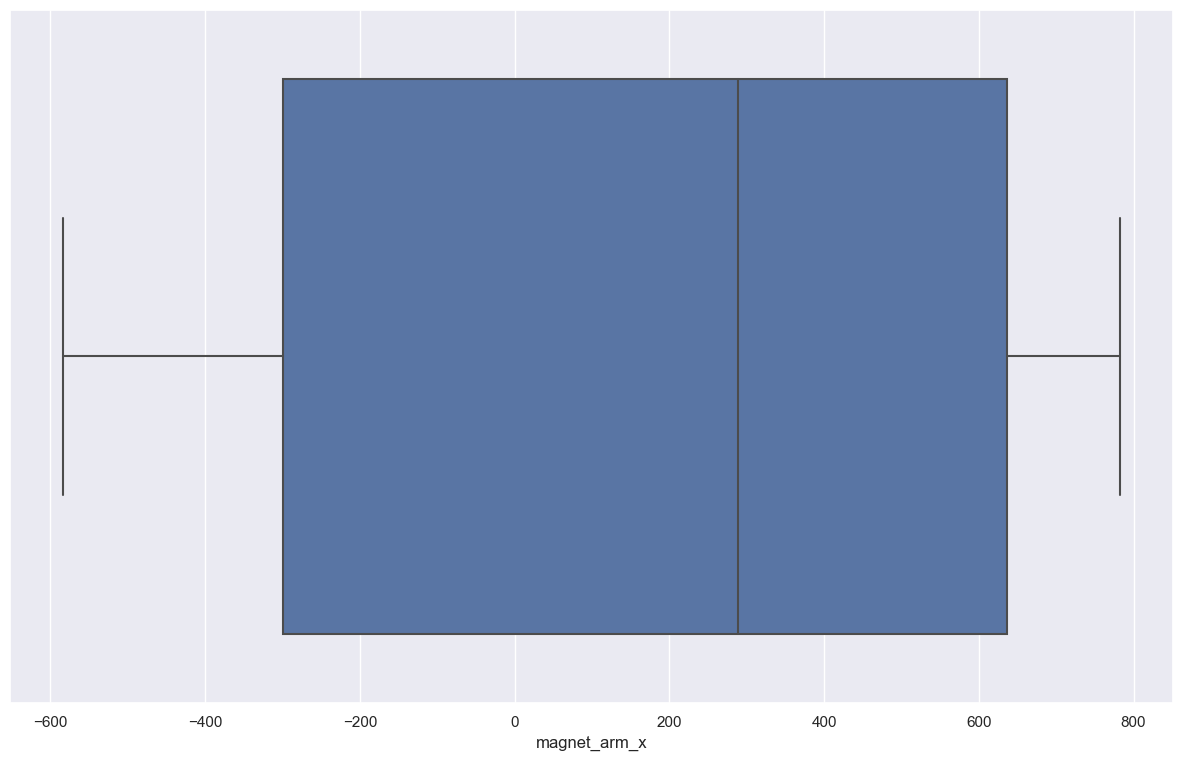

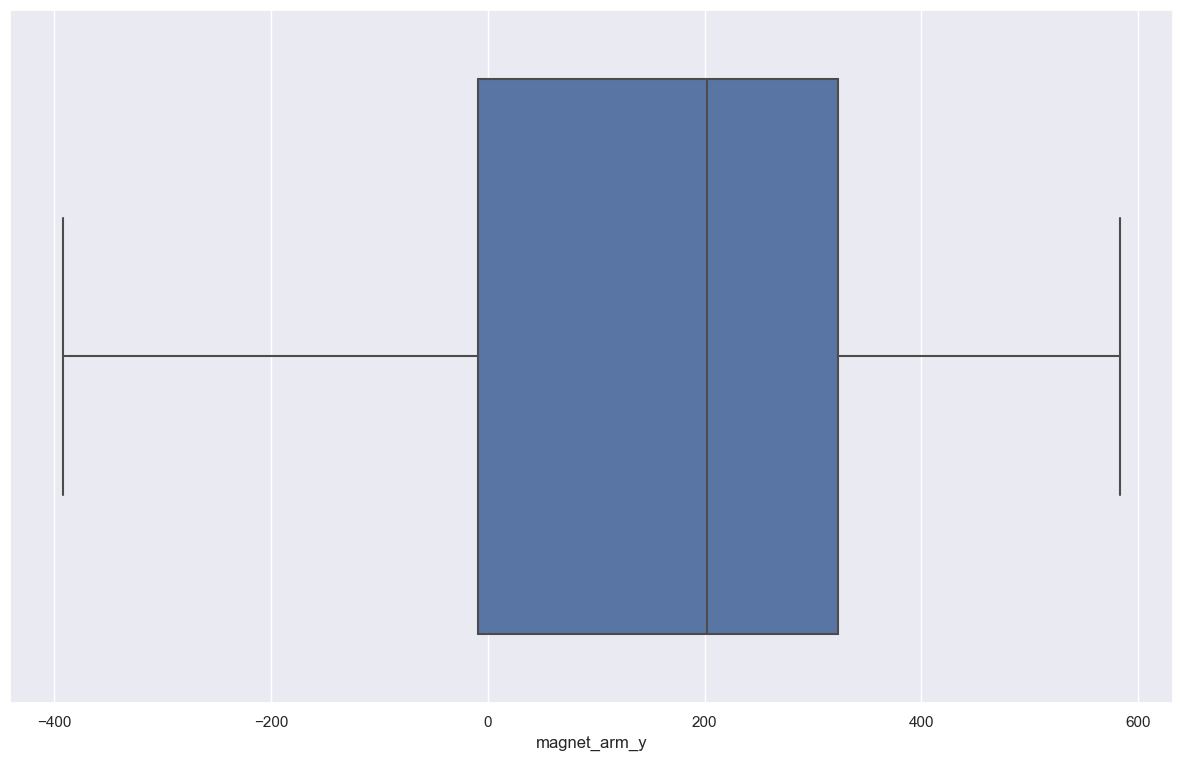

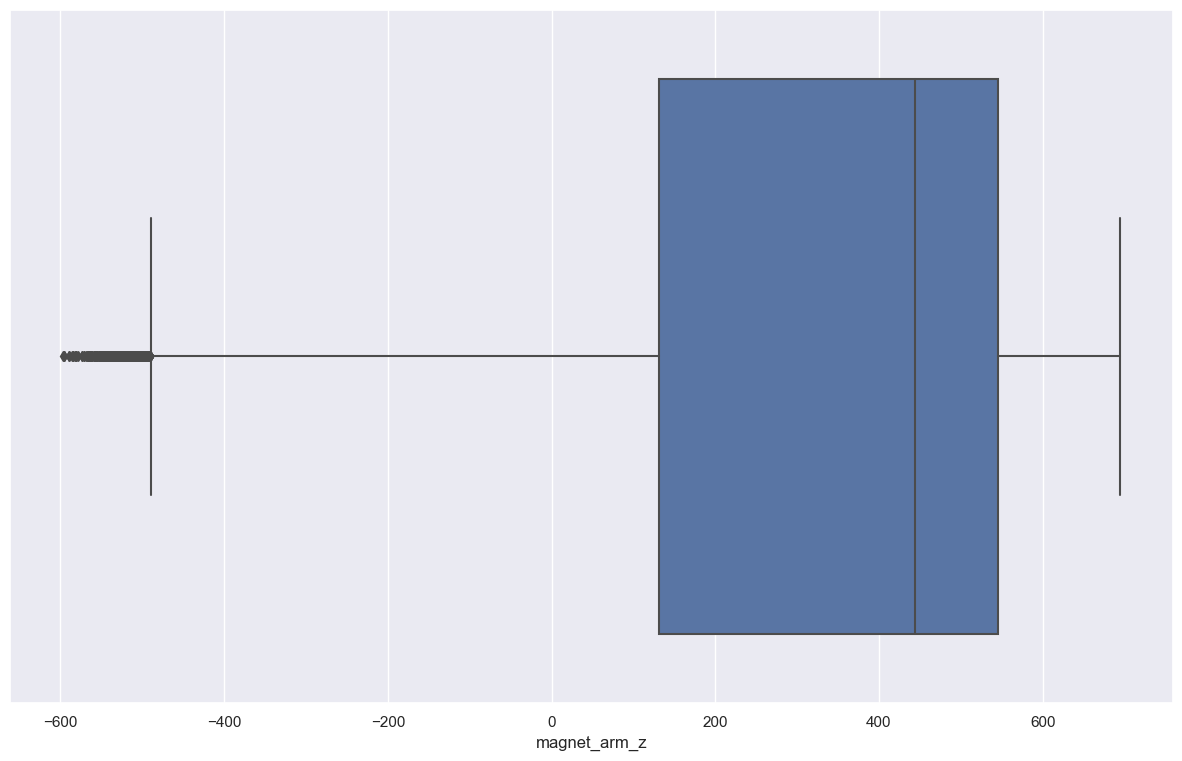

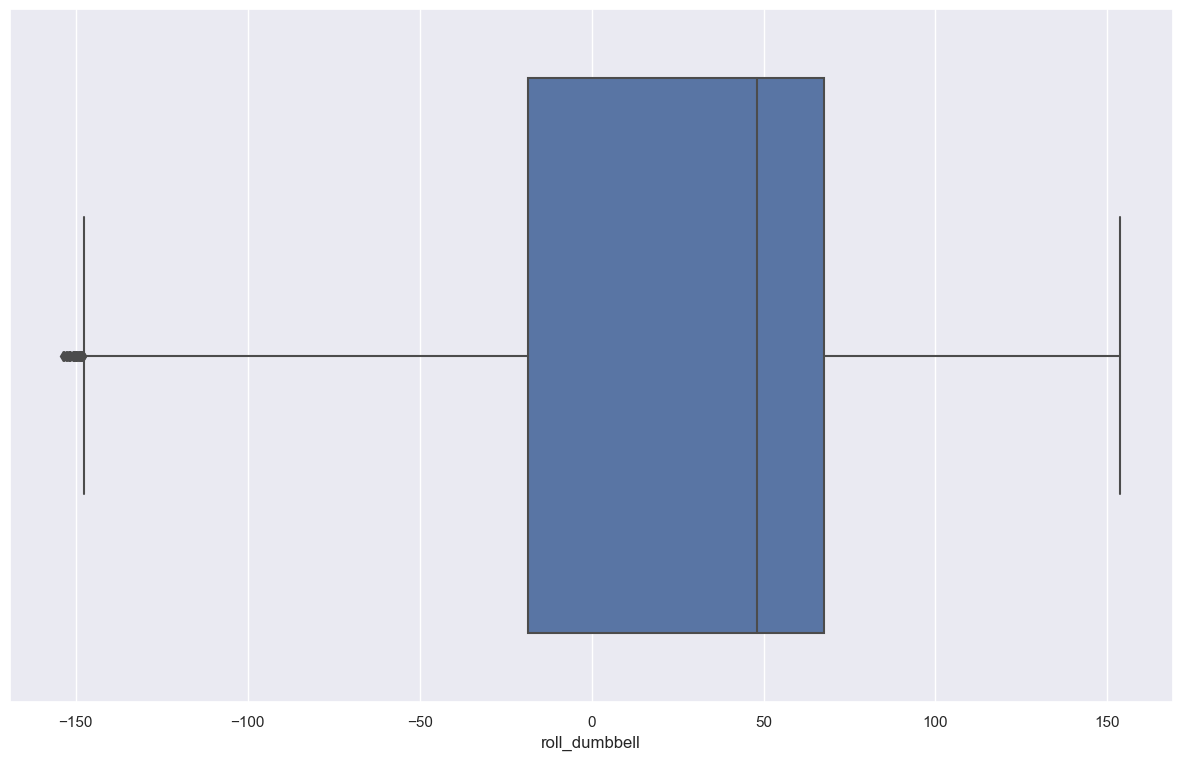

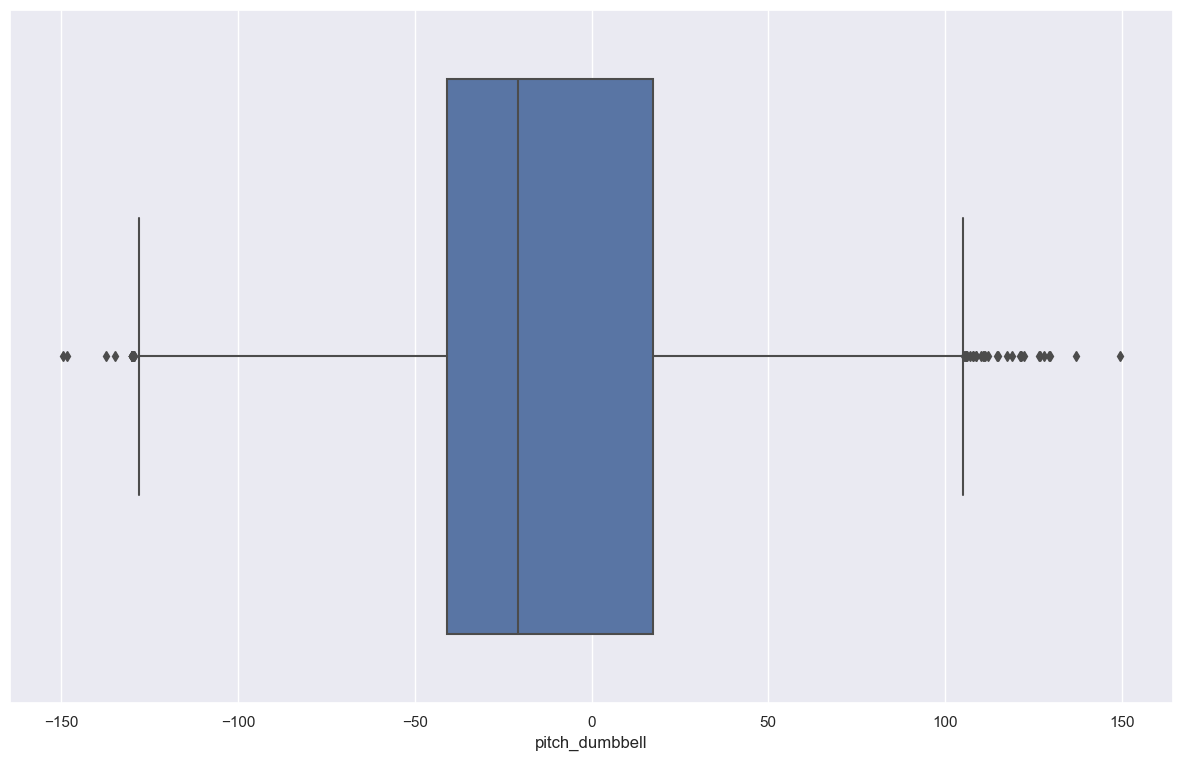

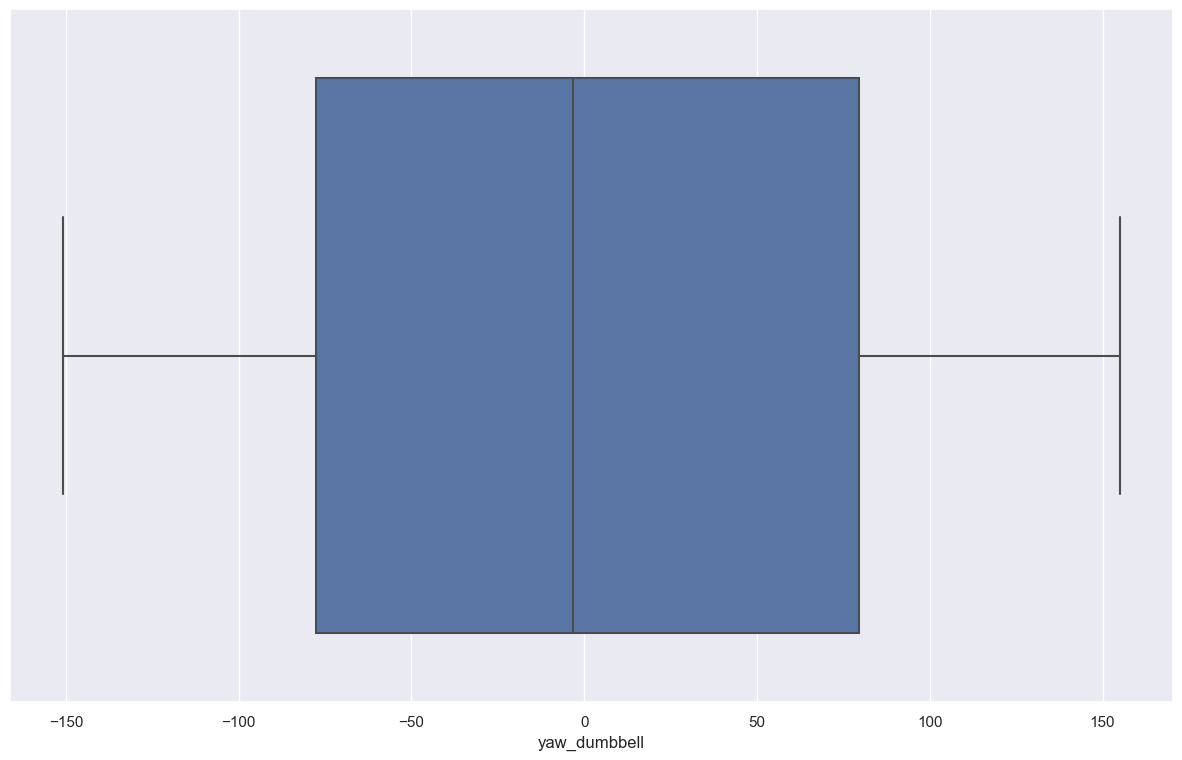

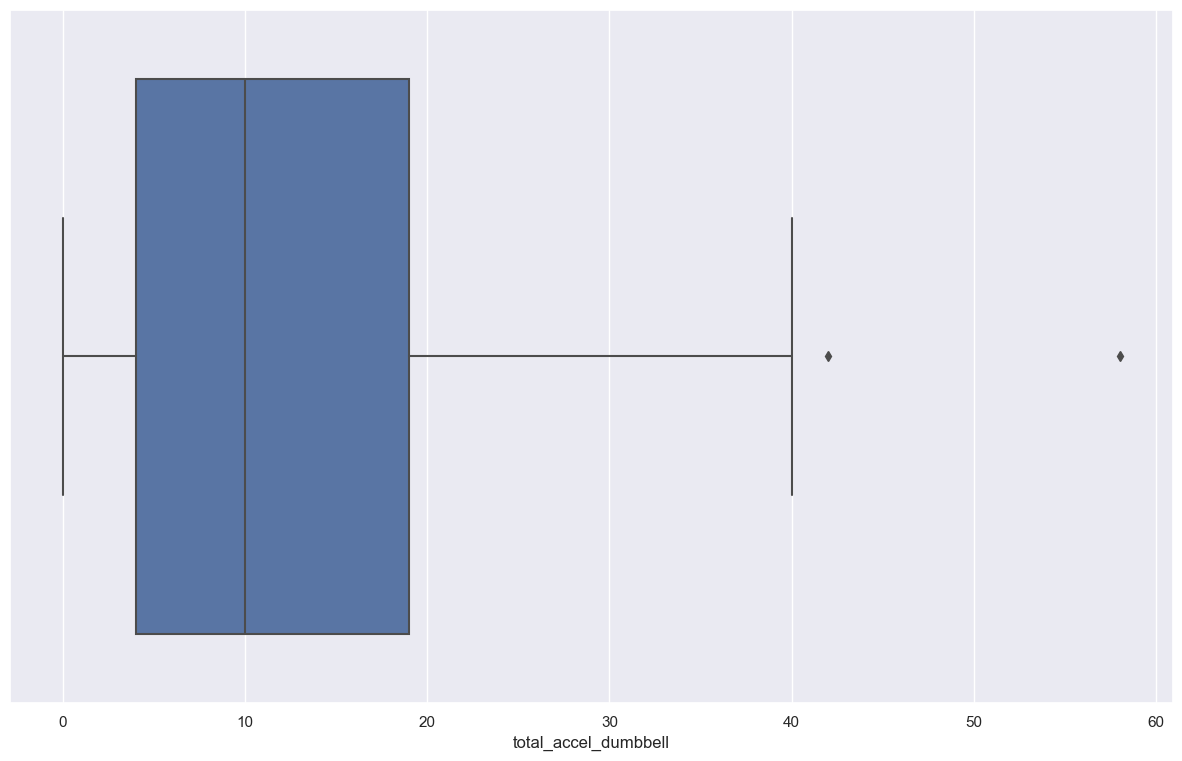

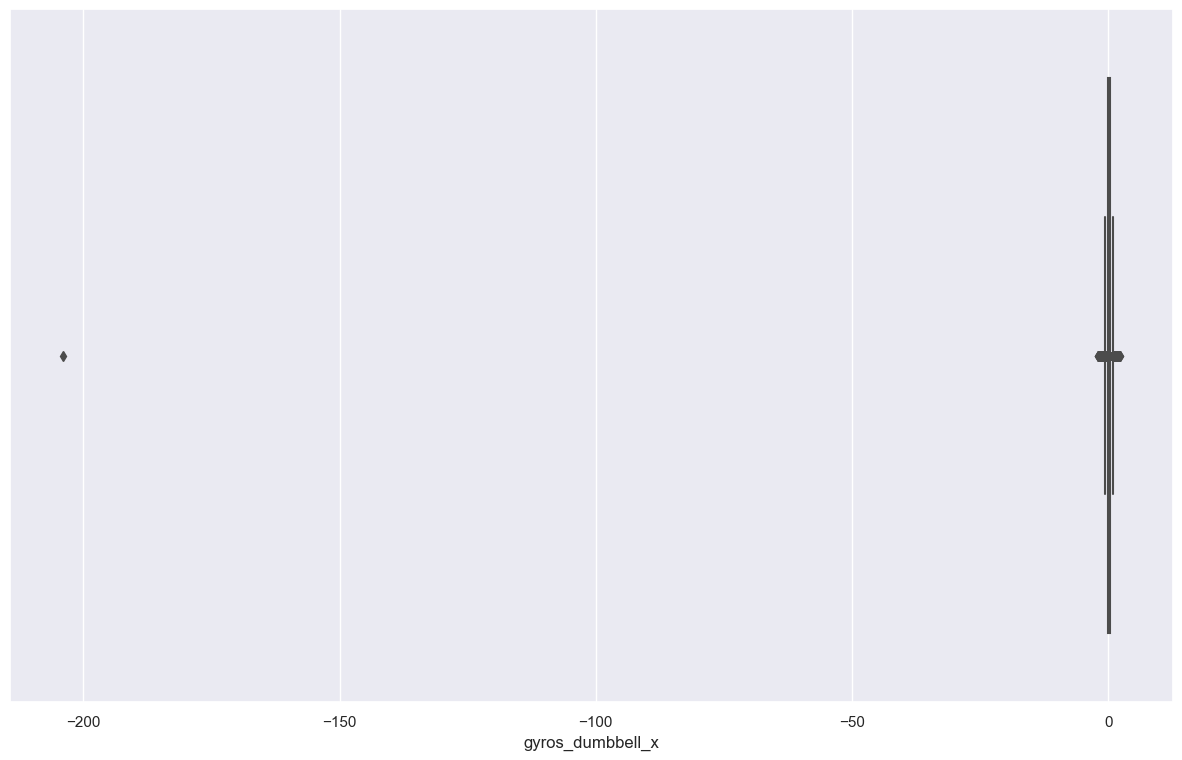

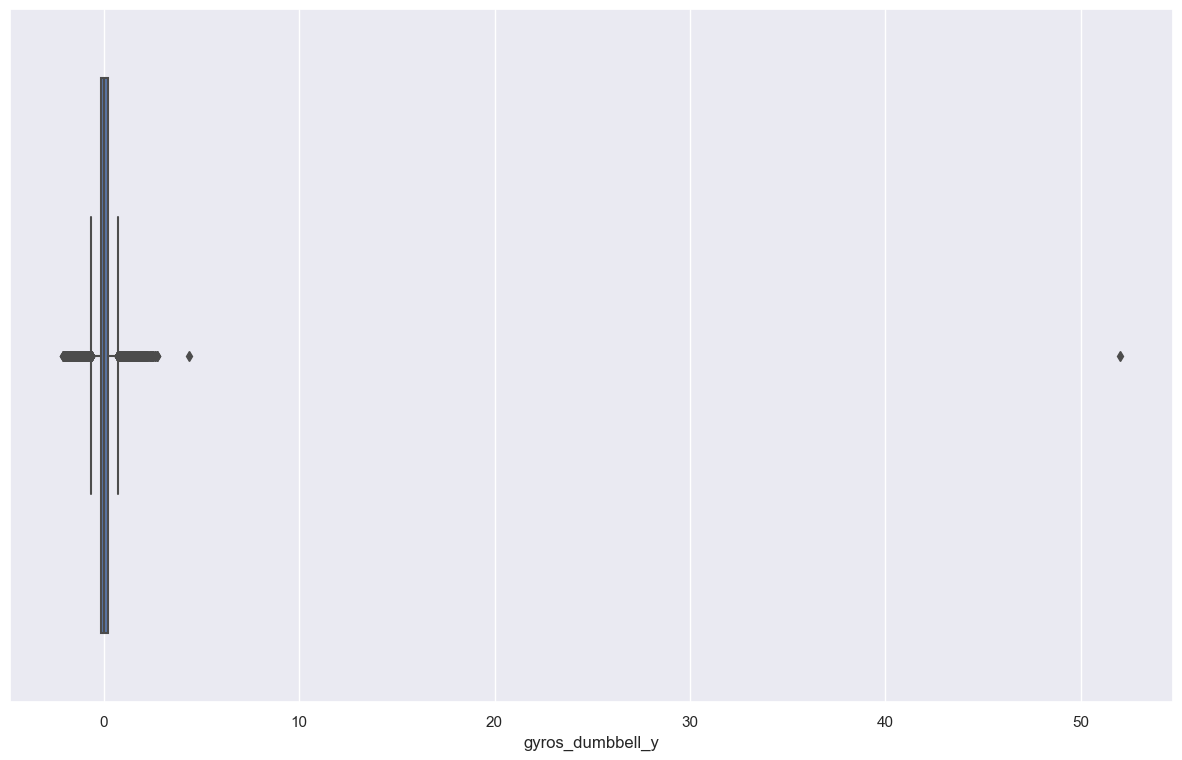

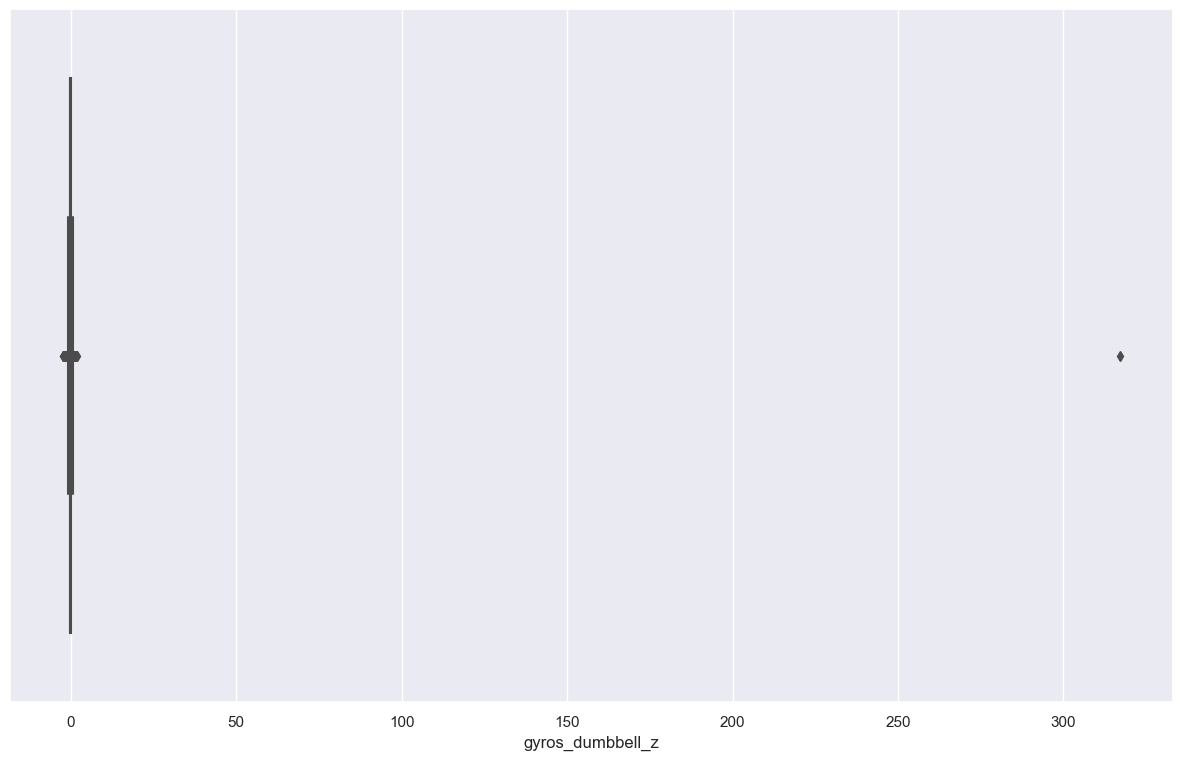

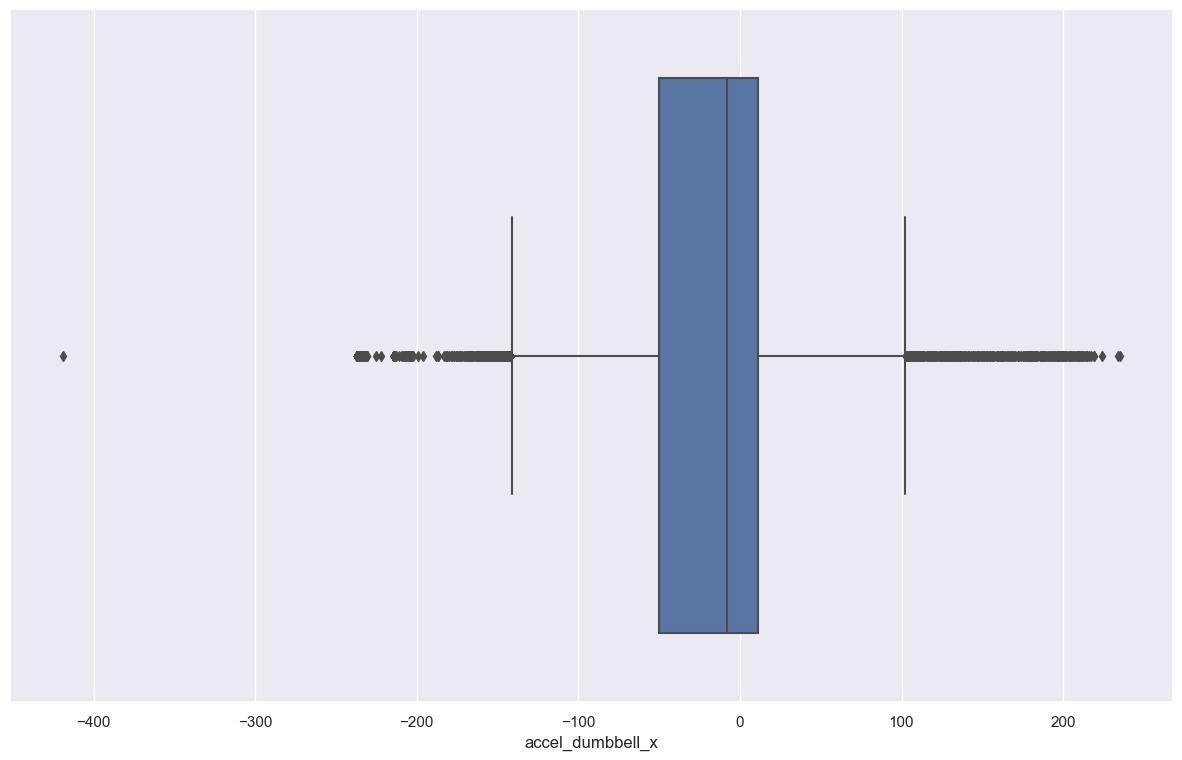

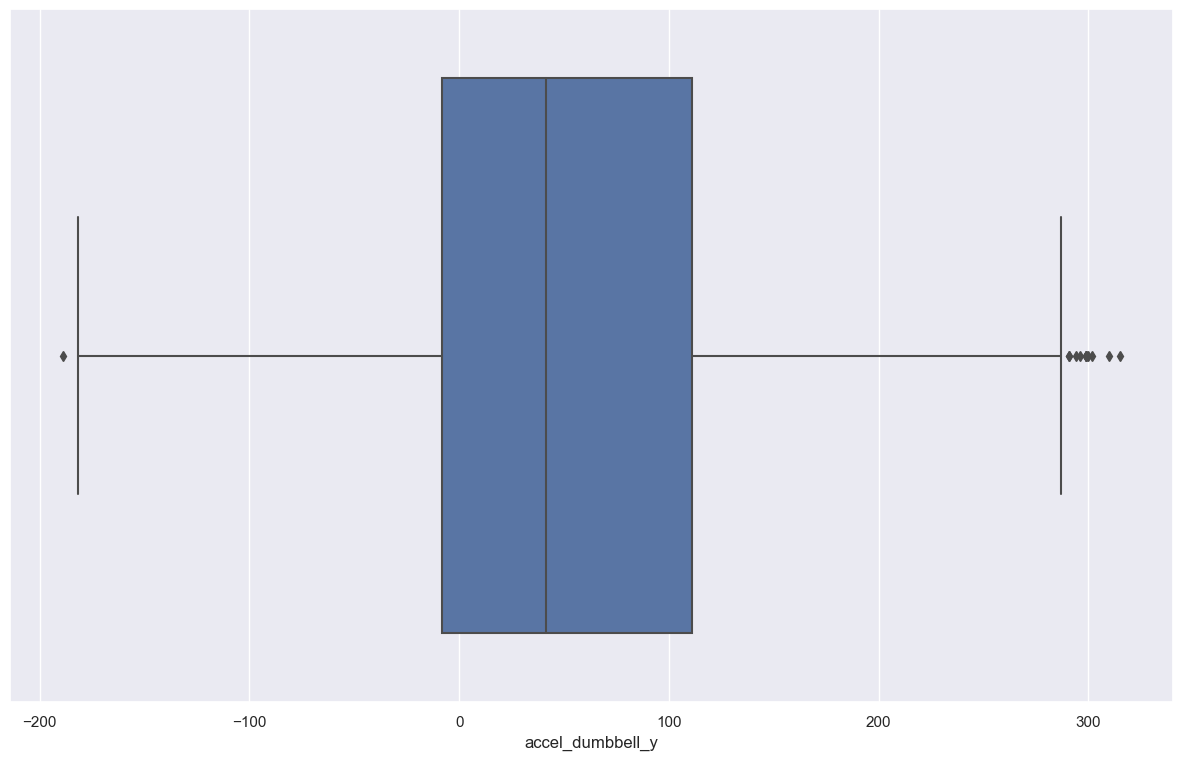

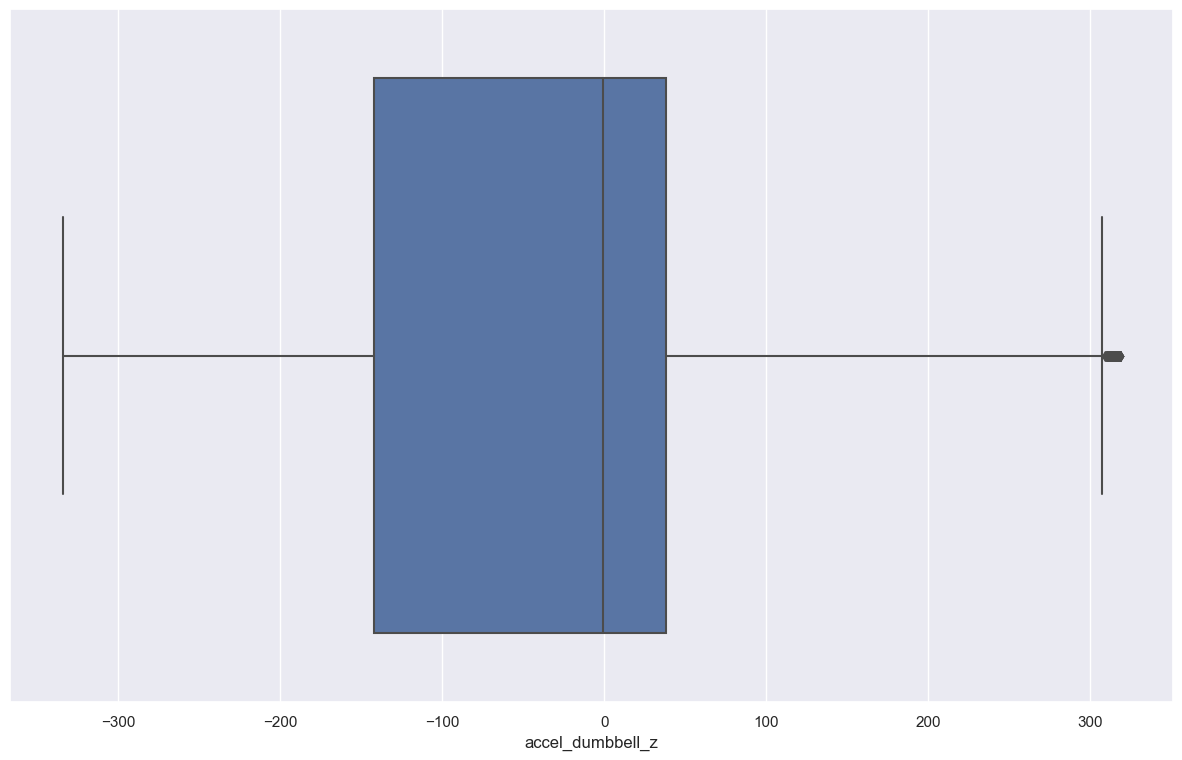

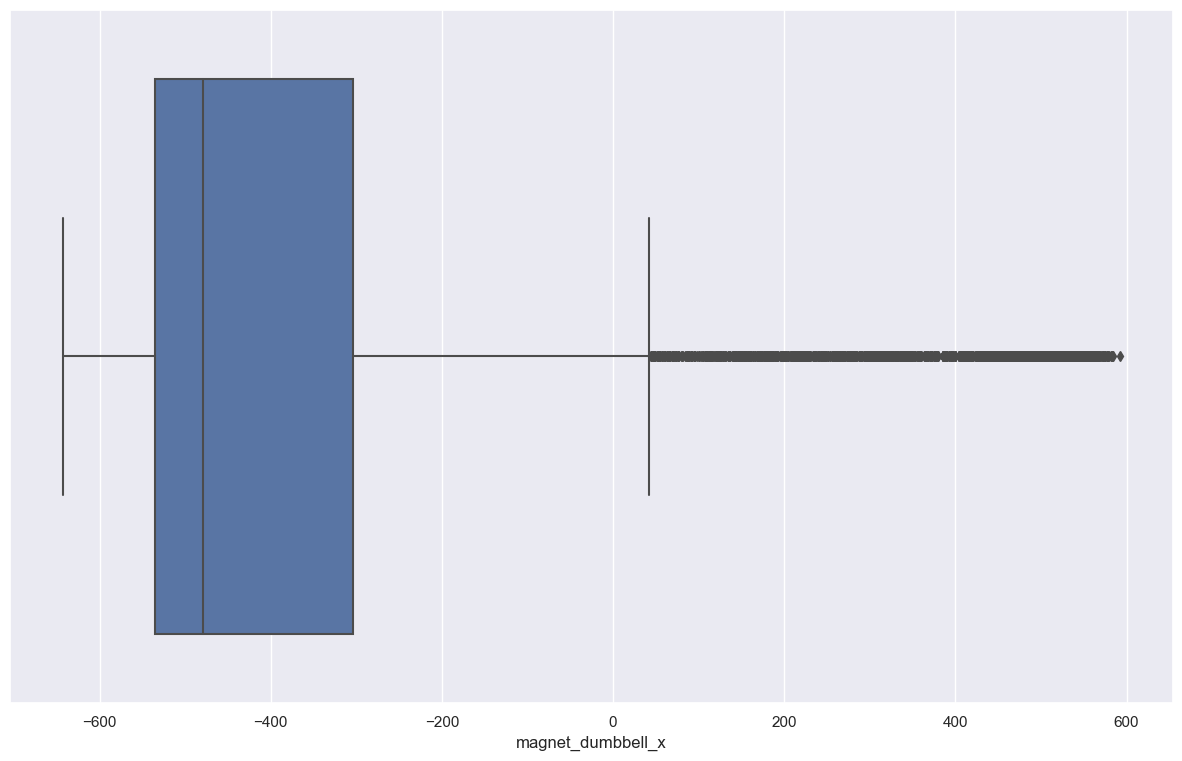

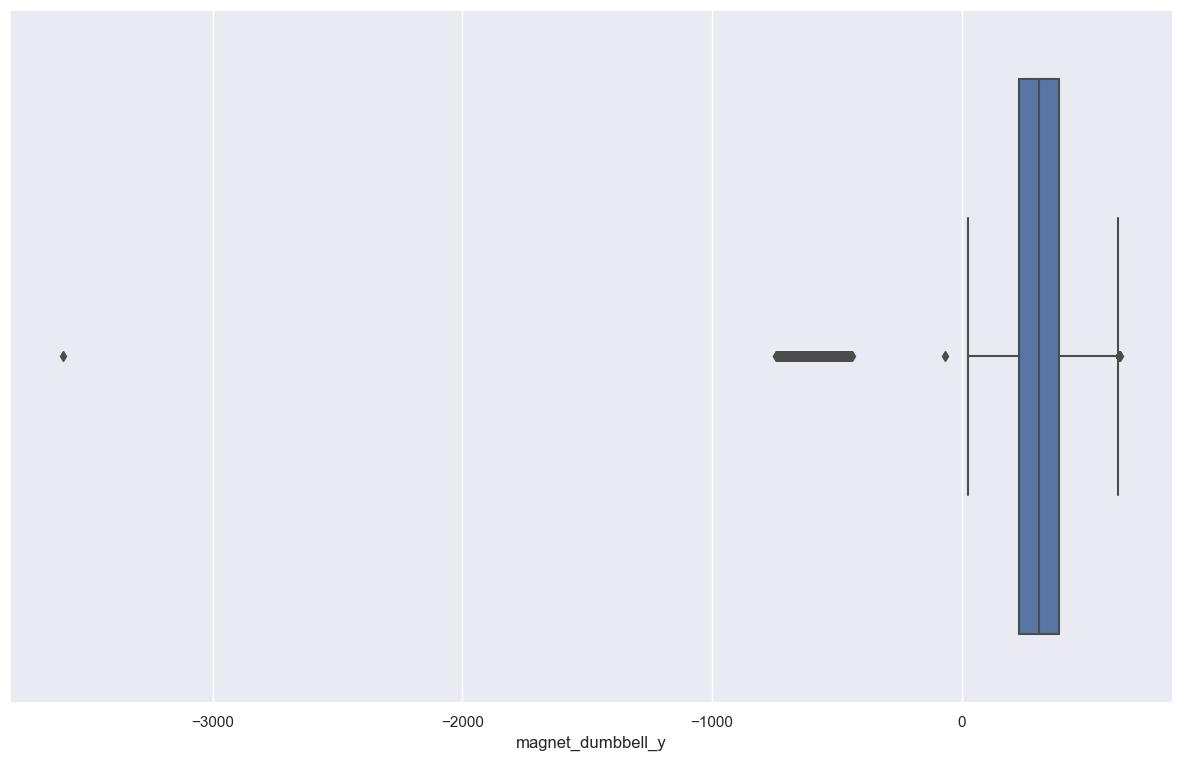

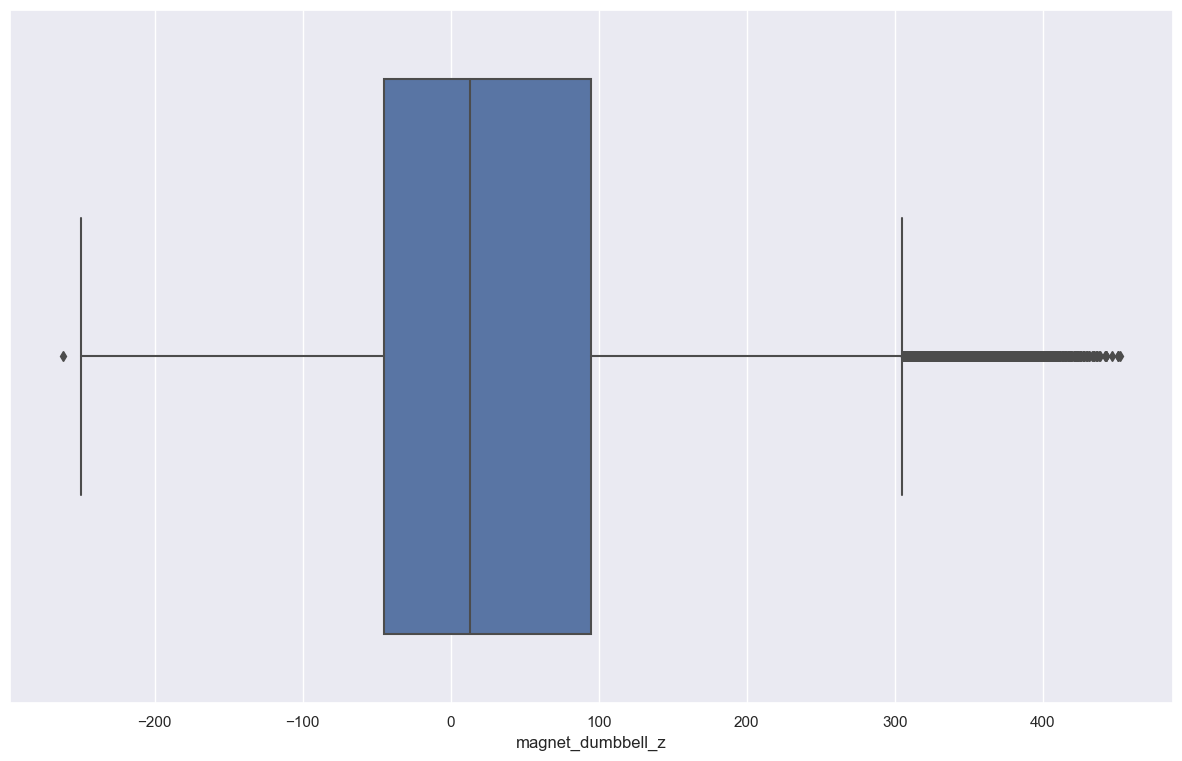

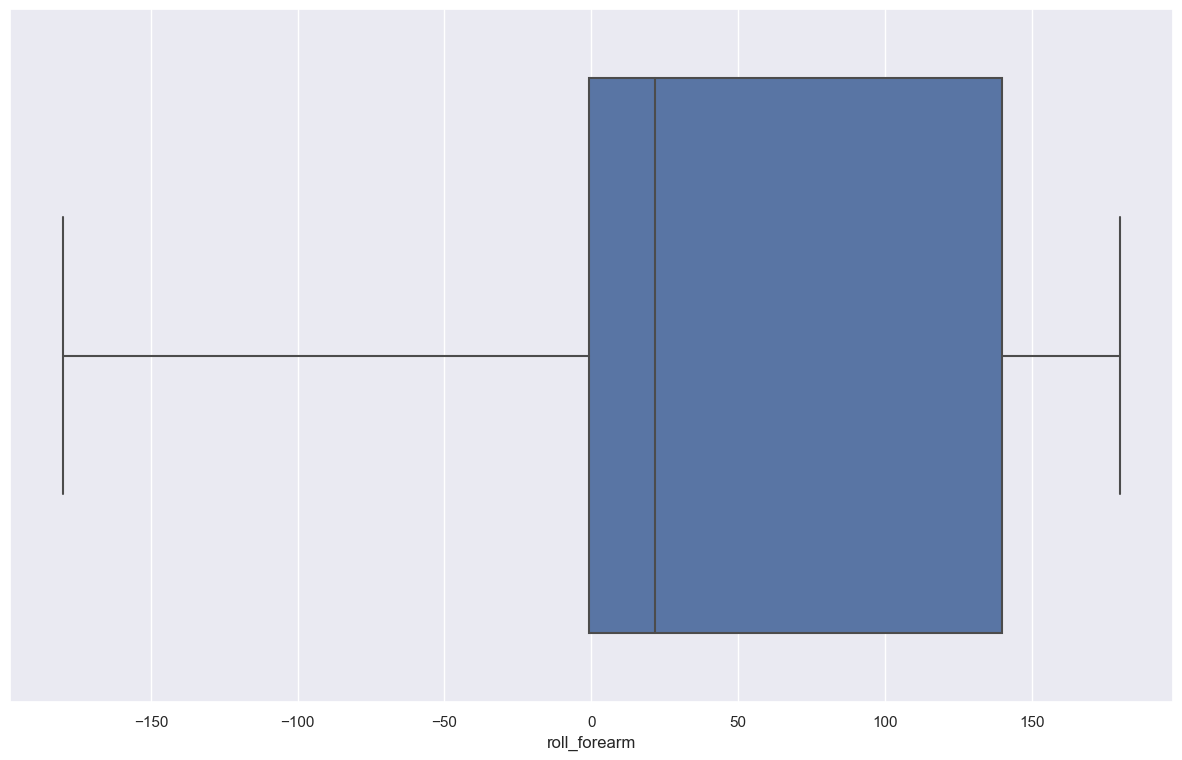

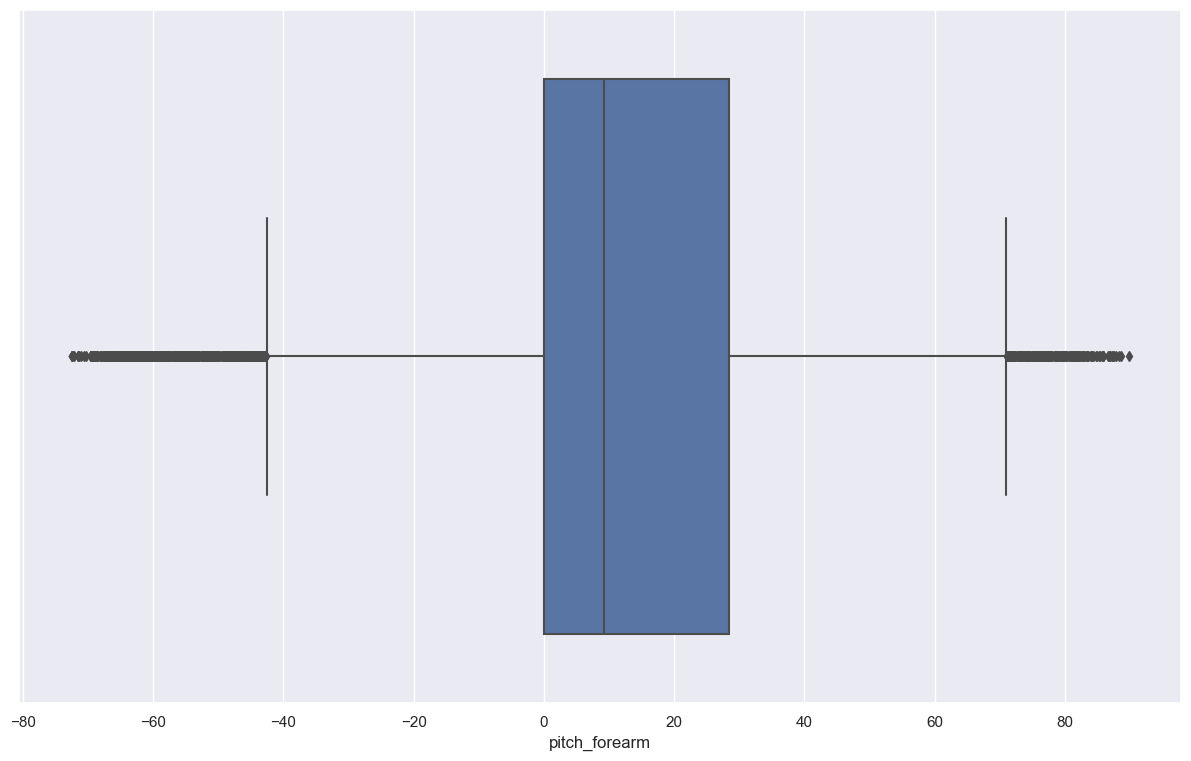

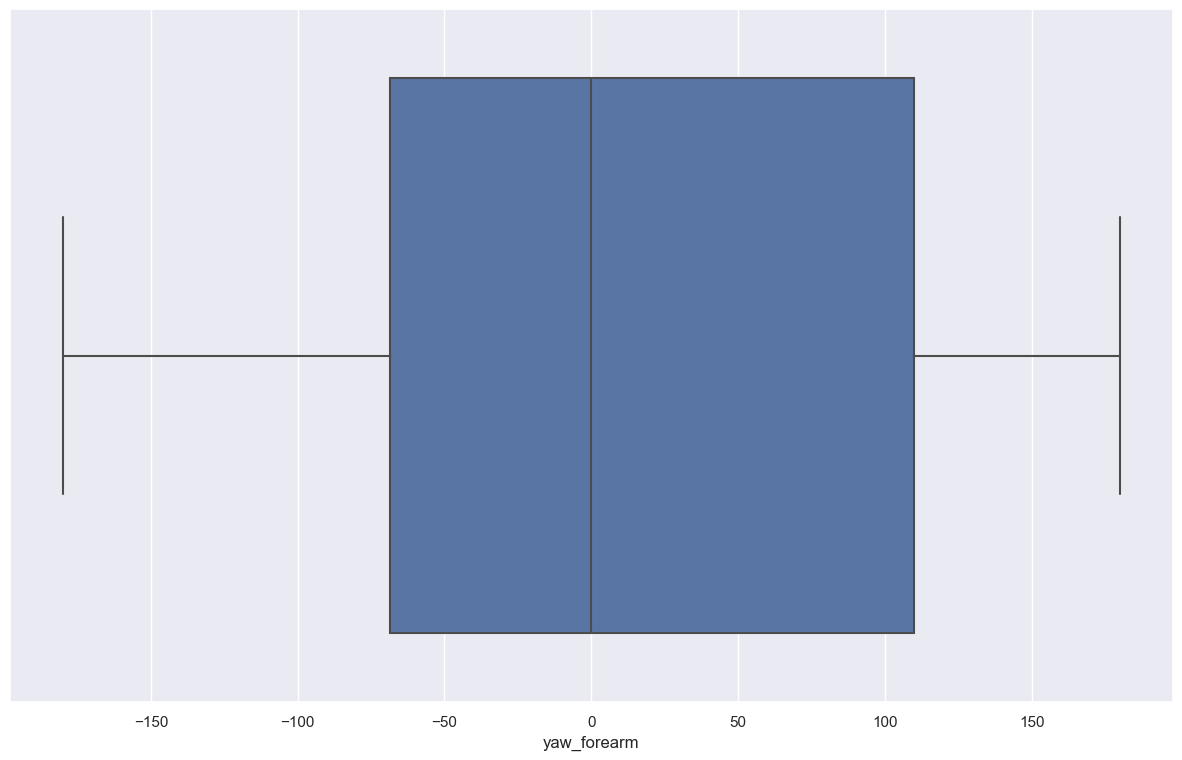

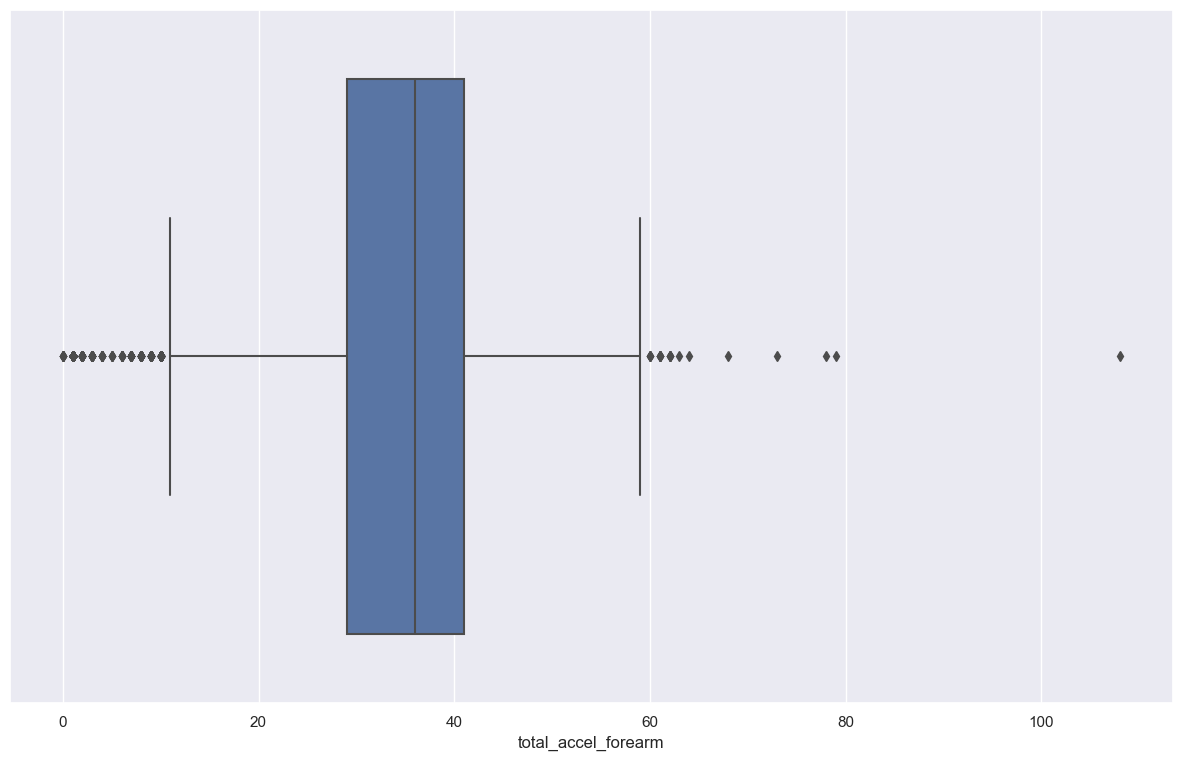

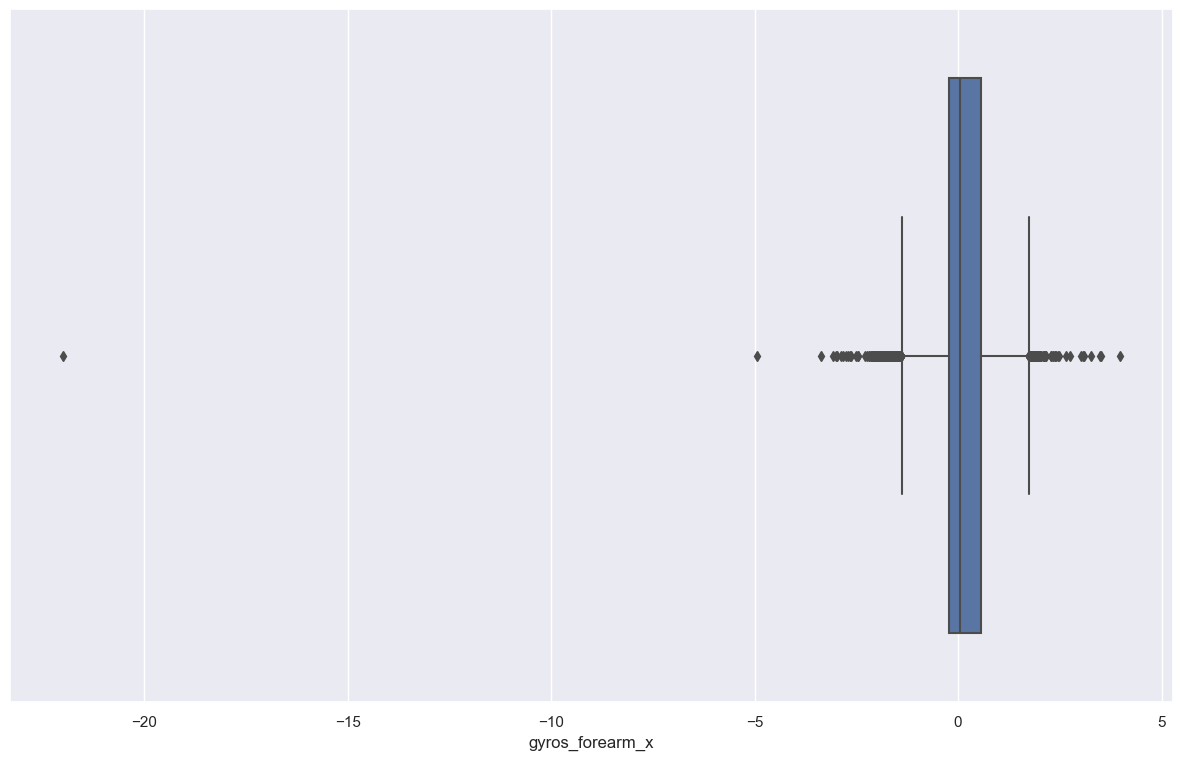

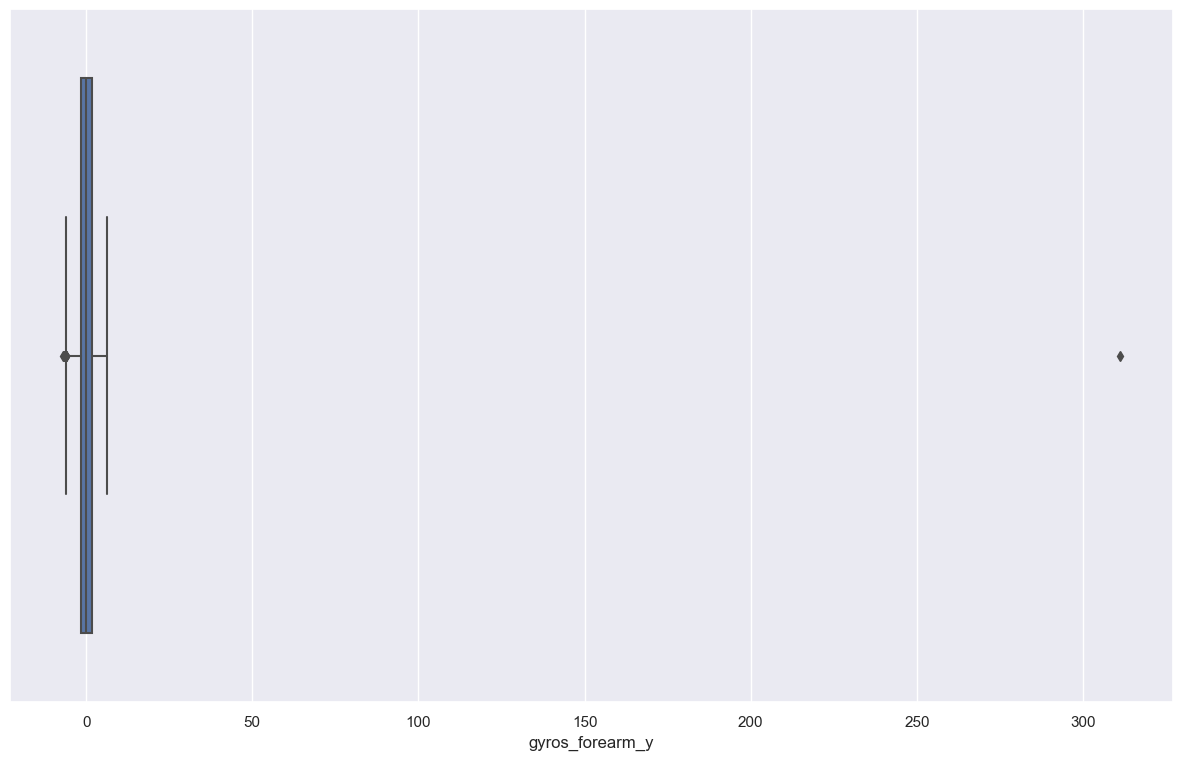

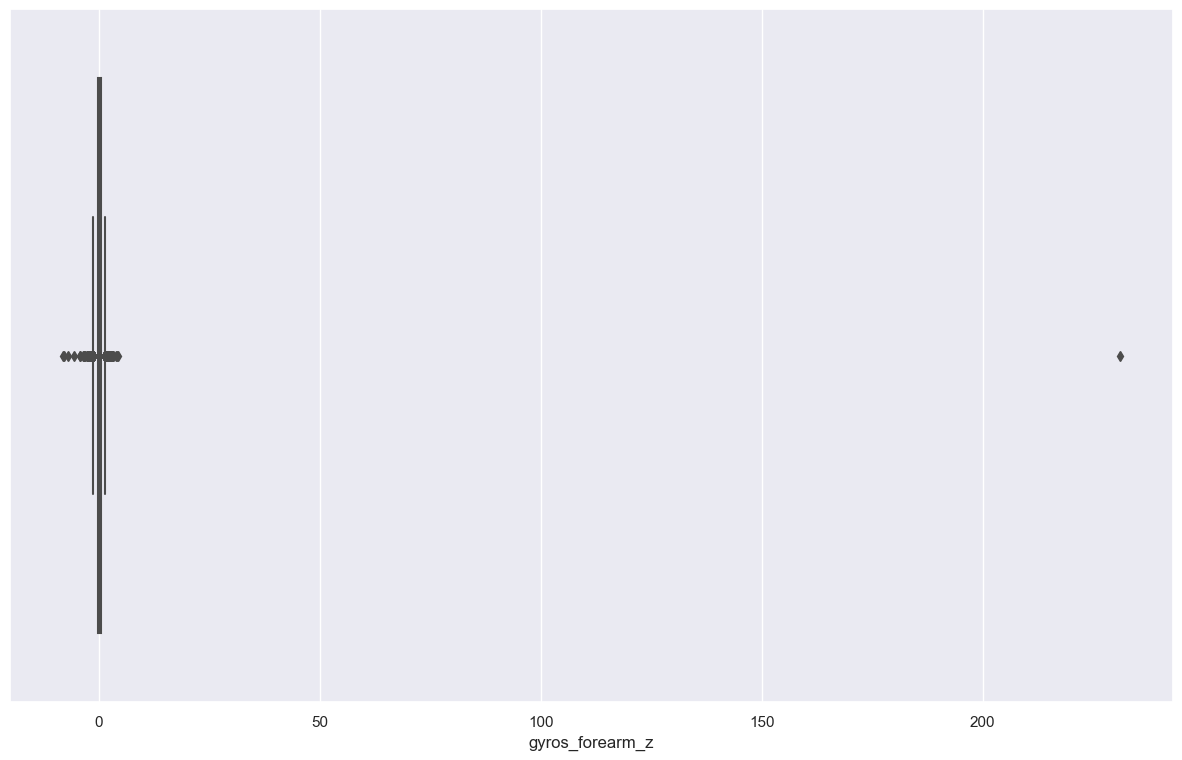

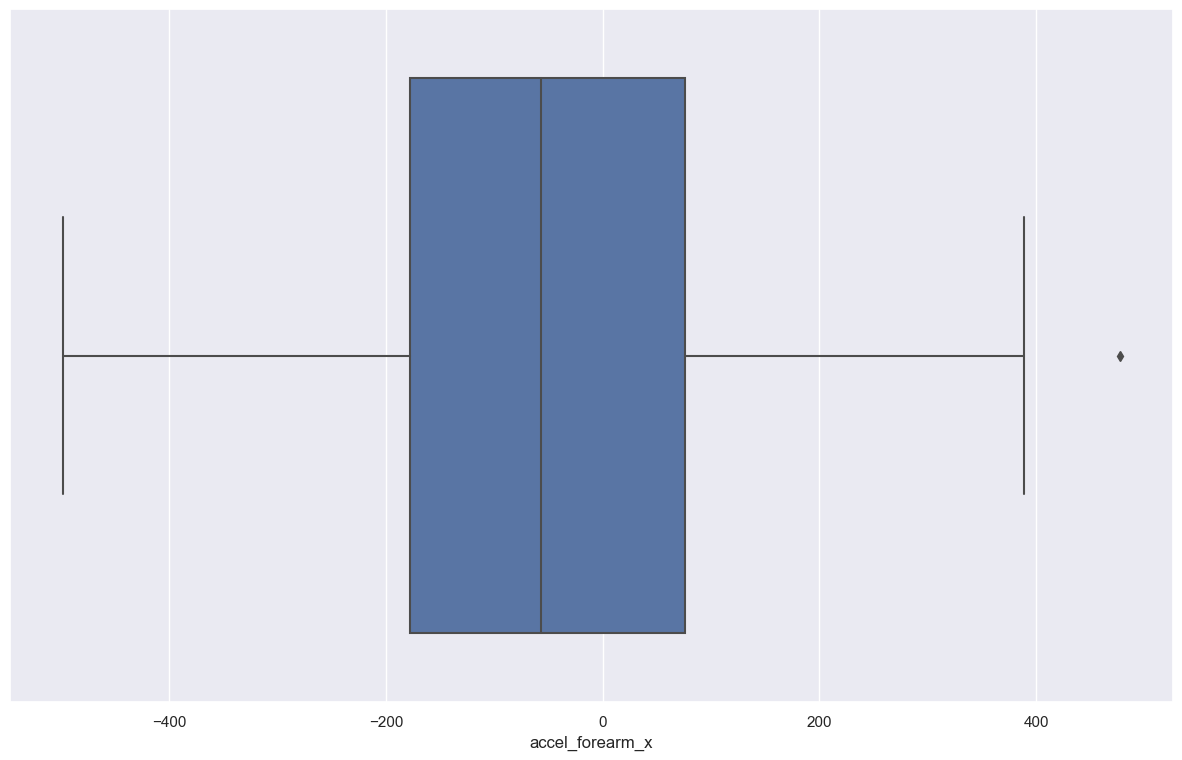

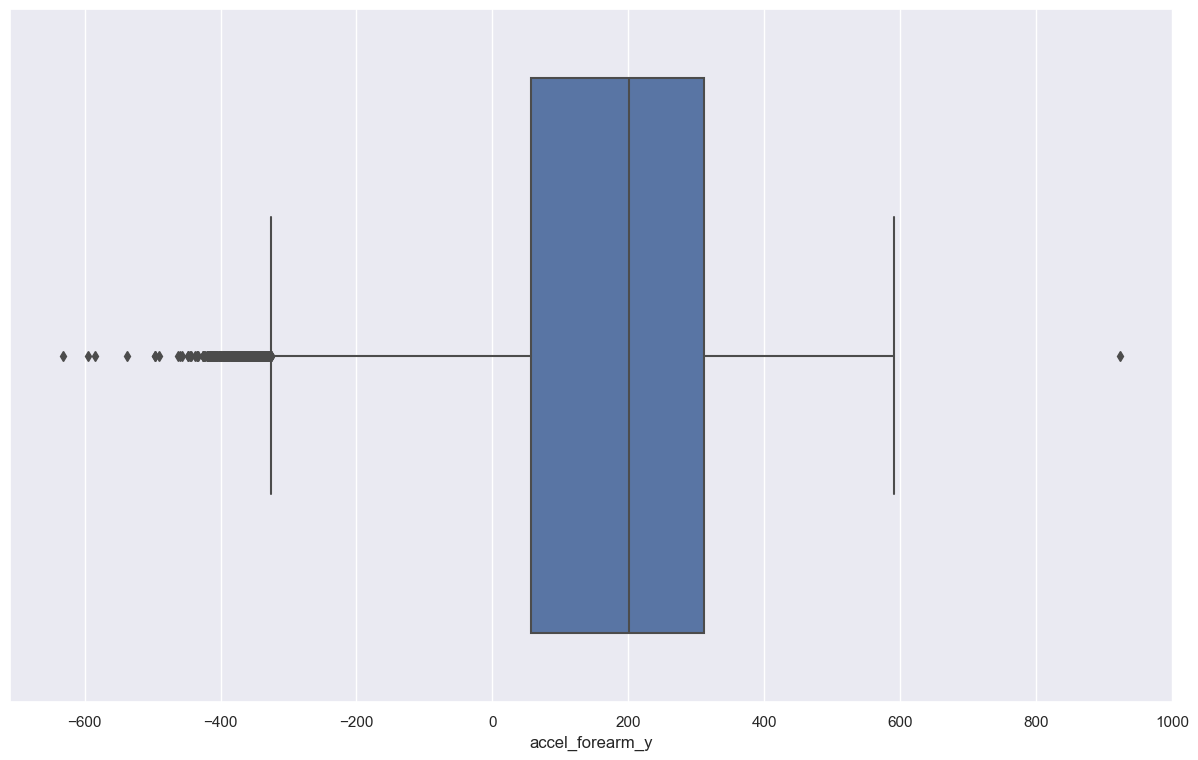

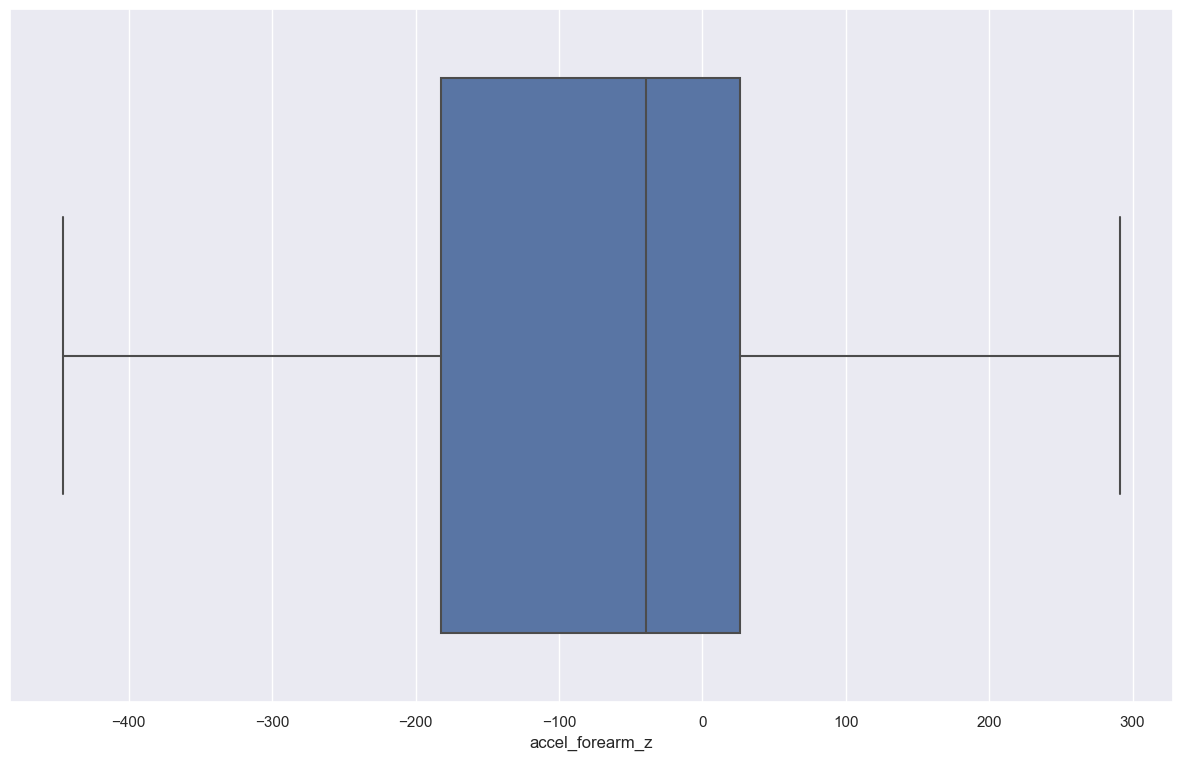

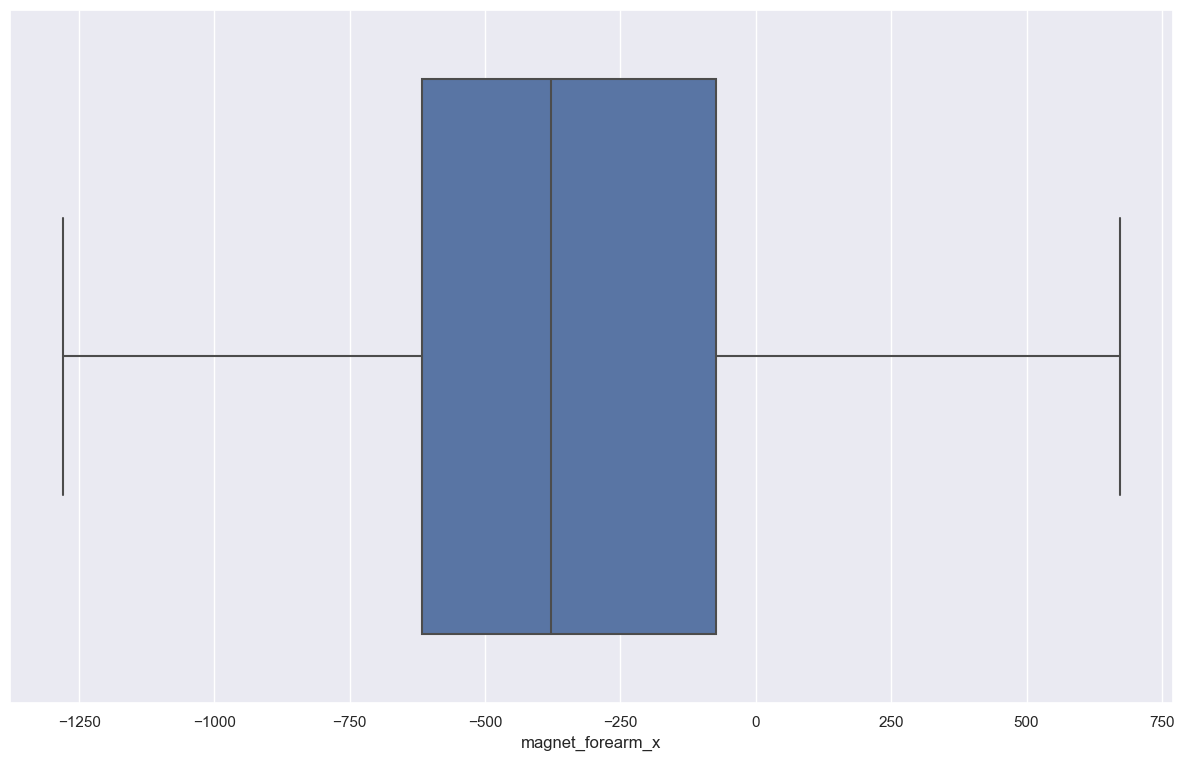

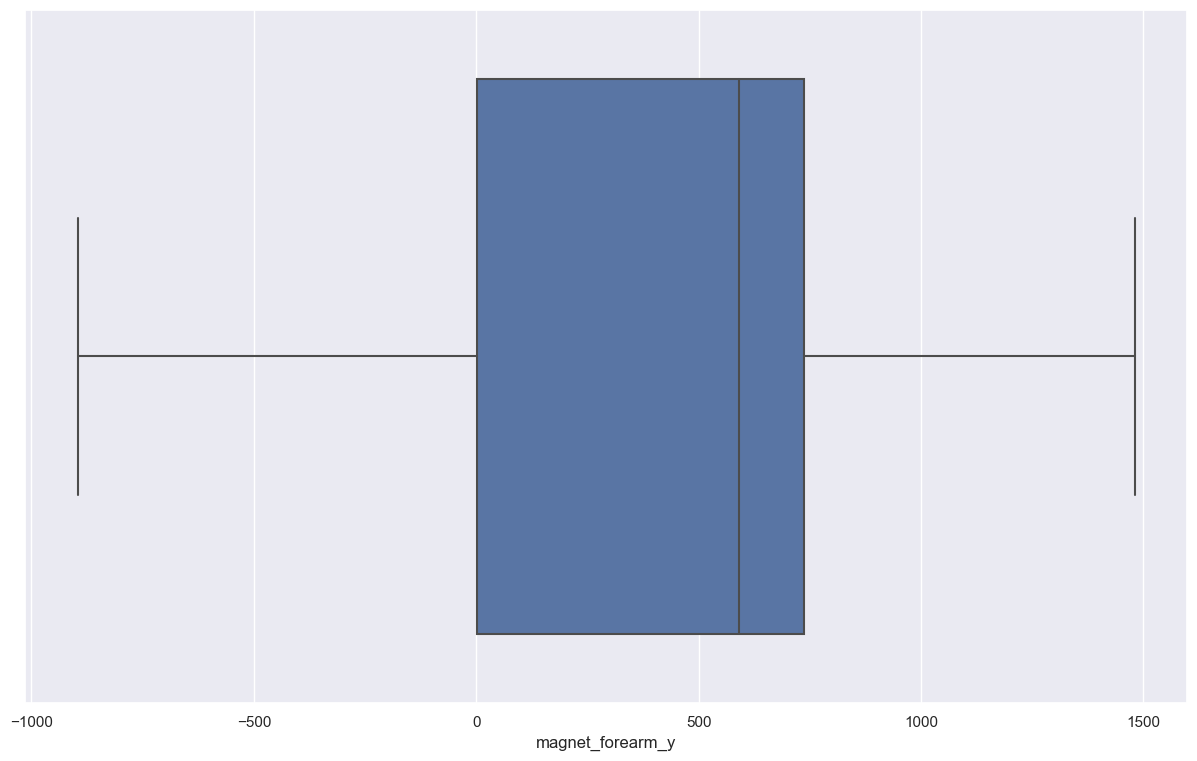

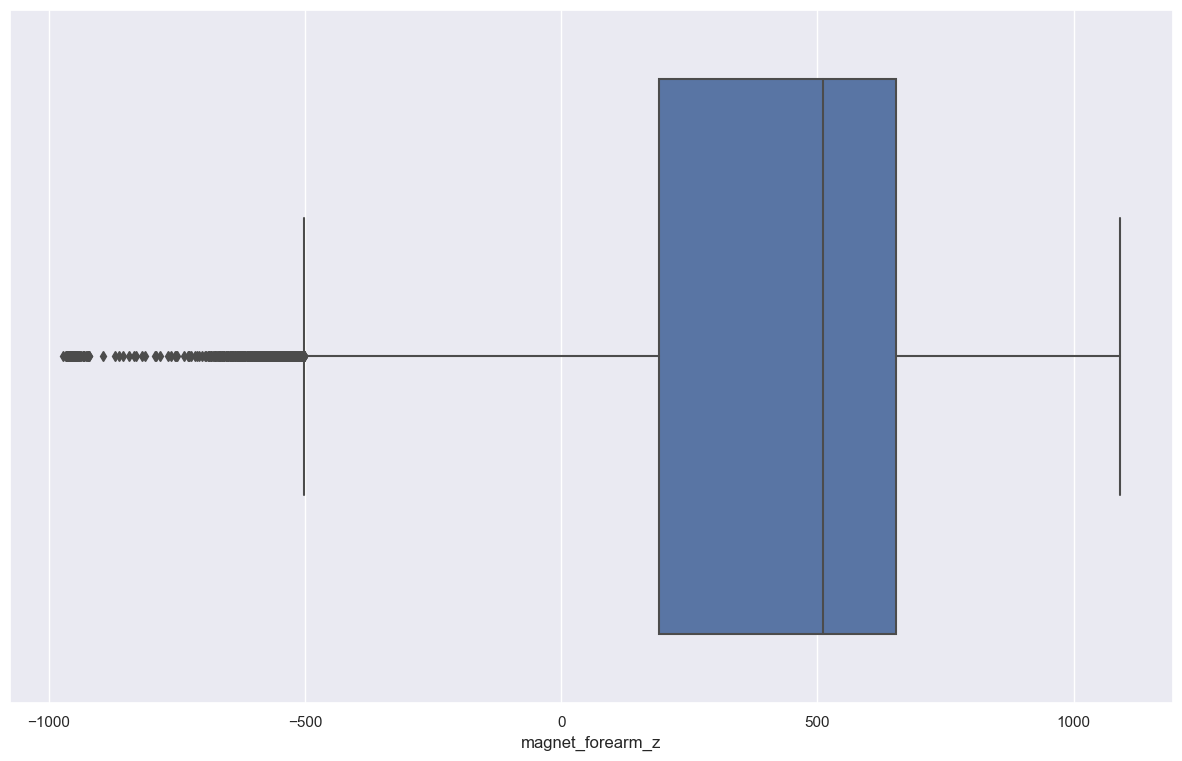

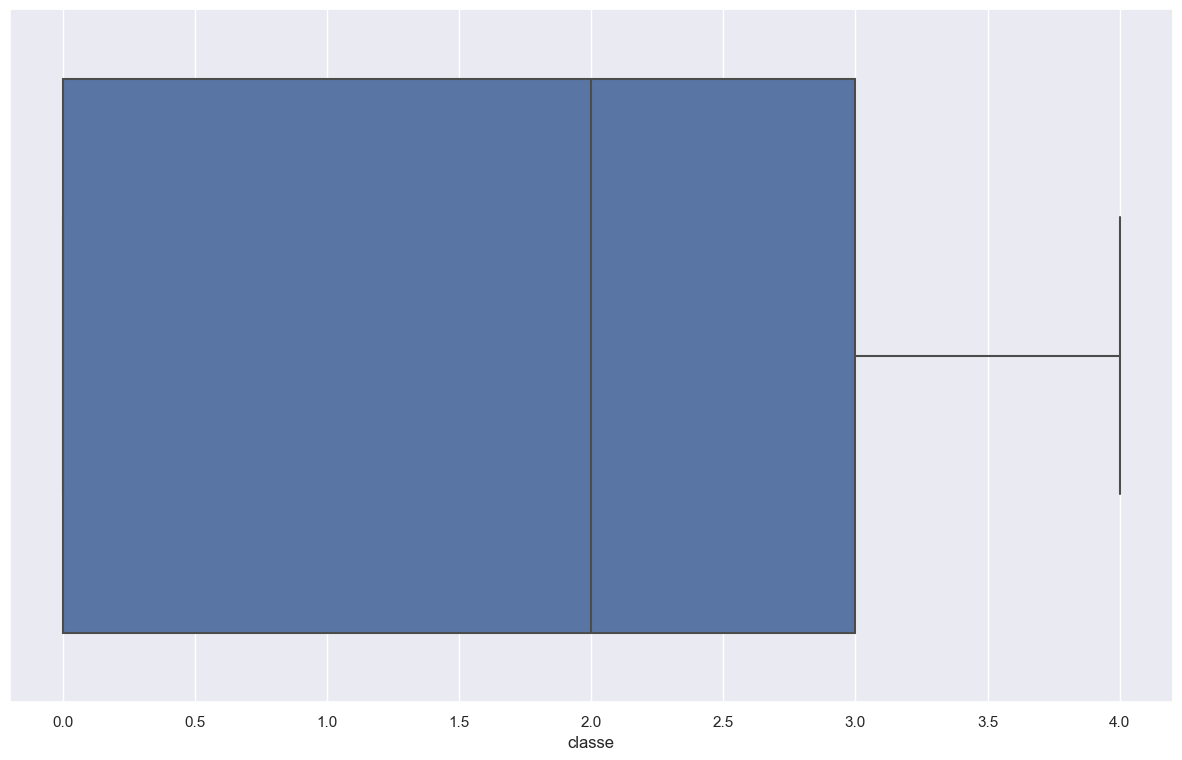

In [54]:
#Outlier detection
for i in df:
    sns.boxplot(x=df[i])
    plt.show()
       

In [55]:
#OUTLIERS WERE DETECTED IN:

#pitch_belt
#yaw_belt
#gyros_belt_x,gyros_belt_y,gyros_belt_z
#accel_belt_x,accel_belt_y
#magnet_belt_x,magnet_belt_y,magnet_belt_z,
#yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z
#accel_arm_z,magnet_arm_z,roll_dumbell,pitch_dumbbell,total_accel_dumbbell
#gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z
#accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z
#magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z
#pitch_forearm,total_accel_forearm
#gyros_forearm_x,gyros_forearm_y,gyros_forearm_z
#accel_forearm_x,accel_forearm_y,magnet_forearm_z

In [56]:
from scipy import stats
#pitch_belt
IQR=stats.iqr(df.pitch_belt,interpolation='midpoint')
IQR

13.14

In [57]:
Q1=df.pitch_belt.quantile(0.25)
Q3=df.pitch_belt.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-17.95, 34.61)

In [58]:
df.loc[df['pitch_belt']>max_limit,'pitch_belt']=np.median(df.pitch_belt)
df.loc[df['pitch_belt']<min_limit,'pitch_belt']=np.median(df.pitch_belt)

In [59]:
#yaw_belt
IQR=stats.iqr(df.yaw_belt,interpolation='midpoint')
IQR

101.2

In [60]:
Q1=df.yaw_belt.quantile(0.25)
Q3=df.yaw_belt.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-240.10000000000002, 164.70000000000002)

In [61]:
df.loc[df['yaw_belt']>max_limit,'yaw_belt']=np.median(df.pitch_belt)
df.loc[df['yaw_belt']<min_limit,'yaw_belt']=np.median(df.pitch_belt)

In [62]:
#gyros_belt_x
IQR=stats.iqr(df.gyros_belt_x,interpolation='midpoint')
IQR

0.14

In [63]:
Q1=df.gyros_belt_x.quantile(0.25)
Q3=df.gyros_belt_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.24000000000000002, 0.32)

In [64]:
df.loc[df['gyros_belt_x']<min_limit,'gyros_belt_x']=np.median(df.gyros_belt_x)
df.loc[df['gyros_belt_x']>max_limit,'gyros_belt_x']=np.median(df.gyros_belt_x)

In [65]:
#gyros_belt_y
IQR=stats.iqr(df.gyros_belt_y,interpolation='midpoint')
IQR

0.11

In [66]:
Q1=df.gyros_belt_y.quantile(0.25)
Q3=df.gyros_belt_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.165, 0.275)

In [67]:
df.loc[df['gyros_belt_y']<min_limit,'gyros_belt_y']=np.median(df.gyros_belt_y)
df.loc[df['gyros_belt_y']>max_limit,'gyros_belt_y']=np.median(df.gyros_belt_y)

In [68]:
#gyros_belt__z
IQR=stats.iqr(df.gyros_belt_z,interpolation='midpoint')
IQR

0.18000000000000002

In [69]:
Q1=df.gyros_belt_z.quantile(0.25)
Q3=df.gyros_belt_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.47000000000000003, 0.25)

In [70]:
df.loc[df['gyros_belt_z']<min_limit,'gyros_belt_z']=np.median(df.gyros_belt_z)
df.loc[df['gyros_belt_z']>max_limit,'gyros_belt_z']=np.median(df.gyros_belt_z)

In [71]:
#accel_belt_x
IQR=stats.iqr(df.accel_belt_x,interpolation='midpoint')
IQR

16.0

In [72]:
Q1=df.accel_belt_x.quantile(0.25)
Q3=df.accel_belt_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-45.0, 19.0)

In [73]:
df.loc[df['accel_belt_x']<min_limit,'accel_belt_x']=np.median(df.accel_belt_x)
df.loc[df['accel_belt_x']>max_limit,'accel_belt_x']=np.median(df.accel_belt_x)

In [74]:
#accel_belt_y
IQR=stats.iqr(df.accel_belt_y,interpolation='midpoint')
IQR

58.0

In [75]:
Q1=df.accel_belt_y.quantile(0.25)
Q3=df.accel_belt_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-84.0, 148.0)

In [76]:
df.loc[df['accel_belt_y']>max_limit,'accel_belt_y']=np.median(df.accel_belt_y)
df.loc[df['accel_belt_y']<min_limit,'accel_belt_y']=np.median(df.accel_belt_y)

In [77]:
#magnet_belt_x
IQR=stats.iqr(df.magnet_belt_x,interpolation='midpoint')
IQR

50.0

In [78]:
Q1=df.magnet_belt_x.quantile(0.25)
Q3=df.magnet_belt_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-66.0, 134.0)

In [79]:
df.loc[df['magnet_belt_x']>max_limit,'magnet_belt_x']=np.median(df.magnet_belt_x)
df.loc[df['magnet_belt_x']<min_limit,'magnet_belt_x']=np.median(df.magnet_belt_x)

In [80]:
#magnet belt y
IQR=stats.iqr(df.magnet_belt_y,interpolation='midpoint')
IQR

29.0

In [81]:
Q1=df.magnet_belt_y.quantile(0.25)
Q3=df.magnet_belt_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(537.5, 653.5)

In [82]:
df.loc[df['magnet_belt_y']<min_limit,'magnet_belt_y']=np.median(df.magnet_belt_y)
df.loc[df['magnet_belt_y']>max_limit,'magnet_belt_y']=np.median(df.magnet_belt_y)

In [83]:
#magnet_belt_z
IQR=stats.iqr(df.magnet_belt_z,interpolation='midpoint')
IQR

69.0

In [84]:
Q1=df.magnet_belt_z.quantile(0.25)
Q3=df.magnet_belt_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-478.5, -202.5)

In [85]:
df.loc[df['magnet_belt_z']<min_limit,'magnet_belt_z']=np.median(df.magnet_belt_z)
df.loc[df['magnet_belt_z']>max_limit,'magnet_belt_z']=np.median(df.magnet_belt_z)

In [86]:
# yaw_arm
IQR=stats.iqr(df.yaw_arm,interpolation='midpoint')
IQR

88.94999999999999

In [87]:
Q1=df.yaw_arm.quantile(0.25)
Q3=df.yaw_arm.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-176.52499999999998, 179.29999999999998)

In [88]:
df.loc[df['yaw_arm']<min_limit,'yaw_arm']=np.median(df.yaw_arm)
df.loc[df['yaw_arm']>max_limit,'yaw_arm']=np.median(df.yaw_arm)

In [89]:
#total_accel_arm
IQR=stats.iqr(df.total_accel_arm,interpolation='midpoint')
IQR

16.0

In [90]:
Q1=df.total_accel_arm.quantile(0.25)
Q3=df.total_accel_arm.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-7.0, 57.0)

In [91]:
df.loc[df['total_accel_arm']>max_limit,'total_accel_arm']=np.median(df.total_accel_arm)
df.loc[df['total_accel_arm']<min_limit,'total_accel_arm']=np.median(df.total_accel_arm)

In [92]:
#gyros_arm_x
IQR=stats.iqr(df.gyros_arm_x,interpolation='midpoint')
IQR


2.9000000000000004

In [93]:
Q1=df.gyros_arm_x.quantile(0.25)
Q3=df.gyros_arm_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-5.680000000000001, 5.920000000000001)

In [94]:
df.loc[df['gyros_arm_x']<min_limit,'gyros_arm_x']=np.median(df.gyros_arm_x)
df.loc[df['gyros_arm_x']>max_limit,'gyros_arm_x']=np.median(df.gyros_arm_x)

In [95]:
#gyros_arm_y
IQR=stats.iqr(df.gyros_arm_y,interpolation='midpoint')
IQR

0.9400000000000001

In [96]:
Q1=df.gyros_arm_y.quantile(0.25)
Q3=df.gyros_arm_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-2.21, 1.5500000000000003)

In [97]:
df.loc[df['gyros_arm_y']<min_limit,'gyros_arm_y']=np.median(df.gyros_arm_y)
df.loc[df['gyros_arm_y']>max_limit,'gyros_arm_y']=np.median(df.gyros_arm_y)

In [98]:
#gyros_arm_z
IQR=stats.iqr(df.gyros_arm_z,interpolation='midpoint')
IQR

0.79

In [99]:
Q1=df.gyros_arm_z.quantile(0.25)
Q3=df.gyros_arm_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.2550000000000001, 1.905)

In [100]:
df.loc[df['gyros_arm_z']<min_limit,'gyros_arm_z']=np.median(df.gyros_arm_z)
df.loc[df['gyros_arm_z']>max_limit,'gyros_arm_z']=np.median(df.gyros_arm_z)

In [101]:
#accel_arm_z
IQR=stats.iqr(df.accel_arm_z,interpolation='midpoint')
IQR

166.0

In [102]:
Q1=df.accel_arm_z.quantile(0.25)
Q3=df.accel_arm_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-392.0, 272.0)

In [103]:
df.loc[df['accel_arm_z']<min_limit,'accel_arm_z']=np.median(df.accel_arm_z)
df.loc[df['accel_arm_z']>max_limit,'accel_arm_z']=np.median(df.accel_arm_z)

In [104]:
#magnet_arm_z
#roll_dumbell
#pitch_dumbbell
#total_accel_dumbbell
#gyros_dumbbell_x
#gyros_dumbbell_y
#gyros_dumbbell_z
#accel_dumbbell_x
#accel_dumbbell_y
#accel_dumbbell_z
#magnet_dumbbell_x
#magnet_dumbbell_y
#magnet_dumbbell_z
#pitch_forearm
#total_accel_forearm
#gyros_forearm_x
#gyros_forearm_y
#gyros_forearm_z
#accel_forearm_x
#accel_forearm_y
#magnet_forearm_z has to remove outliers from these

In [105]:
#magnet_arm_z
IQR=stats.iqr(df.magnet_arm_z,interpolation='midpoint')
IQR

413.5

In [106]:
Q1=df.magnet_arm_z.quantile(0.25)
Q3=df.magnet_arm_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-489.0, 1165.25)

In [107]:
df.loc[df['magnet_arm_z']<min_limit,'magnet_arm_z']=np.median(df.magnet_arm_z)
df.loc[df['magnet_arm_z']>max_limit,'magnet_arm_z']=np.median(df.magnet_arm_z)

In [108]:
#roll_dumbbell
IQR=stats.iqr(df.roll_dumbbell,interpolation='midpoint')
IQR

86.09698384

In [109]:
Q1=df.roll_dumbbell.quantile(0.25)
Q3=df.roll_dumbbell.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-147.6388995525, 196.75948507749996)

In [110]:
df.loc[df['roll_dumbbell']<min_limit,'roll_dumbbell']=np.median(df.roll_dumbbell)
df.loc[df['roll_dumbbell']>max_limit,'roll_dumbbell']=np.median(df.roll_dumbbell)

In [111]:
#pitch_dumbbell
IQR=stats.iqr(df.pitch_dumbbell,interpolation='midpoint')
IQR

58.381436414999996

In [112]:
Q1=df.pitch_dumbbell.quantile(0.25)
Q3=df.pitch_dumbbell.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-128.4590381375, 105.07138076499999)

In [113]:
df.loc[df['pitch_dumbbell']<min_limit,'pitch_dumbbell']=np.median(df.pitch_dumbbell)
df.loc[df['pitch_dumbbell']>max_limit,'pitch_dumbbell']=np.median(df.pitch_dumbbell)

In [114]:
#total_accel_dumbbell
IQR=stats.iqr(df.total_accel_dumbbell,interpolation='midpoint')
IQR

15.0

In [115]:
Q1=df.total_accel_dumbbell.quantile(0.25)
Q3=df.total_accel_dumbbell.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-18.5, 41.5)

In [116]:
df.loc[df['total_accel_dumbbell']>max_limit,'total_accel_dumbbell']=np.median(df.total_accel_dumbbell)
df.loc[df['total_accel_dumbbell']<min_limit,'total_accel_dumbbell']=np.median(df.total_accel_dumbbell)

In [117]:
#gyros_dumbbell_x
IQR=stats.iqr(df.gyros_dumbbell_x,interpolation='midpoint')
IQR

0.38

In [118]:
Q1=df.gyros_dumbbell_x.quantile(0.25)
Q3=df.gyros_dumbbell_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.6000000000000001, 0.92)

In [119]:
df.loc[df['gyros_dumbbell_x']<min_limit,'gyros_dumbbell_x']=np.median(df.gyros_dumbbell_x)
df.loc[df['gyros_dumbbell_x']>max_limit,'gyros_dumbbell_x']=np.median(df.gyros_dumbbell_x)

In [120]:
#gyros_dumbbell_y
IQR=stats.iqr(df.gyros_dumbbell_y,interpolation='midpoint')
IQR

0.35

In [121]:
Q1=df.gyros_dumbbell_y.quantile(0.25)
Q3=df.gyros_dumbbell_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.6649999999999999, 0.7349999999999999)

In [122]:
df.loc[df['gyros_dumbbell_y']<min_limit,'gyros_dumbbell_y']=np.median(df.gyros_dumbbell_y)
df.loc[df['gyros_dumbbell_y']>max_limit,'gyros_dumbbell_y']=np.median(df.gyros_dumbbell_y)

In [123]:
#gyros_dumbbell_z
IQR=stats.iqr(df.gyros_dumbbell_z,interpolation='midpoint')
IQR

0.33999999999999997

In [124]:
Q1=df.gyros_dumbbell_z.quantile(0.25)
Q3=df.gyros_dumbbell_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.8200000000000001, 0.54)

In [125]:
df.loc[df['gyros_dumbbell_z']<min_limit,'gyros_dumbbell_z']=np.median(df.gyros_dumbbell_z)
df.loc[df['gyros_dumbbell_z']>max_limit,'gyros_dumbbell_z']=np.median(df.gyros_dumbbell_z)

In [126]:
#accel_dumbbell_x
IQR=stats.iqr(df.accel_dumbbell_x,interpolation='midpoint')
IQR

61.0

In [127]:
Q1=df.accel_dumbbell_x.quantile(0.25)
Q3=df.accel_dumbbell_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-141.5, 102.5)

In [128]:
df.loc[df['accel_dumbbell_x']<min_limit,'accel_dumbbell_x']=np.median(df.accel_dumbbell_x)
df.loc[df['accel_dumbbell_x']>max_limit,'accel_dumbbell_x']=np.median(df.accel_dumbbell_x)

In [129]:
#accel_dumbbell_y
IQR=stats.iqr(df.accel_dumbbell_y,interpolation='midpoint')
IQR

119.0

In [130]:
Q1=df.accel_dumbbell_y.quantile(0.25)
Q3=df.accel_dumbbell_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-186.5, 289.5)

In [131]:
df.loc[df['accel_dumbbell_y']<min_limit,'accel_dumbbell_y']=np.median(df.accel_dumbbell_y)
df.loc[df['accel_dumbbell_y']>max_limit,'accel_dumbbell_y']=np.median(df.accel_dumbbell_y)

In [132]:
#accel_dumbbell_z
IQR=stats.iqr(df.accel_dumbbell_z,interpolation='midpoint')
IQR

180.0

In [133]:
Q1=df.accel_dumbbell_z.quantile(0.25)
Q3=df.accel_dumbbell_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-412.0, 308.0)

In [134]:
df.loc[df['accel_dumbbell_z']>max_limit,'accel_dumbbell_z']=np.median(df.accel_dumbbell_z)
df.loc[df['accel_dumbbell_z']<min_limit,'accel_dumbbell_z']=np.median(df.accel_dumbbell_z)

In [135]:
#magnet_dumbbell_x
IQR=stats.iqr(df.magnet_dumbbell_x,interpolation='midpoint')
IQR

231.0

In [136]:
Q1=df.magnet_dumbbell_x.quantile(0.25)
Q3=df.magnet_dumbbell_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-881.5, 42.5)

In [137]:
df.loc[df['magnet_dumbbell_x']>max_limit,'magnet_dumbbell_x']=np.median(df.magnet_dumbbell_x)
df.loc[df['magnet_dumbbell_x']<min_limit,'magnet_dumbbell_x']=np.median(df.magnet_dumbbell_x)

In [138]:
#magnet_dumbbell_y
IQR=stats.iqr(df.magnet_dumbbell_y,interpolation='midpoint')
IQR

159.0

In [139]:
Q1=df.magnet_dumbbell_y.quantile(0.25)
Q3=df.magnet_dumbbell_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-7.5, 628.5)

In [140]:
df.loc[df['magnet_dumbbell_y']>max_limit,'magnet_dumbbell_y']=np.median(df.magnet_dumbbell_y)
df.loc[df['magnet_dumbbell_y']<min_limit,'magnet_dumbbell_y']=np.median(df.magnet_dumbbell_y)

In [141]:
#magnet_dumbbell_z
IQR=stats.iqr(df.magnet_dumbbell_z,interpolation='midpoint')
IQR

140.0

In [142]:
df.loc[df['magnet_dumbbell_z']>max_limit,'magnet_dumbbell_z']=np.median(df.magnet_dumbbell_z)
df.loc[df['magnet_dumbbell_z']<min_limit,'magnet_dumbbell_z']=np.median(df.magnet_dumbbell_z)

In [143]:
#pitch_forearm
IQR=stats.iqr(df.pitch_forearm,interpolation='midpoint')
IQR

28.4

In [144]:
Q1=df.pitch_forearm.quantile(0.25)
Q3=df.pitch_forearm.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-42.599999999999994, 71.0)

In [145]:
df.loc[df['pitch_forearm']>max_limit,'pitch_forearm']=np.median(df.pitch_forearm)
df.loc[df['pitch_forearm']<min_limit,'pitch_forearm']=np.median(df.pitch_forearm)

In [146]:
#total_accel_forearm
IQR=stats.iqr(df.total_accel_forearm,interpolation='midpoint')
IQR

12.0

In [147]:
Q1=df.total_accel_forearm.quantile(0.25)
Q3=df.total_accel_forearm.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(11.0, 59.0)

In [148]:
df.loc[df['total_accel_forearm']>max_limit,'total_accel_forearm']=np.median(df.total_accel_forearm)
df.loc[df['total_accel_forearm']<min_limit,'total_accel_forearm']=np.median(df.total_accel_forearm)

In [149]:
#gyros_forearm_x
IQR=stats.iqr(df.gyros_forearm_x,interpolation='midpoint')
IQR

0.78

In [150]:
Q1=df.gyros_forearm_x.quantile(0.25)
Q3=df.gyros_forearm_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.39, 1.73)

In [151]:
df.loc[df['gyros_forearm_x']>max_limit,'gyros_forearm_x']=np.median(df.gyros_forearm_x)
df.loc[df['gyros_forearm_x']<min_limit,'gyros_forearm_x']=np.median(df.gyros_forearm_x)

In [152]:
#gyros_forearm_y
IQR=stats.iqr(df.gyros_forearm_y,interpolation='midpoint')
IQR

3.08

In [153]:
Q1=df.gyros_forearm_y.quantile(0.25)
Q3=df.gyros_forearm_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-6.08, 6.24)

In [154]:
df.loc[df['gyros_forearm_y']>max_limit,'gyros_forearm_y']=np.median(df.gyros_forearm_y)
df.loc[df['gyros_forearm_y']<min_limit,'gyros_forearm_y']=np.median(df.gyros_forearm_y)

In [155]:
#gyros_forearm_z
IQR=stats.iqr(df.gyros_forearm_z,interpolation='midpoint')
IQR

0.6699999999999999

In [156]:
Q1=df.gyros_forearm_z.quantile(0.25)
Q3=df.gyros_forearm_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.1849999999999998, 1.4949999999999999)

In [157]:
df.loc[df['gyros_forearm_z']>max_limit,'gyros_forearm_z']=np.median(df.gyros_forearm_z)
df.loc[df['gyros_forearm_z']<min_limit,'gyros_forearm_z']=np.median(df.gyros_forearm_z)

In [158]:
#accel_forearm_x
IQR=stats.iqr(df.accel_forearm_x,interpolation='midpoint')
IQR

254.0

In [159]:
Q1=df.accel_forearm_x.quantile(0.25)
Q3=df.accel_forearm_x.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-559.0, 457.0)

In [160]:
df.loc[df['accel_forearm_x']>max_limit,'accel_forearm_x']=np.median(df.accel_forearm_x)
df.loc[df['accel_forearm_x']>min_limit,'accel_forearm_x']=np.median(df.accel_forearm_x)

In [161]:
#accel_forearm_y
IQR=stats.iqr(df.accel_forearm_y,interpolation='midpoint')
IQR

255.0

In [162]:
Q1=df.accel_forearm_y.quantile(0.25)
Q3=df.accel_forearm_y.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-325.5, 694.5)

In [163]:
df.loc[df['accel_forearm_y']>max_limit,'accel_forearm_y']=np.median(df.accel_forearm_y)
df.loc[df['accel_forearm_y']<min_limit,'accel_forearm_y']=np.median(df.accel_forearm_y)

In [164]:


#magnet_forearm_z
IQR=stats.iqr(df.magnet_forearm_z,interpolation='midpoint')
IQR

462.0

In [165]:
Q1=df.magnet_forearm_z.quantile(0.25)
Q3=df.magnet_forearm_z.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-502.0, 1346.0)

In [166]:
df.loc[df['magnet_forearm_z']>max_limit,'magnet_forearm_z']=np.median(df.magnet_forearm_z)
df.loc[df['magnet_forearm_z']<min_limit,'magnet_forearm_z']=np.median(df.magnet_forearm_z)

# Modelling

# LOGISTIC REGRESSION

In [167]:
#spliting
y=df['classe']
x=df. iloc[:, [4,17,30,43]]


In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [171]:
print('Accuracy =',accuracy_score(y_test,y_pred))

Accuracy = 0.3014012738853503


# KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [173]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [174]:
metric_k

[0.6127388535031847,
 0.6157961783439491,
 0.6152866242038216,
 0.6150318471337579,
 0.6112101910828025,
 0.6109554140127389,
 0.6101910828025477,
 0.6142675159235669,
 0.6096815286624204,
 0.6068789808917198,
 0.6020382165605096,
 0.6038216560509554]

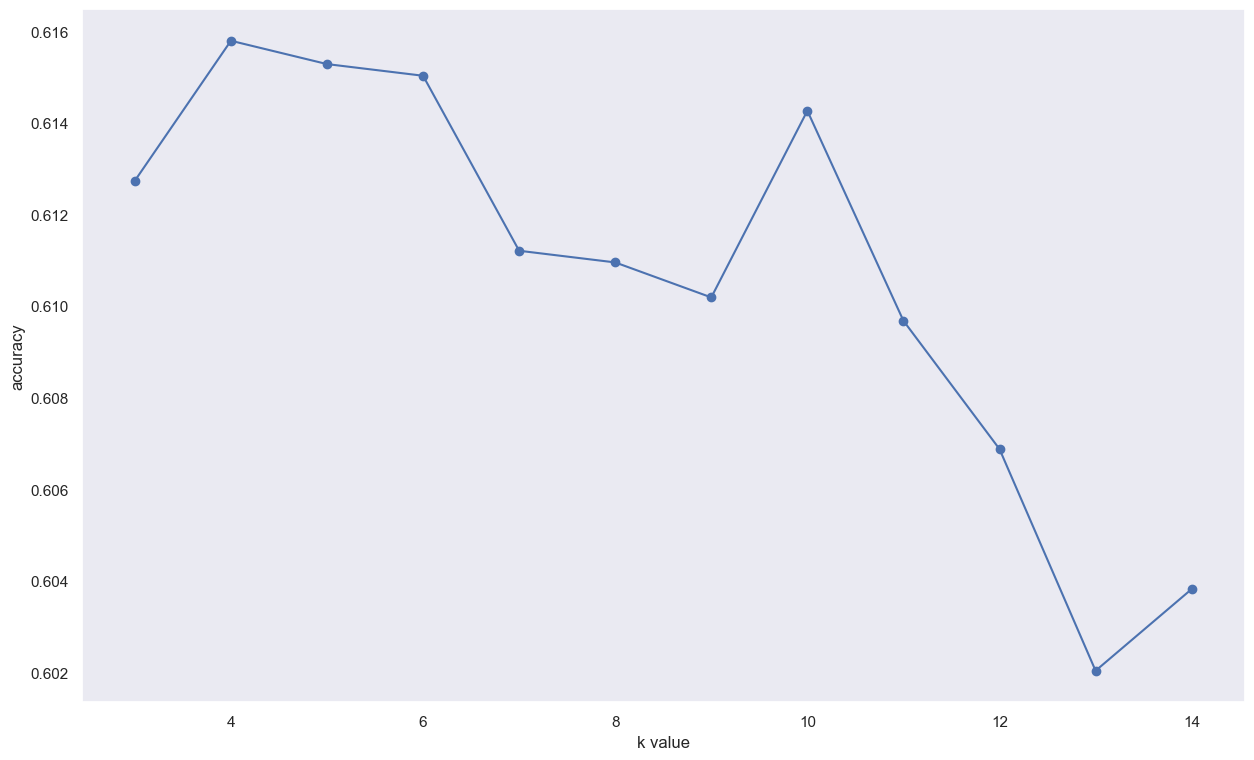

In [175]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [176]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)


In [177]:
print(acc)

0.6127388535031847


# SVM

In [178]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [179]:
y_pred_svm=svmclf.predict(x_test)

In [180]:
print('Accuracy =',accuracy_score(y_test,y_pred_svm))

Accuracy = 0.48713375796178343


# DECISION TREE 

In [181]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [182]:
y_pred_dt=dt_clf.predict(x_test)

In [183]:
print('Accuracy =',accuracy_score(y_test,y_pred_dt))

Accuracy = 0.6152866242038216


# RANDOM FOREST

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [185]:
y_pred_rf=rf_clf.predict(x_test)

In [186]:
print('Accuracy =',accuracy_score(y_test,y_pred_rf))

Accuracy = 0.6542675159235669


In [187]:
#comparison of accuracy
print('ACCURACY\n')
print('LOGISTIC REGRESSION\t','kNN\t\t\t','SVM\t\t\t','DECISION TREE\t\t','RANDOM FOREST\n')
print(accuracy_score(y_test,y_pred),'\t',accuracy_score(y_test,y_pred),'\t',accuracy_score(y_test,y_pred_svm),'\t',accuracy_score(y_test,y_pred_dt),'\t',accuracy_score(y_test,y_pred_rf),'\t')

ACCURACY

LOGISTIC REGRESSION	 kNN			 SVM			 DECISION TREE		 RANDOM FOREST

0.6127388535031847 	 0.6127388535031847 	 0.48713375796178343 	 0.6152866242038216 	 0.6542675159235669 	


In [188]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf))

[[861  61  88  78  24]
 [ 83 452 105  56  70]
 [104  95 387  88  29]
 [ 94  65 100 367  27]
 [ 30  81  37  42 501]]


In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Generate some example data
x, y = make_classification(n_samples=1000, n_features=20)

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(x, y)

# Get the best random forest model
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


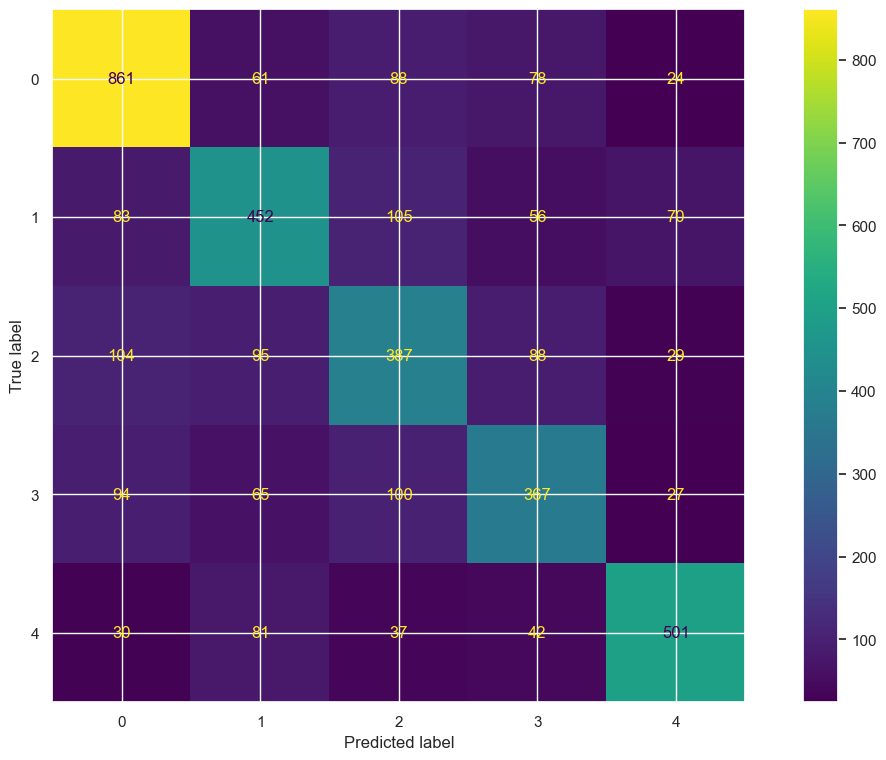

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate predictions with the best model
y_pred = rf_clf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [191]:
y_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6542675159235669


In [192]:
x.dtype

dtype('float64')

In [193]:
pickle.dump(rf_clf,open('model.pkl','wb'))

In [194]:
le_pkl=open('le.pkl','wb')
pickle.dump(le,le_pkl)
le_pkl.close()